

# Big Data Analysis- Crop Yield Prediction








In [ ]:
import csv
import sys
from numpy import *
from scipy.interpolate import *
from matplotlib.pyplot import *
from scipy.stats import *
%matplotlib inline


## Saving all weights of nodes in a model.

In [ ]:
def save_model(array, name):
    path=name+"_model.csv"
    np.savetxt(path, array, delimiter=",")

## Load model function to load saved rainfall,temprature and yield model

In [ ]:
def load_model(name):
    with open(name+".csv", 'r') as read_file:
        reader = csv.reader(read_file)
        data = []
        for row in reader:
            data.append(row[0])
    read_file.close()
    data = np.asarray(data, dtype=np.float64)
    return data

In [ ]:
#prediction function of rain
def predict_rain(model, year):
    x = year
    eq_sum = 0
    for j in range(0, model.shape[0]):
        eq_sum += (model[j] * (x**(model.shape[0]-j-1)))
    if eq_sum < 0:
        eq_sum = 0
    return eq_sum

In [ ]:
#prediction function of temperature
def predict_temp(model, year):
    total = 0
    for i in range(1,13):
        x = year+(year*i)/12
        eq_sum = 0
        for j in range(0, model.shape[0]):
            eq_sum += (model[j] * (x**(model.shape[0]-j-1)))
        
        if eq_sum < 0:
            eq_sum = 0
        total += eq_sum
    avrg = total/12
    return avrg

In [ ]:
#prediction function of yield
def yield_prediction(X, W, b):
    return ((np.matmul(X,W)+b)[0])

## Rainfall prediction

In [ ]:
from sklearn.metrics import mean_squared_error
def func_rainfall(filename):
    set_printoptions(threshold= sys.maxsize)
    f_path = './data/rainfall/'+filename
    file = open(f_path)# opening the learning data
    reader = csv.reader(file)# creating a reader
    flag = 0# for avoiding the headers in csv file from including in arrays
    dataRain = array([])# stores the annual rain data
    dataYear = array([])# correspnding year
    for i in reader:
        if flag == 0:
            flag = 1
            continue
        elif flag == 1:
            startYearOfTestDataTrain = int(i[0])
            flag = 2
        dataYear = append(dataYear,int(i[0]))#taking years
        dataRain = append(dataRain,float(i[1]))
    
    #normalization of output value
    global maxrain
    maxrain=max(dataRain)
    for r in range(len(dataRain)):
        dataRain[r]=dataRain[r]/maxrain
    
    year = (1920 - startYearOfTestDataTrain)
    #uncomment the below lines whenever needed
    print("years to plot : ", year, "\tStart year : ", startYearOfTestDataTrain)
    print("data to plot : ", dataRain[year:year+13])
# fitting the data into a quadratic polynomial  ----------:::::::::::>>>>>
    p1 = polyfit(dataYear,dataRain,2)
# plotting the actual rain data on graph as blue dots
    print(plot(dataYear[year:year+13],dataRain[year:year+13],'o'))
# drawing a curve formed by polynomial
    print(plot(dataYear[year:year+13],polyval(p1,dataYear[year:year+13]),'r-'))
    xlabel("Years"+str(year+startYearOfTestDataTrain))
    ylabel("RainFall")
    title("Prototype1")
    print(show())
    file.close()
    testDataYear = array([])# stores the test data years
    testDataRain = array([])# stores the test data rain
    file = open(f_path)
    reader = csv.reader(file)
    flag1 = 0
    for i in reader:
        if flag1 == 0:
            flag1 = 1
            continue
        elif flag1 == 1:
            startYearOfTestData = int(i[0])
            flag1 = 2
        testDataYear = append(testDataYear,int(i[0]))
        testDataRain = append(testDataRain,float(i[1]))
    
 #normalizing test data rain
    for t in range(len(testDataRain)):
        testDataRain[t]=testDataRain[t]/maxrain
    
    file.close()
    #uncomment the below lines to display more info
    print("Start year of test data : ",startYearOfTestData)

    predictedData = p1[0] * testDataYear**2 + p1[1] * testDataYear + p1[2]

    print("\n\nweights of model_fitted ===> ")
    print('\n',p1,'\n\n')
    print("Year"+"\t\t"+"Actual Rain"+"\t\t"+"Predicted Rain")
    print("--------------------------------------------------------------------")

    year = (2002 - startYearOfTestData)
    temp = startYearOfTestData
    i = 0

    while i < int(testDataRain.size):
        if predictedData[i]<0:
            predictedData[i] = 0
        #uncomment below line to display more info
        print(startYearOfTestData,"\t\t",testDataRain[i]*maxrain,"\t\t",predictedData[i]*maxrain)
        i+=1
        startYearOfTestData+=1
        
    #temp_plot2(testDataRain,testDataYear,year,temp)

    rainfit = p1[0] * dataYear**2 + p1[1] * dataYear + p1[2]
    yresid = rainfit - dataRain
    SSresid = sum(pow(yresid,2))
    SStotal = len(dataRain)*var(dataRain)
    rsq = 1- SSresid/SStotal
    rmse=sqrt(mean_squared_error(rainfit,dataRain))
    print("rmse :",rmse)
    print("R-squared:",rsq)
    save_model(p1,filename[:-4])



In [ ]:
#def temp_plot2(testDataRain,testDataYear,year,temp):
#    print(plot(testDataYear[year:year+13],testDataRain[year:year+13],'o'))# actual curve
#    print(plot(testDataYear[year:year+13],predictedData[year:year+13],"r--"))# predicted curve
#    xlabel("Years"+str(year+temp))
#    ylabel("RainFall")
#    title("Prototype1")
#    print(show())

In [ ]:
import os
files_rain=os.listdir("./data/rainfall")
type(files_rain),files_rain[:5]

(list,
 ['bijapur_rain.csv',
  'chitradurga_rain.csv',
  'hasan_rain.csv',
  'tumkur_rain.csv',
  'belgaum_rain.csv'])



District: bijapur
years to plot :  19 	Start year :  1901
data to plot :  [0.31201932 0.50650479 0.36513937 0.38335081 0.37714299 0.55561174
 0.39207083 0.5057744  0.62959188 0.51758986 0.54355104 0.57405862
 0.72276265]


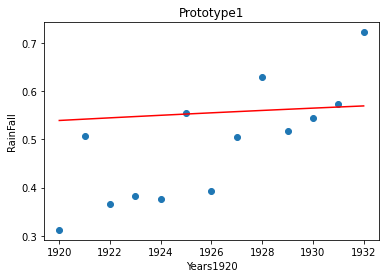

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-2.18465314e-05  8.66717785e-02 -8.53353250e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 529.562 		 536.7896025237542
1902 		 523.481 		 540.8145190630083
1903 		 1002.477 		 544.7904413474515
1904 		 440.457 		 548.717369377084
1905 		 454.86099999999993 		 552.5953031519215
1906 		 743.617 		 556.4242426719322
1907 		 522.34 		 560.2041879371161
1908 		 467.698 		 563.935138947537
1909 		 566.438 		 567.6170957030992
1910 		 736.265 		 571.2500582038665
1911 		 470.909 		 574.8340264498389
1912 		 497.737 		 578.3690004409845
1913 		 578.65 		 581.8549801773032
1914 		 585.199 		 585.2919656588113
1915 		 697.271 		 588.6799568855402
1916 		 997.449 		 592.0189538574264
1917 		 789.629 		 595.3089565745018
1918 		 416.06399999999996 		 598.5499650367982
1919 		 618.14 		 601.7419792442519
1920 		 349.876 		 604.8849991968947
1921 		 567.958

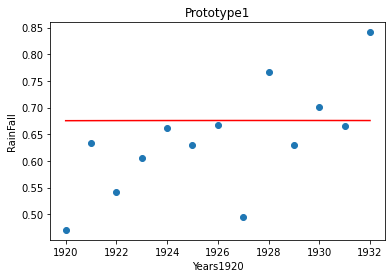

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-5.93084729e-06  2.28700944e-02 -2.13717733e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 765.944 		 851.2179309185517
1902 		 894.261 		 851.6174153646031
1903 		 1267.874 		 852.0018606764991
1904 		 866.262 		 852.3712668542395
1905 		 613.25 		 852.725633897811
1906 		 1011.147 		 853.0649618072224
1907 		 867.154 		 853.389250582483
1908 		 569.983 		 853.6985002235745
1909 		 925.697 		 853.992710730506
1910 		 1205.41 		 854.2718821032865
1911 		 710.16 		 854.5360143418982
1912 		 1018.257 		 854.7851074463542
1913 		 672.727 		 855.0191614166458
1914 		 713.94 		 855.238176252773
1915 		 843.255 		 855.4421519547535
1916 		 1000.227 		 855.6310885225607
1917 		 1022.3200000000002 		 855.8049859562078
1918 		 510.461 		 855.9638442557085
1919 		 1012.793 		 856.1076634210357
1920 		 596.611 		 856.2364434522029
1921 		 803.601 		 856.3

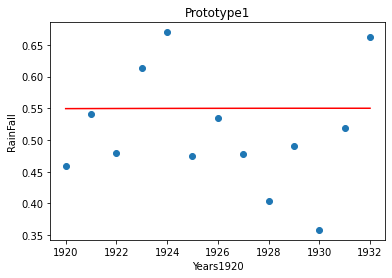

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-5.55787127e-06  2.14595796e-02 -2.01643462e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 2348.744 		 2739.246724486991
1902 		 2490.148 		 2740.869328416502
1903 		 3776.305 		 2742.436091112849
1904 		 2301.935 		 2743.9470125759976
1905 		 2139.736 		 2745.402092805929
1906 		 3028.391 		 2746.8013318026788
1907 		 3707.961 		 2748.144729566283
1908 		 1952.765 		 2749.4322860966695
1909 		 3135.188 		 2750.6640013938395
1910 		 3554.256 		 2751.8398754578457
1911 		 3190.9210000000003 		 2752.9599082886884
1912 		 2806.637 		 2754.024099886296
1913 		 2699.309 		 2755.032450250722
1914 		 2560.3710000000005 		 2755.9849593819667
1915 		 3261.09 		 2756.8816272800123
1916 		 3817.5520000000006 		 2757.722453944912
1917 		 2355.469 		 2758.507439376577
1918 		 1416.53 		 2759.2365835750606
1919 		 2596.078 		 2759.9098865403444
1920 		 2306.

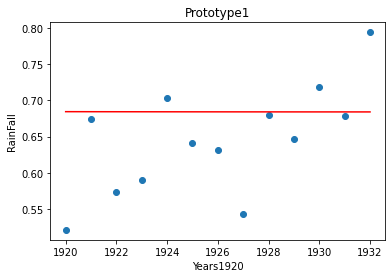

None
Start year of test data :  1901


weights of model_fitted ===> 

 [ 1.99139092e-06 -7.69963865e-03  8.12655367e+00] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 908.3670000000001 		 1017.1474011004443
1902 		 1052.268 		 1016.9600246481722
1903 		 1482.655 		 1016.7785532872962
1904 		 922.6360000000001 		 1016.6029870178219
1905 		 780.038 		 1016.4333258397478
1906 		 1200.646 		 1016.2695697530767
1907 		 1078.273 		 1016.1117187578018
1908 		 654.51 		 1015.9597728539284
1909 		 1179.313 		 1015.813732041458
1910 		 1265.074 		 1015.6735963203852
1911 		 944.919 		 1015.5393656907113
1912 		 1122.661 		 1015.4110401524416
1913 		 815.601 		 1015.2886197055695
1914 		 884.7809999999998 		 1015.1721043500964
1915 		 1055.456 		 1015.0614940860249
1916 		 1395.451 		 1014.9567889133563
1917 		 1104.521 		 1014.857988832084
1918 		 639.157 		 1014.7650938422131
1919 		 1140.463 		 1014.678103943744
1920 		 772.82

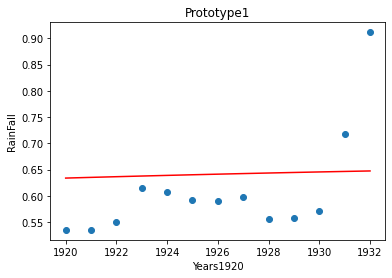

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-1.87491588e-05  7.33536103e-02 -7.10883117e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 1901.616 		 1715.2620835948123
1902 		 1735.258 		 1721.1127273250818
1903 		 1778.02 		 1726.8563810804549
1904 		 1562.044 		 1732.4930448610937
1905 		 1039.236 		 1738.0227186669983
1906 		 1942.914 		 1743.4454024982094
1907 		 2031.396 		 1748.7610963545644
1908 		 1932.873 		 1753.9698002361854
1909 		 1685.6119999999999 		 1759.0715141430721
1910 		 1877.923 		 1764.0662380752244
1911 		 1627.82 		 1768.9539720326022
1912 		 2035.246 		 1773.7347160151644
1913 		 1509.112 		 1778.4084700229926
1914 		 2853.194 		 1782.9752340560865
1915 		 2132.648 		 1787.4350081144462
1916 		 1970.0539999999999 		 1791.7877921980312
1917 		 1908.002 		 1796.0335863068412
1918 		 907.13 		 1800.1723904408766
1919 		 1678.8170000000002 		 1804.2042046002184
1920 	

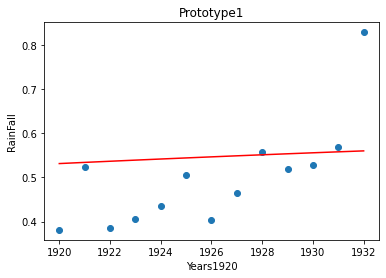

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-2.28033982e-05  9.02297937e-02 -8.86474687e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 707.369 		 668.0901959394993
1902 		 656.829 		 673.0517691792354
1903 		 993.264 		 677.9488466555787
1904 		 555.423 		 682.7814283685491
1905 		 494.907 		 687.5495143181266
1906 		 911.206 		 692.2531045043112
1907 		 678.154 		 696.8921989271229
1908 		 543.776 		 701.4667975865418
1909 		 672.649 		 705.9769004825677
1910 		 886.985 		 710.4225076152209
1911 		 683.514 		 714.803618984481
1912 		 648.611 		 719.1202345903483
1913 		 746.667 		 723.3723544328227
1914 		 846.487 		 727.5599785119242
1915 		 949.066 		 731.6831068276329
1916 		 1074.779 		 735.7417393799686
1917 		 921.571 		 739.7358761688915
1918 		 452.562 		 743.6655171944415
1919 		 720.292 		 747.5306624566186
1920 		 539.089 		 751.3313119553828
1921 		 739.7569999999998 		 755.

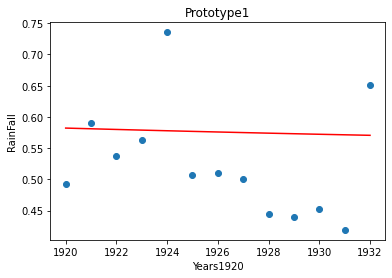

None
Start year of test data :  1901


weights of model_fitted ===> 

 [ 1.28584487e-05 -5.04952945e-02  5.01317159e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 2216.069 		 2754.7418314700617
1902 		 2904.289 		 2747.5173400653666
1903 		 3286.779 		 2740.4093605558137
1904 		 2147.31 		 2733.4178929416285
1905 		 2317.8080000000004 		 2726.5429372226176
1906 		 3129.8649999999993 		 2719.7844933989422
1907 		 3245.411 		 2713.1425614704417
1908 		 1850.57 		 2706.6171414372766
1909 		 3135.88 		 2700.208233299286
1910 		 3243.3789999999995 		 2693.915837056663
1911 		 3722.809 		 2687.739952709182
1912 		 2419.221 		 2681.680580257069
1913 		 2518.6920000000005 		 2675.7377197001306
1914 		 2371.7480000000005 		 2669.911371038463
1915 		 3705.901 		 2664.2015342720993
1916 		 4173.913 		 2658.6082094009416
1917 		 2105.075 		 2653.1313964250876
1918 		 1738.115 		 2647.7710953444403
1919 		 2340.174 		 2642.5273

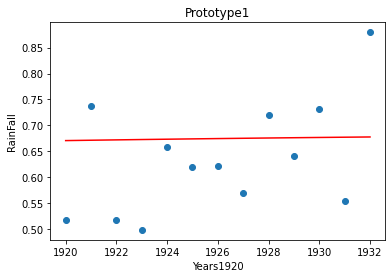

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-1.09257221e-05  4.26692825e-02 -4.09778534e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 666.387 		 709.2238057073696
1902 		 732.557 		 710.4387682738716
1903 		 900.684 		 711.6300004123586
1904 		 762.623 		 712.7975021227999
1905 		 558.843 		 713.9412734052185
1906 		 816.487 		 715.061314259599
1907 		 668.304 		 716.1576246859571
1908 		 529.848 		 717.2302046842615
1909 		 693.206 		 718.279054254551
1910 		 1019.568 		 719.3041733968025
1911 		 597.203 		 720.3055621110237
1912 		 808.344 		 721.2832203972068
1913 		 587.56 		 722.2371482553673
1914 		 691.617 		 723.167345685482
1915 		 894.752 		 724.0738126875741
1916 		 810.312 		 724.9565492616282
1917 		 947.906 		 725.8155554076595
1918 		 506.667 		 726.6508311256375
1919 		 815.097 		 727.4623764156082
1920 		 561.67 		 728.2501912775255
1921 		 801.442 		 729.0142757114278


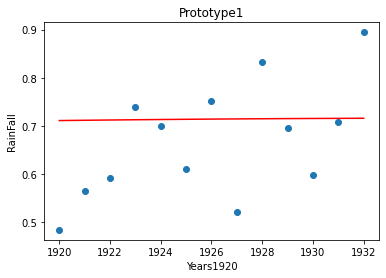

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-1.80971897e-05  7.01082544e-02 -6.71832510e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 1280.307 		 1365.6851172735405
1902 		 1304.489 		 1368.217114151874
1903 		 1921.797 		 1370.6777728130082
1904 		 1505.993 		 1373.067093257055
1905 		 995.637 		 1375.3850754839025
1906 		 1689.518 		 1377.631719493691
1907 		 1516.136 		 1379.8070252863079
1908 		 1158.612 		 1381.9109928617816
1909 		 1417.198 		 1383.94362222014
1910 		 1970.975 		 1385.9049133613833
1911 		 1170.017 		 1387.7948662854271
1912 		 1609.514 		 1389.613480992412
1913 		 1200.899 		 1391.3607574821972
1914 		 1342.719 		 1393.0366957548952
1915 		 1308.687 		 1394.64129581045
1916 		 1525.713 		 1396.1745576488336
1917 		 1542.275 		 1397.6364812701297
1918 		 788.343 		 1399.0270666743108
1919 		 1577.126 		 1400.3463138612644
1920 		 954.398 		 1401.5942228311587
1921

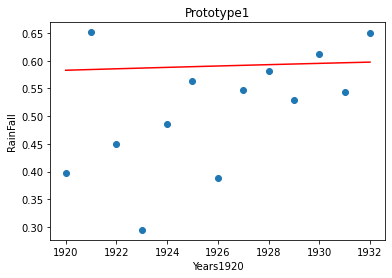

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-9.72033488e-06  3.86670198e-02 -3.78248064e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 594.219 		 514.1822234437159
1902 		 559.509 		 515.7610324156798
1903 		 815.489 		 517.3217928447846
1904 		 494.04300000000006 		 518.8645047310632
1905 		 508.94300000000004 		 520.3891680745024
1906 		 601.607 		 521.8957828751023
1907 		 418.47 		 523.3843491328496
1908 		 450.255 		 524.8548668477641
1909 		 472.066 		 526.3073360198393
1910 		 600.432 		 527.7417566490751
1911 		 359.119 		 529.1581287354518
1912 		 495.77799999999996 		 530.5564522790022
1913 		 436.594 		 531.9367272797133
1914 		 573.218 		 533.2989537375851
1915 		 716.724 		 534.6431316525976
1916 		 737.412 		 535.969261024784
1917 		 808.2 		 537.2773418541311
1918 		 452.28 		 538.5673741406322
1919 		 482.38100000000003 		 539.8393578842806
1920 		 368.047 		 541.09329308

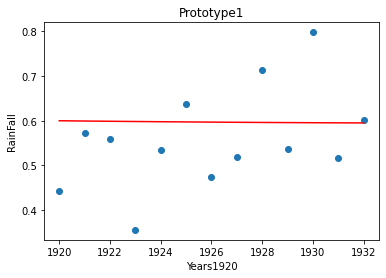

None
Start year of test data :  1901


weights of model_fitted ===> 

 [ 1.68911178e-05 -6.54700140e-02  6.40349817e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 863.853 		 849.296591398398
1902 		 969.252 		 847.6009602386523
1903 		 1375.104 		 845.9517831661664
1904 		 720.451 		 844.3490601809303
1905 		 631.014 		 842.7927912829639
1906 		 1004.522 		 841.2829764722279
1907 		 813.067 		 839.819615748742
1908 		 514.586 		 838.4027091125158
1909 		 948.357 		 837.0322565635593
1910 		 1048.753 		 835.7082581018332
1911 		 563.992 		 834.430713727357
1912 		 870.314 		 833.1996234401505
1913 		 674.97 		 832.0149872401842
1914 		 699.631 		 830.876805127468
1915 		 734.9879999999999 		 829.7850771020017
1916 		 1171.527 		 828.7398031638049
1917 		 1001.941 		 827.7409833128484
1918 		 572.902 		 826.7886175491321
1919 		 919.283 		 825.8827058726757
1920 		 609.074 		 825.0232482834888
1921 		 787.548 		 824.

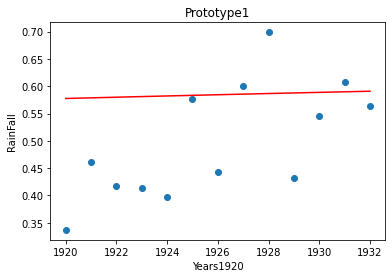

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-6.36893729e-06  2.56419810e-02 -2.51765989e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 581.905 		 612.7288393774875
1902 		 614.791 		 614.303977705802
1903 		 1108.54 		 615.8649955906246
1904 		 543.218 		 617.4118930319792
1905 		 624.777 		 618.9446700298419
1906 		 791.954 		 620.4633265842323
1907 		 589.649 		 621.9678626951388
1908 		 620.683 		 623.4582783625614
1909 		 604.9679999999998 		 624.9345735865119
1910 		 769.345 		 626.3967483669704
1911 		 445.096 		 627.8448027039568
1912 		 538.354 		 629.2787365974633
1913 		 505.416 		 630.6985500474817
1914 		 673.582 		 632.1042430540242
1915 		 656.387 		 633.4958156170826
1916 		 970.511 		 634.873267736665
1917 		 892.932 		 636.2365994127673
1918 		 571.854 		 637.5858106453818
1919 		 645.011 		 638.920901434524
1920 		 373.44 		 640.2418717801784
1921 		 511.893 		 641.5487

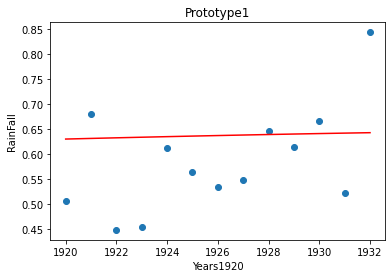

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-1.78050121e-05  6.96463847e-02 -6.74552070e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 717.807 		 700.3798714140329
1902 		 733.859 		 702.6418642323971
1903 		 870.448 		 704.8622061777837
1904 		 771.676 		 707.0408972501931
1905 		 587.979 		 709.1779374496083
1906 		 836.5579999999999 		 711.2733267760628
1907 		 714.969 		 713.3270652295066
1908 		 519.257 		 715.339152809973
1909 		 700.6959999999999 		 717.3095895174454
1910 		 983.142 		 719.2383753519238
1911 		 619.146 		 721.1255103134247
1912 		 734.612 		 722.9709944019814
1913 		 605.369 		 724.7748276175109
1914 		 758.244 		 726.5370099600464
1915 		 1000.285 		 728.2575414296043
1916 		 846.985 		 729.9364220261683
1917 		 964.163 		 731.573651749755
1918 		 500.99 		 733.1692306003475
1919 		 733.074 		 734.7231585779958
1920 		 590.267 		 736.235435682617
1921 		 794.367 

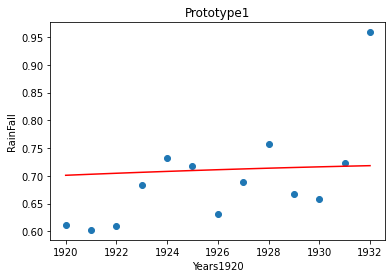

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-3.83438405e-05  1.49146986e-01 -1.44310565e+02] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 1282.08 		 1174.9942955341849
1902 		 1161.558 		 1180.9976877179843
1903 		 1281.982 		 1186.8626328705657
1904 		 1166.833 		 1192.5891309918266
1905 		 839.3 		 1198.177182081613
1906 		 1531.893 		 1203.6267861401302
1907 		 1418.832 		 1208.9379431671728
1908 		 1049.996 		 1214.1106531629978
1909 		 1225.062 		 1219.1449161274506
1910 		 1328.073 		 1224.0407320604293
1911 		 1479.19 		 1228.7981009621385
1912 		 1058.112 		 1233.4170228325272
1913 		 1062.181 		 1237.8974976714928
1914 		 1616.731 		 1242.239525479138
1915 		 1295.242 		 1246.4431062554625
1916 		 1380.723 		 1250.5082400003125
1917 		 1283.541 		 1254.4349267139446
1918 		 914.2650000000001 		 1258.2231663961538
1919 		 1468.036 		 1261.8729590469395
1920 		 1104.455 		 1265.38430

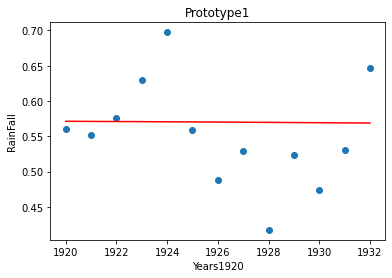

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-4.31136930e-06  1.63981638e-02 -1.50197834e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 1795.34 		 2043.3374953981715
1902 		 2047.201 		 2043.3447251019797
1903 		 2436.419 		 2043.3211894607794
1904 		 1851.019 		 2043.2668884746017
1905 		 1667.291 		 2043.1818221434346
1906 		 2199.792 		 2043.0659904672648
1907 		 2375.653 		 2042.9193934461116
1908 		 1610.468 		 2042.742031079975
1909 		 2282.982 		 2042.5339033688297
1910 		 2289.37 		 2042.295010312707
1911 		 2496.608 		 2042.025351911595
1912 		 2024.372 		 2041.7249281654802
1913 		 1837.1060000000002 		 2041.3937390743883
1914 		 1958.918 		 2041.0317846383068
1915 		 2363.012 		 2040.6390648572292
1916 		 2661.256 		 2040.2155797311555
1917 		 1727.577 		 2039.7613292600984
1918 		 1443.121 		 2039.2763134440513
1919 		 1961.427 		 2038.760532283002
1920 		 1998.552 		 2038.213

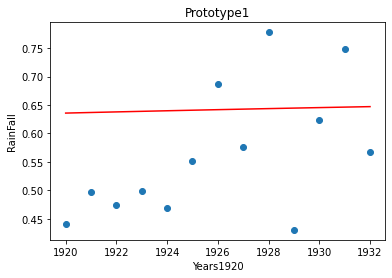

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-9.53443387e-06  3.76729174e-02 -3.65484597e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 676.3619999999999 		 757.1459275249031
1902 		 686.523 		 758.8940209166321
1903 		 1184.533 		 760.6185310196878
1904 		 756.6240000000001 		 762.3194578340439
1905 		 648.94 		 763.9968013597178
1906 		 859.9959999999999 		 765.6505615966919
1907 		 659.873 		 767.2807385449577
1908 		 838.048 		 768.88733220455
1909 		 792.422 		 770.4703425754515
1910 		 1028.935 		 772.029769657662
1911 		 561.412 		 773.565613451164
1912 		 651.882 		 775.0778739559928
1913 		 620.7850000000001 		 776.5665511721218
1914 		 972.982 		 778.0316450995687
1915 		 803.3859999999999 		 779.4731557382983
1916 		 1236.743 		 780.8910830883545
1917 		 1139.382 		 782.2854271497288
1918 		 694.511 		 783.6561879224032
1919 		 778.727 		 785.0033654063781
1920 		 544.227 		 78

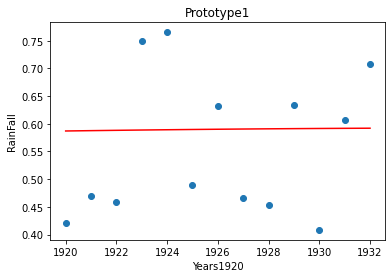

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-1.76968838e-05  6.85858361e-02 -6.58599677e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 2339.082 		 2419.5073019918746
1902 		 2304.501 		 2424.9726095405563
1903 		 3532.412 		 2430.2873334200017
1904 		 2465.661 		 2435.4514736303327
1905 		 1694.06 		 2440.465030171549
1906 		 2565.287 		 2445.3280030436504
1907 		 3398.578 		 2450.040392246697
1908 		 1701.737 		 2454.6021977806295
1909 		 2669.077 		 2459.013419645386
1910 		 3132.691 		 2463.2740578410885
1911 		 2630.125 		 2467.384112367676
1912 		 2990.342 		 2471.343583225149
1913 		 2436.843 		 2475.1524704135068
1914 		 2517.359 		 2478.8107739328107
1915 		 2172.522 		 2482.3184937829387
1916 		 2998.564 		 2485.675629964013
1917 		 2226.998 		 2488.882182475911
1918 		 1130.194 		 2491.9381513187554
1919 		 2552.577 		 2494.843536492485
1920 		 1790.007 		 2497.5983379970994
19

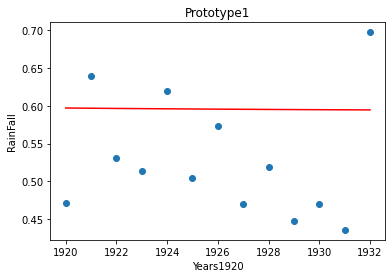

None
Start year of test data :  1901


weights of model_fitted ===> 

 [ 6.54726045e-06 -2.54286314e-02  2.52841878e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 1424.846 		 1755.2513521724072
1902 		 1639.183 		 1753.715069171888
1903 		 2339.651 		 1752.2167855937253
1904 		 1359.162 		 1750.7565014378674
1905 		 1517.8759999999997 		 1749.334216704335
1906 		 2043.215 		 1747.9499313931587
1907 		 2156.641 		 1746.603645504298
1908 		 1219.247 		 1745.2953590377829
1909 		 2061.823 		 1744.025071993573
1910 		 2350.059 		 1742.792784371719
1911 		 2007.0620000000001 		 1741.5984961721704
1912 		 1603.027 		 1740.442207394947
1913 		 1586.582 		 1739.32391804008
1914 		 1489.694 		 1738.2436281075281
1915 		 2270.443 		 1737.2013375973222
1916 		 2821.263 		 1736.1970465094212
1917 		 1520.474 		 1735.2307548438766
1918 		 1126.125 		 1734.3024626006368
1919 		 1662.019 		 1733.4121697797225
1920 		 1367.398 		 

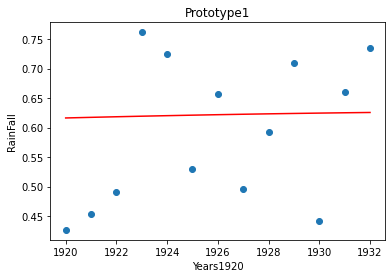

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-2.47794268e-05  9.62257119e-02 -9.27902855e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 2328.747 		 2252.4307537007353
1902 		 2302.672 		 2260.06666176817
1903 		 3196.462 		 2267.512362757237
1904 		 2489.35 		 2274.767856668045
1905 		 1569.873 		 2281.833143500759
1906 		 2393.069 		 2288.7082232551593
1907 		 2903.307 		 2295.393095931301
1908 		 1972.532 		 2301.887761529293
1909 		 2370.668 		 2308.1922200489726
1910 		 2800.152 		 2314.3064714904476
1911 		 2148.91 		 2320.230515853773
1912 		 2756.146 		 2325.964353138731
1913 		 2191.597 		 2331.5079833454847
1914 		 2565.554 		 2336.8614064741437
1915 		 1895.521 		 2342.024622524435
1916 		 2673.533 		 2346.997631496468
1917 		 2293.299 		 2351.7804333904055
1918 		 1265.026 		 2356.37302820603
1919 		 2473.483 		 2360.775415943396
1920 		 1636.63 		 2364.987596602613
1921 		 174

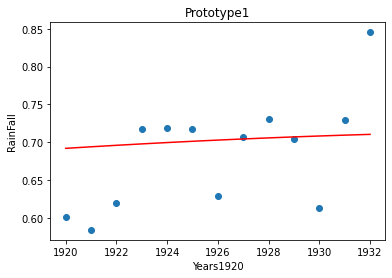

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-4.66400002e-05  1.81194540e-01 -1.75267694e+02] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 2447.561 		 2113.330510202289
1902 		 2215.863 		 2126.0435292736993
1903 		 2177.689 		 2138.446323783312
1904 		 2213.543 		 2150.538893731032
1905 		 1471.209 		 2162.3212391167663
1906 		 2464.667 		 2173.7933599407024
1907 		 2619.869 		 2184.955256202652
1908 		 2244.803 		 2195.806927902804
1909 		 2246.733 		 2206.3483750409696
1910 		 2118.146 		 2216.579597617054
1911 		 2462.35 		 2226.5005956315294
1912 		 2068.818 		 2236.111369084019
1913 		 1901.896 		 2245.411917974616
1914 		 3325.735 		 2254.4022423033207
1915 		 2272.435 		 2263.0823420701336
1916 		 2344.51 		 2271.4522172750544
1917 		 2207.24 		 2279.5118679180828
1918 		 1623.562 		 2287.261293999125
1919 		 2470.649 		 2294.7004955183693
1920 		 2002.283 		 2301.8294724757216
1921 

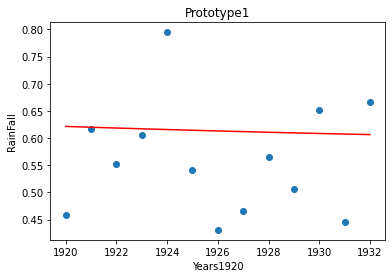

None
Start year of test data :  1901


weights of model_fitted ===> 

 [ 2.25144780e-05 -8.79788620e-02  8.65435623e+01] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 1482.837 		 1640.3011443242704
1902 		 1943.7799999999997 		 1634.4324677136515
1903 		 1976.078 		 1628.6759415718439
1904 		 1350.842 		 1623.0315658988834
1905 		 1453.078 		 1617.499340694805
1906 		 1863.614 		 1612.0792659595024
1907 		 1634.13 		 1606.7713416931176
1908 		 1058.81 		 1601.5755678954736
1909 		 1804.853 		 1596.4919445667824
1910 		 1848.896 		 1591.5204717069028
1911 		 2202.554 		 1586.6611493157989
1912 		 1563.36 		 1581.9139773936129
1913 		 1173.358 		 1577.2789559402026
1914 		 1467.617 		 1572.7560849557103
1915 		 1979.338 		 1568.3453644400647
1916 		 2490.63 		 1564.0467943931596
1917 		 1269.0969999999998 		 1559.8603748152077
1918 		 1197.638 		 1555.7861057060315
1919 		 1467.814 		 1551.8239870657378
1920 		 1142.546 

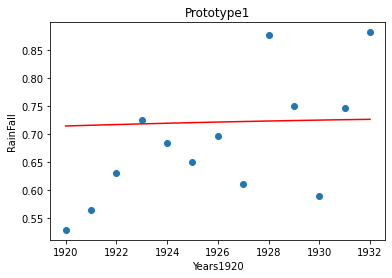

None
Start year of test data :  1901


weights of model_fitted ===> 

 [-2.93239931e-05  1.13948092e-01 -1.09966088e+02] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 1892.536 		 1858.5857393684496
1902 		 1889.576 		 1865.2426006426224
1903 		 2356.905 		 1871.7387290172483
1904 		 2052.669 		 1878.0741244924827
1905 		 1396.942 		 1884.2487870681705
1906 		 2266.319 		 1890.2627167444668
1907 		 2050.264 		 1896.115913521294
1908 		 1867.9669999999999 		 1901.8083773985745
1909 		 1907.735 		 1907.3401083764636
1910 		 2319.727 		 1912.7111064548058
1911 		 1680.929 		 1917.9213716337565
1912 		 1928.9790000000003 		 1922.9709039132774
1913 		 1654.043 		 1927.859703293212
1914 		 2180.745 		 1932.5877697737558
1915 		 1849.071 		 1937.1551033547523
1916 		 2103.841 		 1941.5617040363966
1917 		 2104.449 		 1945.807571818455
1918 		 1342.074 		 1949.8927067011223
1919 		 2168.678 		 1953.8171086843593
1920 		 1450.82

In [ ]:
for filename in files_rain:
   # name="./data/rainfall/"+file
    print("\n\nDistrict: "+filename[:-9])
    func_rainfall(filename)

In [ ]:
#predict rain
rain_model = load_model('bagalkot_rain_model')
print(rain_model)
rain = predict_rain(rain_model, 2019)*maxrain
print("rain:",rain)

[-2.28033982e-05  9.02297937e-02 -8.86474687e+01]
rain: 1566.5525791892528


In [ ]:
rain_models=[l[:-4] for l in os.listdir(".") if l.endswith("rain_model.csv")]
rain_models

['mysore_rain_model',
 'gadag_rain_model',
 'chikmangalur_rain_model',
 'tumkur_rain_model',
 'chitradurga_rain_model',
 'kodagu_rain_model',
 'bijapur_rain_model',
 'haveri_rain_model',
 'davangere_rain_model',
 'bellary_rain_model',
 'gulbarga_rain_model',
 'shimoga_rain_model',
 'belgaum_rain_model',
 'bagalkot_rain_model',
 'chamarajnagar_rain_model',
 'mandya_rain_model',
 'dharwad_rain_model',
 'hasan_rain_model',
 'bidar_rain_model',
 'kolar_rain_model',
 'koppal_rain_model',
 'raichur_rain_model']

In [ ]:
y=2020
for rm in rain_models:
    loaded_model = load_model(rm)
    print("District: %25s"%rm[:-11].upper(),end=" | ")
    print("Rain predicted: ",predict_rain(loaded_model,y)*maxrain)

District:                    MYSORE | Rain predicted:  1641.1903626256565
District:                     GADAG | Rain predicted:  1392.62464062352
District:              CHIKMANGALUR | Rain predicted:  1296.4767835382197
District:                    TUMKUR | Rain predicted:  1915.5828633794479
District:               CHITRADURGA | Rain predicted:  1714.5103729973378
District:                    KODAGU | Rain predicted:  1404.2921467483677
District:                   BIJAPUR | Rain predicted:  1641.863440233416
District:                    HAVERI | Rain predicted:  1522.2465438247425
District:                 DAVANGERE | Rain predicted:  1621.4981452915554
District:                   BELLARY | Rain predicted:  1734.223176040484
District:                  GULBARGA | Rain predicted:  1733.1546759805674
District:                   SHIMOGA | Rain predicted:  1303.6653804531886
District:                   BELGAUM | Rain predicted:  1594.814220071463
District:                  BAGALKOT | Rain 

## Temperature prediction

In [ ]:
f_path="./data/temp/dharwad_temp.csv"
with open(f_path,'r') as read_file:
    reader=csv.reader(read_file)
    i = 0
    for row in reader:#sample dataset view
        print(row)
        if i == 4:
            break
        i+=1

['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
['1901', '23.466', '23.881', '26.127', '28.329', '27.899', '25.609', '24.724', '24.65', '25.478', '25.439', '24.998', '23.415']
['1902', '23.614', '24.164', '26.98', '28.31', '28.392', '26.396', '25.257', '25.537', '24.62', '25.664', '24.827', '23.857']
['1903', '23.328', '23.986', '25.998', '27.912', '27.603', '25.89', '24.759', '24.656', '24.69', '25.002', '23.549', '22.662']
['1904', '22.943', '23.959', '26.052', '27.995', '27.469', '25.015', '24.43', '24.777', '25.012', '25.652', '24.027', '23.055']


In [ ]:

def func_temp(filename):
    f_path="./data/temp/"+filename
    file = open(f_path)# opening the learning data
    reader = csv.reader(file)
    
    flag=0 # to ignore the header and get the start year in train dataset
    dataTemp=array([])# stores the annual Temp data
    dataYear=array([])# stores the correspnding year

    for i in reader:
        if(flag==0):#ignores the header
            flag=1
            continue
        else:
            for j in range(1,13):
                if(flag==1):
                    startYearOfTestDataTrain=int(i[0])#sets the start year of the train set
                    flag=2
                dataYear=append(dataYear,int(i[0])+(int(i[0])*(j-1))/12)
                dataTemp=append(dataTemp,float(i[j]))
    global maxtemp
    maxtemp=max(dataTemp)
    for d in range(len(dataTemp)):
        dataTemp[d]=dataTemp[d]/maxtemp
        
    p1 = polyfit(dataYear,dataTemp,24)# fitting the data into a 24 degree polynomial 
            
    year = (1920 - startYearOfTestDataTrain)*12 # prediction for year 1920 and plotting the graph for the same  
    #uncomment below lines whenever required
    plot(dataYear[year:year+13],dataTemp[year:year+13],'o')# plotting the actual Temp data on graph as blue dots
    plot(dataYear[year:year+13],polyval(p1,dataYear[year:year+13]),'r-') #drawing a curve formed by polynomial
    xlabel("Years"+str(year+startYearOfTestDataTrain))
    ylabel("Temp")
    title("Prototype1")
    print(show())
    file.close()

    
    #Testing on same data to check how good the curve is set
    predictedData,testDataTemp,testDataYear,startYearOfTestData= temp_func2(f_path,p1)
    
    #display
    temp_disp(startYearOfTestData,predictedData,testDataTemp,dataYear,dataTemp,p1)
       
        #save the model
    save_model(p1,filename[:-4])

In [ ]:
def temp_func2(f_path,p1):
    testDataYear = array([])# stores the test data years
    testDataTemp = array([])# stores the test data Temp
    file = open(f_path)
    reader = csv.reader(file)
    flag1 = 0
    for i in reader:
        if flag1 == 0:
            flag1 = 1
            continue
        for j in range(1,13):
                testDataYear = append(testDataYear,int(i[0])+(int(i[0])*(j-1))/12)
                testDataTemp = append(testDataTemp,float(i[j]))
                if flag1 == 1:
                    startYearOfTestData = int(i[0])
                    flag1 = 2
    
    
    for d in range(len(testDataTemp)):
        testDataTemp[d]=testDataTemp[d]/maxtemp
        
    predictedData = (p1[0]*testDataYear**24+p1[1]*testDataYear**23+p1[2] * testDataYear**22 
                     +p1[3]*testDataYear**21+p1[4]*testDataYear**20+p1[5]*testDataYear**19 
                     +p1[6] * testDataYear**18 +p1[7] * testDataYear**17 
                     +p1[8] * testDataYear**16 +p1[9] * testDataYear**15 
                     +p1[10] * testDataYear**14 +p1[11] * testDataYear**13 
                     +p1[12] * testDataYear**12 +p1[13] * testDataYear**11 
                     +p1[14] * testDataYear**10 +p1[15] * testDataYear**9 
                     +p1[16] * testDataYear**8 +p1[17] * testDataYear**7 
                     +p1[18] * testDataYear**6 +p1[19] * testDataYear**5 
                     +p1[20] * testDataYear**4 +p1[21] * testDataYear**3 
                     +p1[22] * testDataYear**2 +p1[23] * testDataYear + p1[24])
    return predictedData,testDataTemp,testDataYear,startYearOfTestData

In [ ]:
from sklearn.metrics import mean_squared_error
def temp_disp(startYearOfTestData,predictedData,testDataTemp,dataYear,dataTemp,p1):
    print('\n\n',p1,'\n\n')
    #uncomment whenever needed
    print("Year"+"\t"+"Month"+"Actual Temp"+"\t"+"Predicted Temp")

    
    year = (2002 - startYearOfTestData)*13
    temp = startYearOfTestData
    i = 0
    print(predictedData[year:year+13])
    while i < int(testDataTemp.size):
        for j in range(1,13):
            if predictedData[i]<0:
                predictedData[i] = 0
            #uncomment whenever needed
            print(startYearOfTestData,j,"\t\t",testDataTemp[i]*maxtemp,"\t\t",predictedData[i]*maxtemp)
            i+=1
        startYearOfTestData+=1
    
    rainfit = p1[0] * dataYear**24 + p1[1] * dataYear**23 + p1[2] * dataYear**22 + p1[3] * dataYear**21 + p1[4] * dataYear**20 + p1[5] * dataYear**19 + p1[6] * dataYear**18 + p1[7] * dataYear**17 + p1[8] * dataYear**16 + p1[9] * dataYear**15 + p1[10] * dataYear**14 + p1[11] * dataYear**13 + p1[12] * dataYear**12 + p1[13] * dataYear**11 + p1[14] * dataYear**10 + p1[15] * dataYear**9 + p1[16] * dataYear**8 + p1[17] * dataYear**7 + p1[18] * dataYear**6 + p1[19] * dataYear**5 + p1[20] * dataYear**4 + p1[21] * dataYear**3 + p1[22] * dataYear**2 + p1[23] * dataYear + p1[24]


    yresid = dataTemp - rainfit
    SSresid = sum(pow(yresid,2))
    SStotal = len(dataTemp)*var(dataTemp)
    rsq =  SSresid/SStotal
    rmse=sqrt(mean_squared_error(dataTemp,rainfit))
    print("rmse: ",rmse)
    print("Accuracy :",rsq)
    x = 2020+(2020*8)/12
    aug2019Temp = p1[0] * x**24 + p1[1] * x**23 + p1[2] * x**22 + p1[3] * x**21 + p1[4] * x**20 + p1[5] * x**19 + p1[6] * x**18 + p1[7] * x**17 + p1[8] * x**16 + p1[9] * x**15 + p1[10] * x**14 + p1[11] * x**13 + p1[12] * x**12 + p1[13] * x**11 + p1[14] * x**10 + p1[15] * x**9 + p1[16] * x**8 + p1[17] * x**7 + p1[18] * x**6 + p1[19] * x**5 + p1[20] * x**4 + p1[21] * x**3 + p1[22] * x**2 + p1[23] * x + p1[24]

    print("2019:august : ",aug2019Temp)

In [ ]:
import os
files_temp=os.listdir("./data/temp")
print(type(files_temp),files_temp[:5])


<class 'list'> ['kodagu_temp.csv', 'mandya_temp.csv', 'chitradurga_temp.csv', 'shimoga_temp.csv', 'chamarajnagar_temp.csv']




District: kodagu


/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


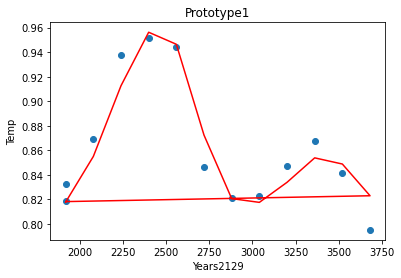

None


 [-9.72655527e-79  1.74997468e-74 -9.73730655e-71  2.33834656e-68
  1.09667499e-63  7.75470396e-61 -1.24728336e-56 -3.59431067e-53
  7.92440383e-50  6.79014705e-46  6.87029061e-43 -7.47563600e-39
 -2.81383413e-35  3.67819322e-32  4.68586510e-28  3.48379312e-25
 -6.03223310e-21 -1.03346208e-17  8.19880106e-14  8.70435079e-11
 -1.30960104e-06  3.63071945e-03 -4.95305349e+00  3.49538205e+03
 -1.02531352e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.91 		 22.95593528730038
1901 2 		 24.798 		 24.137516038372997
1901 3 		 25.968 		 25.79369727179117
1901 4 		 27.543 		 27.10233095082629
1901 5 		 26.507 		 27.164539534143987
1901 6 		 24.127 		 25.228849626818555
1901 7 		 23.488 		 23.514204047594102
1901 8 		 23.565 		 23.243885003106552
1901 9 		 24.5 		 23.63134088357154
1901 10 		 24.533 		 24.24359867359686
1901 11 		 24.026 		 24.259889379089582
1901 12 		 22.707 		 23.694441999263944
1902 1 		 23.228 		 22.98064570559829
1902 2 		 24.194 		 24.148442078863155
1

1932 6 		 24.154 		 24.620160056223977
1932 7 		 22.899 		 23.311162694917876
1932 8 		 23.742 		 23.32218065743509
1932 9 		 23.855 		 23.834140347346548
1932 10 		 24.546 		 24.348386547939736
1932 11 		 24.039 		 24.11850125743251
1932 12 		 22.959 		 23.28113340019423
1933 1 		 23.327 		 23.41033539352182
1933 2 		 24.479 		 24.508347163658474
1933 3 		 25.773 		 26.13185012972157
1933 4 		 27.134 		 27.311698236802474
1933 5 		 25.536 		 26.785967274272696
1933 6 		 23.221 		 24.601687840737284
1933 7 		 22.909 		 23.306748686723296
1933 8 		 22.987 		 23.32538134792994
1933 9 		 23.425 		 23.841064344189945
1933 10 		 23.761 		 24.349932960292207
1933 11 		 24.154 		 24.11336269674066
1933 12 		 22.78 		 23.269279040081308
1934 1 		 23.089 		 23.41690767254855
1934 2 		 23.82 		 24.52037560525525
1934 3 		 25.477 		 26.142195111580076
1934 4 		 27.019 		 27.316593476042033
1934 5 		 26.672 		 26.771679752694325
1934 6 		 24.058 		 24.58330884718511
1934 7 		 23.277 		 23.30245798

1951 9 		 24.574 		 23.96672220616776
1951 10 		 24.797 		 24.357662952814135
1951 11 		 24.817 		 24.011391907550276
1951 12 		 22.638 		 23.14775949980307
1952 1 		 23.701 		 23.500055563055792
1952 2 		 25.041 		 24.737661821322398
1952 3 		 26.171 		 26.32645484426699
1952 4 		 27.657 		 27.384387469870852
1952 5 		 26.945 		 26.49297190136451
1952 6 		 24.008 		 24.269925778835894
1952 7 		 23.425 		 23.244904979469137
1952 8 		 23.27 		 23.393431078653666
1952 9 		 23.827 		 23.97367432345811
1952 10 		 23.866 		 24.357012150168302
1952 11 		 23.091 		 24.00502825040545
1952 12 		 23.467 		 23.148242800088482
1953 1 		 23.371 		 23.50339420291304
1953 2 		 24.283 		 24.74971076962247
1953 3 		 27.223 		 26.336582051833975
1953 4 		 26.701 		 27.386960490766796
1953 5 		 27.403 		 26.476393624508635
1953 6 		 25.072 		 24.253569069879013
1953 7 		 22.729 		 23.24272850993264
1953 8 		 23.44 		 23.39738667050551
1953 9 		 23.787 		 23.98061275192711
1953 10 		 24.515 		 24.35625433

1976 4 		 26.867 		 27.408051515726257
1976 5 		 26.717 		 26.070146812472377
1976 6 		 24.653 		 23.911976046666386
1976 7 		 23.319 		 23.217874332481877
1976 8 		 23.438 		 23.498645959330606
1976 9 		 24.03 		 24.132891498228418
1976 10 		 25.376 		 24.312138336786884
1976 11 		 24.711 		 23.81575461549859
1976 12 		 24.166 		 23.47806582452904
1977 1 		 23.517 		 23.576370901229673
1977 2 		 25.331 		 25.034714762495714
1977 3 		 27.047 		 26.5755101087474
1977 4 		 27.64 		 27.407240108188123
1977 5 		 26.324 		 26.05158959895547
1977 6 		 24.287 		 23.898703673222915
1977 7 		 23.131 		 23.21777707818139
1977 8 		 23.625 		 23.503498222038033
1977 9 		 24.296 		 24.139026212489117
1977 10 		 24.545 		 24.309216834578546
1977 11 		 24.766 		 23.80600536265585
1977 12 		 23.399 		 23.50316910669382
1978 1 		 23.847 		 23.579690281233635
1978 2 		 24.851 		 25.046354743993724
1978 3 		 26.511 		 26.585260794141213
1978 4 		 27.16 		 27.406279025591793
1978 5 		 26.076 		 26.0329742

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


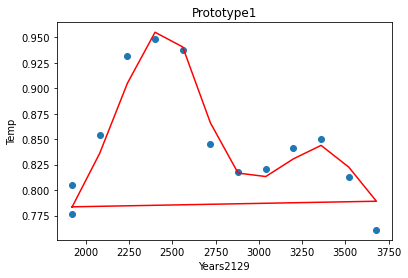

None


 [-8.32453539e-79  1.48708195e-74 -8.18487191e-71  1.57202285e-68
  9.18915837e-64  7.12220472e-61 -1.02900033e-56 -3.06216475e-53
  6.23301720e-50  5.63613375e-46  6.20769849e-43 -6.03743540e-39
 -2.35614939e-35  2.74214314e-32  3.83172837e-28  3.20602814e-25
 -4.85424503e-21 -8.79409086e-18  6.55889523e-14  7.51910886e-11
 -1.05411298e-06  2.88044581e-03 -3.88866292e+00  2.71917687e+03
 -7.90798111e+05] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 22.863 		 21.73365218225098
1901 2 		 24.033 		 23.152670096632793
1901 3 		 25.072 		 25.093050204916626
1901 4 		 26.912 		 26.60623532963707
1901 5 		 25.525 		 26.561966415774776
1901 6 		 23.507 		 24.612271349938354
1901 7 		 22.884 		 23.003341915637954
1901 8 		 23.029 		 22.732437878950265
1901 9 		 24.131 		 23.138503065681782
1901 10 		 23.73 		 23.628584777173355
1901 11 		 22.846 		 23.207297213249607
1901 12 		 21.172 		 22.3727026686545
1902 1 		 21.711 		 21.7472105883013
1902 2 		 23.002 		 23.166200701588533

1940 8 		 22.511 		 22.83797383314348
1940 9 		 23.626 		 23.388192467863437
1940 10 		 23.708 		 23.572688772699564
1940 11 		 22.347 		 22.856362483777804
1940 12 		 21.682 		 21.824439055935247
1941 1 		 22.26 		 22.075953420025062
1941 2 		 23.607 		 23.706498700875557
1941 3 		 26.28 		 25.60089063492394
1941 4 		 27.331 		 26.839804452295184
1941 5 		 26.32 		 26.032188001205913
1941 6 		 23.384 		 23.88320316216047
1941 7 		 23.306 		 22.77453778583906
1941 8 		 23.306 		 22.84166968353349
1941 9 		 23.346 		 23.394365719170075
1941 10 		 23.87 		 23.568236372635468
1941 11 		 23.199 		 22.847549015200464
1941 12 		 21.931 		 21.814554228103486
1942 1 		 21.828 		 22.081932611346012
1942 2 		 23.789 		 23.720416956365806
1942 3 		 25.854 		 25.613199947705258
1942 4 		 27.047 		 26.843037411852507
1942 5 		 26.593 		 26.01638795586652
1942 6 		 23.719 		 23.866741862831404
1942 7 		 22.517 		 22.77117977351579
1942 8 		 22.541 		 22.84541104321997
1942 9 		 23.379 		 23.40050365

1962 5 		 25.403 		 25.68099458593945
1962 6 		 24.494 		 23.560661591476528
1962 7 		 23.079 		 22.72436113937921
1962 8 		 22.714 		 22.9295652694616
1962 9 		 23.367 		 23.513156666717258
1962 10 		 23.394 		 23.445150651492877
1962 11 		 22.864 		 22.65604516542214
1962 12 		 22.176 		 21.791232865248574
1963 1 		 21.959 		 22.208928663368106
1963 2 		 23.101 		 24.010190529600486
1963 3 		 25.659 		 25.866156161058463
1963 4 		 26.276 		 26.87778053884837
1963 5 		 26.173 		 25.663392424619524
1963 6 		 23.618 		 23.54657710317499
1963 7 		 23.31 		 22.722966911878203
1963 8 		 22.917 		 22.934222969916416
1963 9 		 23.955 		 23.51813353208336
1963 10 		 23.698 		 23.438059338149383
1963 11 		 23.33 		 22.64630221184413
1963 12 		 22.178 		 21.801285960118054
1964 1 		 22.038 		 22.215348916707327
1964 2 		 24.098 		 24.02383273013192
1964 3 		 26.179 		 25.877902592953994
1964 4 		 27.95 		 26.87780763578764
1964 5 		 27.021 		 25.645724385658976
1964 6 		 23.986 		 23.5326135470

1999 1 		 22.706 		 22.48456412817887
1999 2 		 24.291 		 24.48943184843357
1999 3 		 26.778 		 26.265235266544625
1999 4 		 26.821 		 26.781455222903517
1999 5 		 24.723 		 25.00040436123102
1999 6 		 23.424 		 23.1227210415022
1999 7 		 22.977 		 22.722092585709646
1999 8 		 23.312 		 23.12636587975244
1999 9 		 24.304 		 23.632286756322486
1999 10 		 24.129 		 23.142196438488316
1999 11 		 23.441 		 22.215108591110212
1999 12 		 22.166 		 22.34650955183315
2000 1 		 23.136 		 22.493677019239172
2000 2 		 24.618 		 24.502378187046155
2000 3 		 25.895 		 26.275469172848155
2000 4 		 27.034 		 26.775904783922947
2000 5 		 25.665 		 24.981613220641158
2000 6 		 23.173 		 23.113288177056006
2000 7 		 22.802 		 22.72326735147438
2000 8 		 22.813 		 23.132267118473305
2000 9 		 23.975 		 23.63328123224969
2000 10 		 23.808 		 23.13346960709314
2000 11 		 23.65 		 22.200849081096006
2000 12 		 21.998 		 22.319882205907955
2001 1 		 23.177 		 22.502869923205814
2001 2 		 25.635 		 24.5153048

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


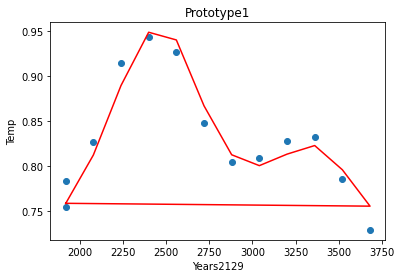

None


 [-8.85821238e-79  1.57701223e-74 -8.63676275e-71  1.48077772e-68
  9.68018405e-64  7.77388086e-61 -1.07677706e-56 -3.24548538e-53
  6.39522783e-50  5.91146126e-46  6.71109108e-43 -6.26631173e-39
 -2.47856257e-35  2.75957375e-32  3.99654926e-28  3.47334268e-25
 -5.03582757e-21 -9.29267800e-18  6.79318282e-14  7.97772468e-11
 -1.09435067e-06  2.97729053e-03 -4.00723143e+00  2.79492634e+03
 -8.10945786e+05] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 22.985 		 22.054311882488427
1901 2 		 23.945 		 23.49261223935336
1901 3 		 25.849 		 25.76219087282568
1901 4 		 27.983 		 27.616148389093578
1901 5 		 26.397 		 27.757642803005872
1901 6 		 24.477 		 25.77861050889641
1901 7 		 23.461 		 23.97995081076771
1901 8 		 23.476 		 23.445993606351315
1901 9 		 24.665 		 23.709105530016124
1901 10 		 24.244 		 24.131187395475806
1901 11 		 23.017 		 23.52260114928335
1901 12 		 21.23 		 22.48561962311715
1902 1 		 22.191 		 22.06520470251888
1902 2 		 23.503 		 23.508016636811195


1919 1 		 23.201 		 22.206042744614184
1919 2 		 24.812 		 23.77489143694192
1919 3 		 26.375 		 26.04183462447673
1919 4 		 28.392 		 27.78453151089698
1919 5 		 26.757 		 27.554376780934632
1919 6 		 24.265 		 25.41464290974289
1919 7 		 23.716 		 23.808813721217213
1919 8 		 23.617 		 23.445449999414382
1919 9 		 24.252 		 23.81490490733832
1919 10 		 24.255 		 24.10427148541063
1919 11 		 23.247 		 23.32271602731198
1919 12 		 21.815 		 22.145904412828386
1920 1 		 22.112 		 22.212434409715236
1920 2 		 24.21 		 23.79081213002652
1920 3 		 26.806 		 26.05721141050011
1920 4 		 27.638 		 27.792699284248055
1920 5 		 27.163 		 27.541558199770748
1920 6 		 24.82 		 25.394916586123408
1920 7 		 23.556 		 23.800454004742203
1920 8 		 23.694 		 23.446091883413494
1920 9 		 24.244 		 23.82093391316384
1920 10 		 24.365 		 24.101114287041128
1920 11 		 23.009 		 23.311791230402886
1920 12 		 21.352 		 22.12621893339604
1921 1 		 22.935 		 22.218685534797608
1921 2 		 23.764 		 23.806749984

1938 9 		 23.44 		 23.92819746046513
1938 10 		 22.886 		 24.014934907488524
1938 11 		 22.245 		 23.11827894755453
1938 12 		 21.683 		 21.803868150435388
1939 1 		 21.936 		 22.316898097537457
1939 2 		 23.561 		 24.095428787104783
1939 3 		 25.647 		 26.345861346341668
1939 4 		 27.403 		 27.921638544268905
1939 5 		 27.064 		 27.270808194838462
1939 6 		 24.669 		 25.033827915556728
1939 7 		 22.727 		 23.663067364670336
1939 8 		 23.251 		 23.471289718352256
1939 9 		 23.652 		 23.93395160701126
1939 10 		 24.069 		 24.008583731882272
1939 11 		 22.181 		 23.107585082642732
1939 12 		 21.025 		 21.789801215939224
1940 1 		 21.043 		 22.32202255604416
1940 2 		 23.644 		 24.11150887347013
1940 3 		 26.08 		 26.360852036111055
1940 4 		 27.208 		 27.926976964108647
1940 5 		 26.832 		 27.255234309010206
1940 6 		 24.556 		 25.015641666077077
1940 7 		 23.079 		 23.656915935419498
1940 8 		 23.093 		 23.473289146356283
1940 9 		 24.032 		 23.93966881098598
1940 10 		 24.03 		 24.0020

1958 11 		 23.589 		 22.897044784508644
1958 12 		 21.93 		 21.69379756795615
1959 1 		 22.989 		 22.425642730914056
1959 2 		 24.967 		 24.416124002642928
1959 3 		 26.794 		 26.640995494700967
1959 4 		 28.105 		 27.998877466849983
1959 5 		 27.78 		 26.938369607038794
1959 6 		 24.456 		 24.6884671491459
1959 7 		 22.753 		 23.558754884921015
1959 8 		 23.384 		 23.52365638627857
1959 9 		 24.032 		 24.03828752373904
1959 10 		 24.143 		 23.85224418848008
1959 11 		 23.201 		 22.885227690808474
1959 12 		 22.318 		 21.700368925653397
1960 1 		 23.02 		 22.43168450566381
1960 2 		 24.301 		 24.432069906167687
1960 3 		 26.621 		 26.65546121252328
1960 4 		 28.025 		 28.00106043449789
1960 5 		 26.899 		 26.920715205080807
1960 6 		 24.788 		 24.672277490131556
1960 7 		 23.857 		 23.554524005554615
1960 8 		 24.219 		 23.526942201547325
1960 9 		 23.8 		 24.042785513721405
1960 10 		 24.021 		 23.84315828036517
1960 11 		 22.778 		 22.87330424397439
1960 12 		 22.055 		 21.7082955354

1983 7 		 24.519 		 23.48043734293431
1983 8 		 23.76 		 23.618649433933196
1983 9 		 23.844 		 24.118130242787302
1983 10 		 23.967 		 23.61330454777926
1983 11 		 22.676 		 22.557255307100714
1983 12 		 22.384 		 22.20805398660153
1984 1 		 23.339 		 22.604180776260794
1984 2 		 24.321 		 24.81054780524224
1984 3 		 26.244 		 26.99173402451724
1984 4 		 27.605 		 28.00330460021645
1984 5 		 28.223 		 26.47595807660371
1984 6 		 24.425 		 24.317424147196114
1984 7 		 23.216 		 23.47816723010689
1984 8 		 23.505 		 23.623285262815653
1984 9 		 24.287 		 24.119976007156072
1984 10 		 23.982 		 23.602725221209226
1984 11 		 23.09 		 22.54133622377366
1984 12 		 23.115 		 22.23478714825958
1985 1 		 23.637 		 22.612628892980517
1985 2 		 25.173 		 24.82611828056723
1985 3 		 27.478 		 27.00521579850465
1985 4 		 28.382 		 28.001278952263295
1985 5 		 27.589 		 26.456757734440266
1985 6 		 23.937 		 24.304083431623877
1985 7 		 23.54 		 23.47597173909098
1985 8 		 23.571 		 23.627970312081

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


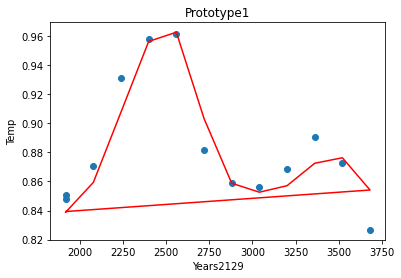

None


 [-1.03830209e-78  1.87269467e-74 -1.04593169e-70  2.68523200e-68
  1.17924067e-63  8.06181689e-61 -1.34830032e-56 -3.84229868e-53
  8.70190556e-50  7.32464810e-46  7.18482617e-43 -8.13920437e-39
 -3.02597951e-35  4.10789591e-32  5.08055037e-28  3.61493725e-25
 -6.57608498e-21 -1.10480191e-17  8.95622883e-14  9.25223582e-11
 -1.42769456e-06  3.97781183e-03 -5.44606176e+00  3.85547004e+03
 -1.13431574e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 20.114 		 19.614113635350485
1901 2 		 20.518 		 20.3318017470357
1901 3 		 21.693 		 21.452630926868412
1901 4 		 23.24 		 22.61477471165592
1901 5 		 22.839 		 23.025096256180202
1901 6 		 20.984 		 21.776046108266804
1901 7 		 20.533 		 20.546600103976672
1901 8 		 20.438 		 20.29690801559249
1901 9 		 20.876 		 20.359575329570568
1901 10 		 20.891 		 20.69565879157791
1901 11 		 20.827 		 20.88019912075857
1901 12 		 19.95 		 20.542463737024462
1902 1 		 20.083 		 19.640707872413564
1902 2 		 20.511 		 20.33786956850486
1

1923 12 		 20.242 		 20.29897697505588
1924 1 		 19.856 		 20.011285543269015
1924 2 		 20.642 		 20.486322365236003
1924 3 		 22.159 		 21.64421837346861
1924 4 		 23.395 		 22.798358625425493
1924 5 		 23.09 		 22.890504321655726
1924 6 		 21.083 		 21.450611674933228
1924 7 		 20.295 		 20.427351832500193
1924 8 		 20.547 		 20.297806741891897
1924 9 		 20.475 		 20.414619122775736
1924 10 		 20.727 		 20.78523140266398
1924 11 		 20.23 		 20.855470667517277
1924 12 		 19.663 		 20.287750700528267
1925 1 		 19.526 		 20.020531143514905
1925 2 		 19.855 		 20.493629150171298
1925 3 		 21.725 		 21.65261047638813
1925 4 		 23.223 		 22.805631887710188
1925 5 		 22.427 		 22.883047083871904
1925 6 		 20.631 		 21.43692042137543
1925 7 		 20.512 		 20.423300513754135
1925 8 		 20.467 		 20.297985085940454
1925 9 		 20.851 		 20.41752792218933
1925 10 		 21.319 		 20.788596571283882
1925 11 		 20.897 		 20.85374979377771
1925 12 		 19.978 		 20.27663674461702
1926 1 		 20.185 		 20.02927

1948 7 		 20.207 		 20.35224344698945
1948 8 		 20.219 		 20.30510802840302
1948 9 		 19.923 		 20.495431635601914
1948 10 		 20.916 		 20.850140743440484
1948 11 		 21.339 		 20.79412851810688
1948 12 		 19.495 		 20.108872994428967
1949 1 		 19.777 		 20.129290239697788
1949 2 		 20.041 		 20.677863075230736
1949 3 		 21.851 		 21.856504859576468
1949 4 		 22.666 		 22.957178213170266
1949 5 		 22.134 		 22.668138824960682
1949 6 		 20.669 		 21.12684242162341
1949 7 		 20.251 		 20.350014944540803
1949 8 		 20.409 		 20.305565550504717
1949 9 		 19.976 		 20.499248428820167
1949 10 		 20.803 		 20.85208660914982
1949 11 		 20.182 		 20.790453752732372
1949 12 		 19.707 		 20.108109910706524
1950 1 		 19.835 		 20.13058099477226
1950 2 		 20.091 		 20.685795660652687
1950 3 		 21.426 		 21.865113884198013
1950 4 		 22.785 		 22.962419364301955
1950 5 		 22.765 		 22.657808039756958
1950 6 		 20.885 		 21.114826236384456
1950 7 		 19.848 		 20.347848521074745
1950 8 		 20.405 		 20.30

1970 7 		 20.294 		 20.31617400612915
1970 8 		 19.913 		 20.31914249005029
1970 9 		 20.025 		 20.585022426961455
1970 10 		 20.703 		 20.878682442529595
1970 11 		 20.618 		 20.683375267634634
1970 12 		 19.458 		 20.29433595031733
1971 1 		 19.593 		 20.13358980786102
1971 2 		 20.805 		 20.854114552142565
1971 3 		 21.521 		 22.04787019644538
1971 4 		 23.081 		 23.049251276990866
1971 5 		 22.48 		 22.42004872906441
1971 6 		 20.13 		 20.882587077508216
1971 7 		 20.063 		 20.315093787489925
1971 8 		 20.03 		 20.320014655413573
1971 9 		 20.755 		 20.589288893724326
1971 10 		 20.154 		 20.87929400919238
1971 11 		 20.34 		 20.676641161313746
1971 12 		 19.97 		 20.312767466301565
1972 1 		 19.608 		 20.13319006355526
1972 2 		 20.049 		 20.862159234470223
1972 3 		 22.023 		 22.05665264313901
1972 4 		 23.082 		 23.052209030116444
1972 5 		 22.358 		 22.407858767016325
1972 6 		 21.78 		 20.872542166019326
1972 7 		 20.731 		 20.31405436361069
1972 8 		 20.652 		 20.320910588158

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


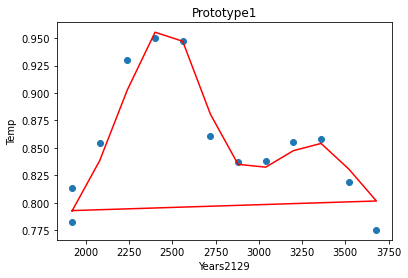

None


 [-7.05446464e-79  1.26192953e-74 -6.96037638e-71  1.40276431e-68
  7.81910998e-64  5.95483395e-61 -8.78284317e-57 -2.59693436e-53
  5.37266433e-50  4.80454969e-46  5.20425520e-43 -5.17565034e-39
 -2.00482826e-35  2.39201871e-32  3.27629723e-28  2.67678265e-25
 -4.16483723e-21 -7.45631641e-18  5.63500089e-14  6.35401167e-11
 -9.04471645e-07  2.47981211e-03 -3.35629596e+00  2.35239607e+03
 -6.85700080e+05] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.391 		 22.164622646677774
1901 2 		 24.425 		 23.494786661687773
1901 3 		 25.257 		 25.290318702172023
1901 4 		 27.202 		 26.867459563824813
1901 5 		 26.001 		 26.976048112734684
1901 6 		 24.267 		 25.243898397665003
1901 7 		 23.676 		 23.74625571344001
1901 8 		 23.836 		 23.504211054443847
1901 9 		 24.711 		 23.876633868697564
1901 10 		 24.228 		 24.192823500837665
1901 11 		 23.264 		 23.670973629228303
1901 12 		 21.743 		 22.913643749765587
1902 1 		 22.104 		 22.181913963023106
1902 2 		 23.225 		 23.506134618

1923 5 		 26.169 		 26.751530737488995
1923 6 		 24.674 		 24.861127814743202
1923 7 		 22.801 		 23.605167540825438
1923 8 		 23.459 		 23.55657972371159
1923 9 		 23.73 		 23.987272420659195
1923 10 		 24.003 		 24.14847685407428
1923 11 		 23.455 		 23.47468162237806
1923 12 		 22.682 		 22.639096332422923
1924 1 		 22.383 		 22.45961008853791
1924 2 		 24.165 		 23.764619129962753
1924 3 		 25.657 		 25.590303289886098
1924 4 		 27.647 		 27.04482897620229
1924 5 		 26.943 		 26.739749568249565
1924 6 		 24.18 		 24.844380292895714
1924 7 		 23.201 		 23.60013649342535
1924 8 		 23.848 		 23.559492912284565
1924 9 		 24.015 		 23.992150502807924
1924 10 		 23.967 		 24.144899990710893
1924 11 		 22.733 		 23.46611298683239
1924 12 		 21.765 		 22.626201680466068
1925 1 		 22.441 		 22.468726469810587
1925 2 		 23.414 		 23.77669419162674
1925 3 		 25.303 		 25.603233660954515
1925 4 		 27.239 		 27.051210659093687
1925 5 		 25.665 		 26.727840063087175
1925 6 		 24.26 		 24.8277021

1945 9 		 23.95 		 24.08714487415133
1945 10 		 24.141 		 24.04020630008681
1945 11 		 22.832 		 23.293484390902798
1945 12 		 22.5 		 22.404539568773934
1946 1 		 21.6 		 22.622749833993147
1946 2 		 23.536 		 24.0343485765229
1946 3 		 25.923 		 25.871748921136838
1946 4 		 26.83 		 27.156591784566174
1946 5 		 26.36 		 26.450655911504757
1946 6 		 24.196 		 24.4957662421125
1946 7 		 23.261 		 23.517152041147927
1946 8 		 23.157 		 23.633386587254236
1946 9 		 23.89 		 24.091191775735002
1946 10 		 24.225 		 24.033913914974313
1946 11 		 23.104 		 23.285484758696985
1946 12 		 22.256 		 22.398509676984975
1947 1 		 22.95 		 22.628915437332818
1947 2 		 23.314 		 24.046760256569367
1947 3 		 25.723 		 25.884362588017712
1947 4 		 26.091 		 27.160182108450215
1947 5 		 27.217 		 26.43628803058667
1947 6 		 24.4 		 24.480934170793276
1947 7 		 23.185 		 23.514563907026776
1947 8 		 23.648 		 23.637151028636378
1947 9 		 23.552 		 24.095183913282582
1947 10 		 23.561 		 24.0275164008247

1969 12 		 22.538 		 22.490185147545766
1970 1 		 22.907 		 22.763309095073026
1970 2 		 23.921 		 24.33377419701917
1970 3 		 26.052 		 26.168333186406176
1970 4 		 27.314 		 27.204345892328302
1970 5 		 26.001 		 26.082995777166914
1970 6 		 24.099 		 24.168206236857454
1970 7 		 23.401 		 23.479838371548336
1970 8 		 23.225 		 23.731745904370676
1970 9 		 23.845 		 24.168357410884926
1970 10 		 23.671 		 23.855890547830146
1970 11 		 22.767 		 23.085992308914197
1970 12 		 21.849 		 22.50597151973052
1971 1 		 23.049 		 22.769194635290187
1971 2 		 23.901 		 24.346283498767296
1971 3 		 25.322 		 26.18035922648711
1971 4 		 27.027 		 27.20454982843576
1971 5 		 26.139 		 26.066809382542502
1971 6 		 23.201 		 24.155915596130768
1971 7 		 23.264 		 23.479320049307773
1971 8 		 23.42 		 23.73616414247034
1971 9 		 24.04 		 24.170577316790354
1971 10 		 23.637 		 23.847605268097947
1971 11 		 22.481 		 23.076955637104344
1971 12 		 21.782 		 22.522738060161004
1972 1 		 21.767 		 22.77

1991 1 		 24.019 		 22.895107453796545
1991 2 		 24.765 		 24.59619750477327
1991 3 		 26.958 		 26.413350697535556
1991 4 		 27.265 		 27.177706679023334
1991 5 		 27.261 		 25.73393679163931
1991 6 		 24.319 		 23.934395201857665
1991 7 		 23.194 		 23.483740421071182
1991 8 		 23.095 		 23.828411724671255
1991 9 		 24.829 		 24.193896364919375
1991 10 		 24.145 		 23.675545043311548
1991 11 		 23.133 		 22.873750665090512
1991 12 		 22.506 		 22.955520825624
1992 1 		 21.907 		 22.90192311335681
1992 2 		 24.535 		 24.60866642495943
1992 3 		 25.851 		 26.424569949306083
1992 4 		 27.441 		 27.174810744151007
1992 5 		 26.343 		 25.716969713158438
1992 6 		 24.434 		 23.924550846125463
1992 7 		 23.521 		 23.484641064244787
1992 8 		 23.66 		 23.833173877756575
1992 9 		 24.341 		 24.1939197825375
1992 10 		 24.15 		 23.666820413238835
1992 11 		 23.799 		 22.862376551478636
1992 12 		 22.169 		 22.971591528258752
1993 1 		 22.669 		 22.90879561793385
1993 2 		 24.208 		 24.62113215

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


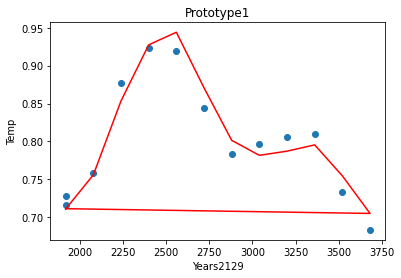

None


 [-1.24870639e-78  2.26262284e-74 -1.27204382e-70  3.61168159e-68
  1.43709816e-63  9.29253203e-61 -1.65704203e-56 -4.64179751e-53
  1.09440536e-49  8.97393150e-46  8.39652803e-43 -1.01060743e-38
 -3.69142757e-35  5.27672989e-32  6.27020513e-28  4.18792149e-25
 -8.17495783e-21 -1.33757416e-17  1.11606207e-13  1.11209091e-10
 -1.77400875e-06  4.97245261e-03 -6.83565317e+00  4.85558652e+03
 -1.43282486e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.811 		 22.846811392336615
1901 2 		 24.303 		 24.387490476583594
1901 3 		 28.329 		 27.611451421316247
1901 4 		 30.76 		 30.11386649324512
1901 5 		 29.464 		 31.110614019512663
1901 6 		 27.311 		 29.06177488201065
1901 7 		 25.537 		 26.5625970287635
1901 8 		 25.336 		 25.68188193664094
1901 9 		 26.419 		 25.735697535281535
1901 10 		 26.314 		 26.130275339480022
1901 11 		 23.755 		 25.154352645104282
1901 12 		 22.511 		 23.475930339762474
1902 1 		 23.660999999999998 		 22.88384034223994
1902 2 		 25.087 		 24.407

1923 5 		 30.17 		 30.938734400128478
1923 6 		 29.14 		 28.48595138595579
1923 7 		 25.413 		 26.252380537295245
1923 8 		 25.636 		 25.63665600833995
1923 9 		 25.413 		 25.836586431269996
1923 10 		 25.413 		 26.078730596404053
1923 11 		 23.782 		 24.688621957184278
1923 12 		 23.085 		 23.07037249737745
1924 1 		 23.881 		 23.367795492305884
1924 2 		 25.936 		 24.88442743446445
1924 3 		 29.328 		 28.07493709911918
1924 4 		 31.723 		 30.482444510407277
1924 5 		 31.257 		 30.92807410006737
1924 6 		 28.193 		 28.4599990738905
1924 7 		 26.416 		 26.240199510652104
1924 8 		 26.305 		 25.635404795396607
1924 9 		 25.675 		 25.841697536549994
1924 10 		 24.92 		 26.07354574300302
1924 11 		 22.51 		 24.667478914675765
1924 12 		 21.985 		 23.05222899319371
1925 1 		 22.357 		 23.378512371290007
1925 2 		 24.521 		 24.907222813706376
1925 3 		 28.536 		 28.094573773627634
1925 4 		 31.545 		 30.497222668477797
1925 5 		 29.806 		 30.91717367563536
1925 6 		 27.108 		 28.43408788235

1951 4 		 30.002 		 30.834957412851505
1951 5 		 30.609 		 30.553901979367712
1951 6 		 27.259 		 27.78359285569517
1951 7 		 25.936 		 25.968632289237807
1951 8 		 25.716 		 25.626414612270423
1951 9 		 26.863 		 25.984748728248753
1951 10 		 26.677 		 25.832453420374076
1951 11 		 25.06 		 24.124125365996267
1951 12 		 21.812 		 22.68017173886811
1952 1 		 23.569 		 23.49063450531056
1952 2 		 25.799 		 25.5396760071679
1952 3 		 27.723 		 28.612744080332572
1952 4 		 31.192 		 30.845944721979553
1952 5 		 31.147999999999996 		 30.537060951319987
1952 6 		 27.914 		 27.75976054243324
1952 7 		 26.399 		 25.960543702858963
1952 8 		 25.524 		 25.626991643964775
1952 9 		 25.974 		 25.989891972312236
1952 10 		 25.988 		 25.81982019004924
1952 11 		 22.618 		 24.105270409350748
1952 12 		 23.827 		 22.67485087609058
1953 1 		 23.272 		 23.491233227628747
1953 2 		 26.055 		 25.563360029883214
1953 3 		 30.29 		 28.631560727059373
1953 4 		 30.438 		 30.85676846547378
1953 5 		 31.828 	

1976 1 		 21.787 		 23.507839508136268
1976 2 		 24.489 		 26.103015052247326
1976 3 		 28.829 		 29.05839126689313
1976 4 		 30.053 		 31.05701624361565
1976 5 		 30.786 		 30.079242880774192
1976 6 		 27.453 		 27.223915187919044
1976 7 		 25.824 		 25.802218645959623
1976 8 		 25.29 		 25.660532680455127
1976 9 		 26.232 		 26.094119085859038
1976 10 		 27.557 		 25.448055178692098
1976 11 		 25.682 		 23.674532380008603
1976 12 		 23.891 		 22.888194597498977
1977 1 		 23.352 		 23.509686816082798
1977 2 		 26.46 		 26.12609589231899
1977 3 		 29.331 		 29.07669693140266
1977 4 		 30.097 		 31.063465018832588
1977 5 		 29.86 		 30.05818201823486
1977 6 		 27.488 		 27.203250438941176
1977 7 		 25.927 		 25.79698057415476
1977 8 		 25.503 		 25.662759054965804
1977 9 		 27.148 		 26.09729159927135
1977 10 		 26.274 		 25.430110128441356
1977 11 		 25.756 		 23.657131000661757
1977 12 		 22.35 		 22.911608617772814
1978 1 		 23.779 		 23.511692679434546
1978 2 		 24.886 		 26.1491342

2000 1 		 24.416 		 23.605076191873753
2000 2 		 25.636 		 26.6433430949538
2000 3 		 28.738 		 29.491121656409927
2000 4 		 31.941 		 31.154737147617617
2000 5 		 30.379 		 29.541020111687015
2000 6 		 27.008 		 26.769111564183138
2000 7 		 25.558 		 25.70144736814266
2000 8 		 25.943 		 25.73175876239454
2000 9 		 26.475 		 26.12938547399966
2000 10 		 26.970999999999997 		 24.984531068769748
2000 11 		 25.076 		 23.254089515042956
2000 12 		 22.762 		 23.28628964327788
2001 1 		 24.281 		 23.61184403311228
2001 2 		 26.81 		 26.665174860594327
2001 3 		 28.862 		 29.508808924288953
2001 4 		 31.216 		 31.15613512359885
2001 5 		 31.61 		 29.517375987499484
2001 6 		 27.644 		 26.752080391849855
2001 7 		 26.154 		 25.698281086965927
2001 8 		 25.643 		 25.73549987565307
2001 9 		 26.833 		 26.128677870859857
2001 10 		 26.13 		 24.96427104850253
2001 11 		 25.601 		 23.23634792895382
2001 12 		 23.423 		 23.262255576664113
2002 1 		 23.46 		 23.618846194188574
2002 2 		 26.829 		 26

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


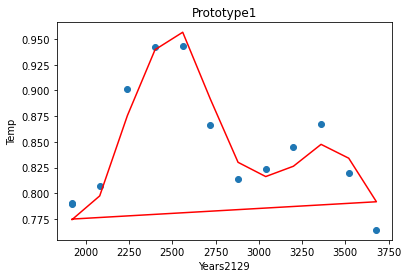

None


 [-1.18722160e-78  2.15443375e-74 -1.21422670e-70  3.59262298e-68
  1.37252675e-63  8.63185523e-61 -1.58864824e-56 -4.41132860e-53
  1.06168261e-49  8.58884806e-46  7.81906226e-43 -9.74487482e-39
 -3.52333067e-35  5.19074625e-32  6.02640129e-28  3.85858490e-25
 -7.89480134e-21 -1.26907265e-17  1.07995017e-13  1.04886879e-10
 -1.71387964e-06  4.82603728e-03 -6.65686810e+00  4.74296088e+03
 -1.40366003e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.095 		 22.63825352003239
1901 2 		 23.345 		 23.60855426623672
1901 3 		 26.511 		 25.909899912925436
1901 4 		 28.672 		 27.8678915480189
1901 5 		 27.987 		 28.73362594106793
1901 6 		 25.727 		 27.089643207859247
1901 7 		 24.487 		 25.055255013071
1901 8 		 24.424 		 24.43776003315672
1901 9 		 25.358 		 24.62118340030685
1901 10 		 25.653 		 25.272222362006083
1901 11 		 24.447 		 25.16265019740723
1901 12 		 23.149 		 24.023490907624364
1902 1 		 23.48 		 22.68034754706174
1902 2 		 24.169 		 23.620880230257285
1902 

1922 3 		 26.939 		 26.232974074814468
1922 4 		 28.812 		 28.146101720642296
1922 5 		 28.207 		 28.613075108522548
1922 6 		 25.752 		 26.638524241369215
1922 7 		 24.089 		 24.824569081643595
1922 8 		 24.348 		 24.429718401525168
1922 9 		 24.668 		 24.7422829516232
1922 10 		 25.451 		 25.373177250349894
1922 11 		 24.218 		 24.939969884980467
1922 12 		 22.073 		 23.663218095131217
1923 1 		 22.649 		 23.22154703678563
1923 2 		 23.247 		 23.91176333689317
1923 3 		 26.341 		 26.2480548378583
1923 4 		 27.88 		 28.158543081173672
1923 5 		 27.819 		 28.60505265389569
1923 6 		 26.788 		 26.617188039738682
1923 7 		 24.067 		 24.815208975192157
1923 8 		 24.501 		 24.429967479597774
1923 9 		 24.561 		 24.748755134960636
1923 10 		 25.377 		 25.376368103241546
1923 11 		 24.178 		 24.928224248340353
1923 12 		 23.662 		 23.64684494691342
1924 1 		 23.429 		 23.234531541377304
1924 2 		 24.566 		 23.926891150495035
1924 3 		 27.458 		 26.263111908381802
1924 4 		 29.185 		 28.17089

1944 10 		 25.347 		 25.402676277821882
1944 11 		 24.486 		 24.66431828156486
1944 12 		 23.627 		 23.38234477172792
1945 1 		 22.344 		 23.348999361136926
1945 2 		 23.903 		 24.262039578218012
1945 3 		 26.827 		 26.57480251108855
1945 4 		 27.388 		 28.408238775976002
1945 5 		 28.275 		 28.37902902024053
1945 6 		 25.874 		 26.160089136863125
1945 7 		 24.305 		 24.643806133665144
1945 8 		 24.727 		 24.4490298682414
1945 9 		 24.226 		 24.903818388028068
1945 10 		 25.218 		 25.40188767925091
1945 11 		 23.75 		 24.651022485129534
1945 12 		 22.247 		 23.375768397048116
1946 1 		 22.293 		 23.349094242712482
1946 2 		 23.777 		 24.278612301077693
1946 3 		 26.5 		 26.58946968634799
1946 4 		 27.522 		 28.41835971893929
1946 5 		 27.481 		 28.366610516022888
1946 6 		 24.965 		 26.140069960627702
1946 7 		 24.164 		 24.63749472498335
1946 8 		 24.203 		 24.450508225763215
1946 9 		 24.577 		 24.91131392100267
1946 10 		 26.07 		 25.40090508074872
1946 11 		 24.543 		 24.6376607956

1968 5 		 29.049 		 28.051793058102948
1968 6 		 26.442 		 25.723422273295
1968 7 		 24.569 		 24.527025923920792
1968 8 		 24.555 		 24.496989494340493
1968 9 		 25.361 		 25.07909821783565
1968 10 		 25.077 		 25.330973122784865
1968 11 		 24.556 		 24.32708117699623
1968 12 		 24.024 		 23.483080350954083
1969 1 		 23.171 		 23.297704664381218
1969 2 		 25.528 		 24.665911199390887
1969 3 		 28.081 		 26.923843173541126
1969 4 		 29.392 		 28.61550211455859
1969 5 		 29.446 		 28.035753500571474
1969 6 		 26.623 		 25.705705173829568
1969 7 		 24.278 		 24.523189240798352
1969 8 		 24.918 		 24.499759066347032
1969 9 		 24.452 		 25.086646543320267
1969 10 		 25.978 		 25.325659197082743
1969 11 		 25.74 		 24.3121391685009
1969 12 		 24.05 		 23.499864578336474
1970 1 		 23.936 		 23.294556402279063
1970 2 		 25.002 		 24.682832453161478
1970 3 		 27.104 		 26.938271583942694
1970 4 		 29.156 		 28.622388610392807
1970 5 		 28.667 		 28.019578310329464
1970 6 		 25.388 		 25.688103

1992 5 		 28.886 		 27.633687137953935
1992 6 		 26.729 		 25.332396011935547
1992 7 		 25.411 		 24.458646522877736
1992 8 		 24.604 		 24.580326457321643
1992 9 		 25.549 		 25.247722010347992
1992 10 		 25.788 		 25.158403828797862
1992 11 		 25.407 		 23.948057267703113
1992 12 		 22.91 		 23.89164643597975
1993 1 		 23.771 		 23.243485976133496
1993 2 		 23.892 		 25.067782948859033
1993 3 		 25.914 		 27.2675750947725
1993 4 		 28.894 		 28.736806313503532
1993 5 		 29.224 		 27.614981084816158
1993 6 		 26.924 		 25.317730955066157
1993 7 		 24.596 		 24.456768124118447
1993 8 		 24.53 		 24.584583362134172
1993 9 		 24.689 		 25.25391094263643
1993 10 		 25.747 		 25.149385675098745
1993 11 		 25.482 		 23.931516989659517
1993 12 		 22.887 		 23.888336395774036
1994 1 		 23.559 		 23.24281366602704
1994 2 		 24.113 		 25.084235480956732
1994 3 		 28.048 		 27.281760726524517
1994 4 		 27.849 		 28.739768881993367
1994 5 		 29.131 		 27.596190017340703
1994 6 		 25.531 		 25.303

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


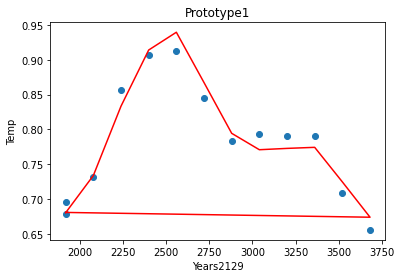

None


 [-1.33483836e-78  2.41528535e-74 -1.35501246e-70  3.72210861e-68
  1.52994573e-63  1.00920123e-60 -1.75901065e-56 -4.95813365e-53
  1.15210370e-49  9.53742264e-46  9.08677355e-43 -1.06866916e-38
 -3.93017353e-35  5.50624388e-32  6.64552189e-28  4.55680191e-25
 -8.63810498e-21 -1.42924276e-17  1.17789868e-13  1.19256000e-10
 -1.87431163e-06  5.23859689e-03 -7.18643823e+00  5.09519342e+03
 -1.50083634e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 24.046 		 22.885226992726324
1901 2 		 24.882 		 24.720731810465452
1901 3 		 28.743 		 28.183492559120058
1901 4 		 31.642 		 30.983440696552393
1901 5 		 30.46 		 32.34652119937539
1901 6 		 28.274 		 30.2856296107918
1901 7 		 26.271 		 27.56553344711661
1901 8 		 25.934 		 26.51468995219469
1901 9 		 27.222 		 26.451771347001195
1901 10 		 26.633 		 26.670014009460804
1901 11 		 23.967 		 25.330276325717566
1901 12 		 22.571 		 23.50073012973368
1902 1 		 23.699 		 22.92144169512391
1902 2 		 25.398 		 24.743772074490785


1921 10 		 25.631 		 26.55804358617961
1921 11 		 22.219 		 24.840282215699553
1921 12 		 21.87 		 23.10601708693802
1922 1 		 23.234 		 23.374688723444937
1922 2 		 25.274 		 25.2277055606693
1922 3 		 29.385 		 28.635118802443145
1922 4 		 32.199 		 31.393668857127427
1922 5 		 31.704 		 32.21404874062538
1922 6 		 28.576 		 29.698227664530275
1922 7 		 26.443 		 27.227598560735583
1922 8 		 26.698 		 26.443282805129883
1922 9 		 26.057 		 26.52182223702967
1922 10 		 25.868 		 26.549555555596946
1922 11 		 23.66 		 24.816315688386556
1922 12 		 21.151 		 23.085956165745852
1923 1 		 22.474 		 23.387036919370292
1923 2 		 24.669 		 25.25277238114178
1923 3 		 28.299 		 28.656268960177897
1923 4 		 31.617 		 31.412110655009744
1923 5 		 31.672 		 32.20464166870713
1923 6 		 30.687 		 29.670316097959873
1923 7 		 26.216 		 27.213430880263445
1923 8 		 26.45 		 26.44071102325618
1923 9 		 25.99 		 26.525578866422176
1923 10 		 25.548 		 26.540781075552104
1923 11 		 23.777 		 24.7924475

1943 9 		 25.422 		 26.602384646356104
1943 10 		 25.597 		 26.30416001500189
1943 11 		 24.161 		 24.34101243494451
1943 12 		 21.116 		 22.70906050957739
1944 1 		 23.747 		 23.525940430581567
1944 2 		 25.168 		 25.7874508177489
1944 3 		 27.07 		 29.09591622188687
1944 4 		 30.599 		 31.76956488008797
1944 5 		 32.458 		 31.945618112802503
1944 6 		 28.985 		 29.09557755707204
1944 7 		 26.376 		 26.953463165968653
1944 8 		 26.746 		 26.402929221168158
1944 9 		 26.633 		 26.606099925279615
1944 10 		 26.044 		 26.2893049069494
1944 11 		 23.771999999999995 		 24.3199233122915
1944 12 		 22.688 		 22.695769816949962
1945 1 		 22.953 		 23.5289322360754
1945 2 		 25.176 		 25.8130600515604
1945 3 		 29.128 		 29.116701319530605
1945 4 		 30.583 		 31.784989819332957
1945 5 		 32.329 		 31.93048607803881
1945 6 		 28.48 		 29.06898562648892
1945 7 		 26.333 		 26.942777872443198
1945 8 		 25.964 		 26.40189181651175
1945 9 		 25.768 		 26.609781459152696
1945 10 		 25.749 		 26.2741

1962 7 		 26.65 		 26.782232343822717
1962 8 		 26.446 		 26.39472853480279
1962 9 		 26.105 		 26.663941753804682
1962 10 		 26.469 		 25.977085091128945
1962 11 		 23.462999999999997 		 23.96365623553097
1962 12 		 22.111 		 22.622272330179808
1963 1 		 22.583 		 23.56962026672065
1963 2 		 24.771 		 26.27082207815349
1963 3 		 29.094 		 29.48974473533034
1963 4 		 30.236 		 32.03319406017661
1963 5 		 31.762 		 31.618951261177656
1963 6 		 27.76 		 28.607903866648673
1963 7 		 26.856 		 26.773956498026845
1963 8 		 25.651 		 26.39492480573058
1963 9 		 26.486 		 26.666430387362837
1963 10 		 26.016 		 25.95746669025719
1963 11 		 24.332 		 23.9449604550153
1963 12 		 23.284 		 22.630095302060244
1964 1 		 23.668 		 23.57201597356796
1964 2 		 26.502 		 26.295953448817134
1964 3 		 30.217 		 29.51042968431115
1964 4 		 32.259 		 32.04522659927606
1964 5 		 32.443 		 31.599610490038987
1964 6 		 28.95 		 28.583393200397488
1964 7 		 26.646 		 26.76580176372826
1964 8 		 25.721 		 26.3

1985 11 		 24.811 		 23.544732908561823
1985 12 		 24.221 		 23.14961505298316
1986 1 		 23.2 		 23.66108226342499
1986 2 		 26.484000000000005 		 26.836005401238797
1986 3 		 30.759 		 29.96466995473206
1986 4 		 32.942 		 32.25715388832986
1986 5 		 32.926 		 31.128615738168357
1986 6 		 28.551 		 28.079209807962176
1986 7 		 27.633 		 26.61461109167337
1986 8 		 26.469 		 26.418153160065412
1986 9 		 28.088 		 26.688447115436194
1986 10 		 28.583 		 25.45888535965979
1986 11 		 25.986 		 23.52650176160037
1986 12 		 24.294 		 23.18236884255707
1987 1 		 24.659 		 23.66733129712939
1987 2 		 26.079 		 26.859885265126824
1987 3 		 29.883 		 29.985259995758533
1987 4 		 32.976 		 32.26424840171635
1987 5 		 31.743999999999996 		 31.10539025983214
1987 6 		 29.82 		 28.057995866969225
1987 7 		 27.463 		 26.60891137370467
1987 8 		 27.228 		 26.419957497686145
1987 9 		 28.799 		 26.687504427000878
1987 10 		 27.039 		 25.43574226270616
1987 11 		 24.903 		 23.508227282926438
1987 12 		

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


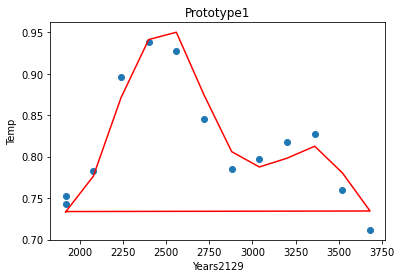

None


 [-1.17689695e-78  2.12673974e-74 -1.19107730e-70  3.19471791e-68
  1.34396690e-63  8.97523769e-61 -1.54211978e-56 -4.36208192e-53
  1.00541592e-49  8.36566561e-46  8.03719592e-43 -9.35170239e-39
 -3.44899395e-35  4.79573966e-32  5.82156836e-28  4.02211760e-25
 -7.56165916e-21 -1.25431926e-17  1.03119370e-13  1.04651080e-10
 -1.64167604e-06  4.58830007e-03 -6.29571238e+00  4.46533089e+03
 -1.31596975e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.035 		 22.21310910163913
1901 2 		 23.415 		 23.594813045547344
1901 3 		 27.148 		 26.520538463643753
1901 4 		 29.37 		 28.785661735567263
1901 5 		 27.962 		 29.48148353399243
1901 6 		 25.854 		 27.44985492131207
1901 7 		 24.267 		 25.12261968069244
1901 8 		 24.153 		 24.323198661510833
1901 9 		 25.239 		 24.507733225333503
1901 10 		 25.384 		 25.06588455457706
1901 11 		 23.203 		 24.393725610687397
1901 12 		 21.99 		 23.00014319874812
1902 1 		 22.898 		 22.245502687362023
1902 2 		 24.153 		 23.61271985779982
1

1924 11 		 22.06 		 24.0145047587296
1924 12 		 21.72 		 22.58979032709729
1925 1 		 21.795 		 22.68266166758258
1925 2 		 23.727 		 24.056382762347347
1925 3 		 27.395 		 26.969837524057365
1925 4 		 30.092 		 29.105641915756276
1925 5 		 28.268 		 29.26013947230298
1925 6 		 25.63 		 26.861450203028507
1925 7 		 24.3 		 24.812166447616182
1925 8 		 24.526 		 24.298443380794488
1925 9 		 25.199 		 24.659801156627946
1925 10 		 24.952 		 25.060253973486834
1925 11 		 23.811 		 23.99788537486922
1925 12 		 21.811 		 22.572299611517227
1926 1 		 23.322 		 22.691740850997157
1926 2 		 25.262 		 24.076758223283104
1926 3 		 27.602 		 26.988043190273455
1926 4 		 27.867 		 29.11759682143573
1926 5 		 29.001 		 29.248212670390494
1926 6 		 27.71 		 26.837299641813154
1926 7 		 25.28 		 24.801163794114256
1926 8 		 24.624 		 24.298410564330407
1926 9 		 24.813 		 24.666664912621492
1926 10 		 25.421 		 25.057232215083204
1926 11 		 23.167 		 23.981288347584197
1926 12 		 22.196 		 22.55496539

1950 9 		 24.062 		 24.834296238790266
1950 10 		 24.173 		 24.913918693405577
1950 11 		 22.628 		 23.59275899926666
1950 12 		 21.832 		 22.25316829152871
1951 1 		 22.586 		 22.789037356604823
1951 2 		 24.093 		 24.601178307957017
1951 3 		 27.087 		 27.43187029208522
1951 4 		 28.444 		 29.372968280478382
1951 5 		 28.89 		 28.886248565842397
1951 6 		 25.59 		 26.255700115640646
1951 7 		 24.483 		 24.572276256079785
1951 8 		 24.35 		 24.32226577736903
1951 9 		 25.747 		 24.841129707084036
1951 10 		 25.694 		 24.90505732855294
1951 11 		 24.611 		 23.577023188644088
1951 12 		 21.31 		 22.248832782595418
1952 1 		 22.925 		 22.789979781084693
1952 2 		 24.888 		 24.622481997809373
1952 3 		 26.501 		 27.44920410933439
1952 4 		 29.73 		 29.381281305779705
1952 5 		 29.456 		 28.869400271340275
1952 6 		 26.322 		 26.233557450757363
1952 7 		 24.912 		 24.564858643230984
1952 8 		 24.219 		 24.324196144086308
1952 9 		 24.813 		 24.84792926694732
1952 10 		 24.981 		 24.8959752

1976 6 		 25.986 		 25.736201810915954
1976 7 		 24.54 		 24.421989609352313
1976 8 		 24.192 		 24.392716403841042
1976 9 		 25.057 		 24.992616424891168
1976 10 		 26.651 		 24.618896095077506
1976 11 		 25.19 		 23.18560880761128
1976 12 		 23.558 		 22.50433636957314
1977 1 		 22.862 		 22.813924707784317
1977 2 		 25.395 		 25.152709792018868
1977 3 		 28.063 		 27.872699026563204
1977 4 		 28.778 		 29.53457321647089
1977 5 		 28.272 		 28.399251951514742
1977 6 		 26.155 		 25.71703383493703
1977 7 		 24.041 		 24.417394327358345
1977 8 		 24.315 		 24.396485469569452
1977 9 		 25.79 		 24.997539986469782
1977 10 		 25.195 		 24.605237894221208
1977 11 		 24.837 		 23.169661500337533
1977 12 		 21.684 		 22.52836169948336
1978 1 		 22.984 		 22.815918178665452
1978 2 		 23.914 		 25.173655949081294
1978 3 		 27.011 		 27.889235535920598
1978 4 		 28.728 		 29.538395386249757
1978 5 		 28.118 		 28.378736086688004
1978 6 		 25.293 		 25.69799873402808
1978 7 		 24.046 		 24.41289

1997 3 		 28.085 		 28.19677316122223
1997 4 		 28.42 		 29.574755970980043
1997 5 		 29.608 		 27.97040134137031
1997 6 		 27.268 		 25.36257303386461
1997 7 		 25.024 		 24.34541006280575
1997 8 		 24.59 		 24.48635941974353
1997 9 		 25.427 		 25.067837277869693
1997 10 		 26.173 		 24.30923384798225
1997 11 		 25.468 		 22.83793825595174
1997 12 		 24.544 		 22.855521386372857
1998 1 		 23.931 		 22.890328562683425
1998 2 		 24.915 		 25.584958199313842
1998 3 		 28.648 		 28.21257730595302
1998 4 		 30.855 		 29.574714418784716
1998 5 		 30.411 		 27.948100571245888
1998 6 		 28.058 		 25.346335665830413
1998 7 		 25.297 		 24.342745894663967
1998 8 		 25.207 		 24.49154183483217
1998 9 		 25.311 		 25.069724023402667
1998 10 		 25.383 		 24.293621601979247
1998 11 		 24.235 		 22.82075409557205
1998 12 		 21.961 		 22.839292006934993
1999 1 		 21.991 		 22.896002764957956
1999 2 		 26.013 		 25.60509043910075
1999 3 		 28.683 		 28.228339093881658
1999 4 		 30.223 		 29.574474013

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


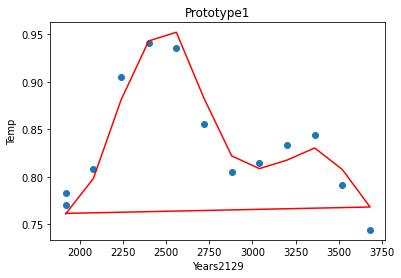

None


 [-1.20863321e-78  2.18335717e-74 -1.22235967e-70  3.26841645e-68
  1.37900892e-63  9.21769752e-61 -1.58200406e-56 -4.47529110e-53
  1.03143607e-49  8.58180645e-46  8.23976442e-43 -9.59531601e-39
 -3.53753582e-35  4.92618106e-32  5.97295076e-28  4.11627814e-25
 -7.76117591e-21 -1.28576257e-17  1.05866366e-13  1.07210500e-10
 -1.68531602e-06  4.71251305e-03 -6.46867812e+00  4.58974285e+03
 -1.35315190e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.133 		 22.311821207998786
1901 2 		 23.51 		 23.566050985474604
1901 3 		 26.458 		 26.045849347381388
1901 4 		 28.514 		 27.975381123822647
1901 5 		 27.386 		 28.623538194854277
1901 6 		 25.394 		 26.814215731472242
1901 7 		 24.166 		 24.793044588378166
1901 8 		 24.175 		 24.195959842939395
1901 9 		 25.104 		 24.36287456676783
1901 10 		 25.09 		 24.820385936120992
1901 11 		 23.538 		 24.37820194090018
1901 12 		 22.24 		 23.3033201051862
1902 1 		 22.949 		 22.346856797619257
1902 2 		 23.909 		 23.581154142439832

1924 2 		 24.676 		 23.94063308701152
1924 3 		 27.425 		 26.405951587824617
1924 4 		 29.209 		 28.250510962775444
1924 5 		 28.687 		 28.44040858685458
1924 6 		 25.92 		 26.313018279219513
1924 7 		 24.611 		 24.552150788983795
1924 8 		 24.793 		 24.188101490807252
1924 9 		 24.465 		 24.476806690445635
1924 10 		 24.114 		 24.833209152659865
1924 11 		 22.488 		 24.111657530468424
1924 12 		 22.128 		 22.91020446329238
1925 1 		 22.128 		 22.825746006543284
1925 2 		 23.515 		 23.957951732412447
1925 3 		 26.739 		 26.421202867385464
1925 4 		 29.097 		 28.26140050818259
1925 5 		 27.557 		 28.430068693817127
1925 6 		 25.214 		 26.291608352918644
1925 7 		 24.168 		 24.54339768501604
1925 8 		 24.495 		 24.188423583642113
1925 9 		 25.013 		 24.482209460728335
1925 10 		 24.878 		 24.831774664145428
1925 11 		 23.966 		 24.099864208832848
1925 12 		 22.293 		 22.893238939039875
1926 1 		 23.387 		 22.835886861583685
1926 2 		 24.971 		 23.975333604269196
1926 3 		 26.981 		 26.43

1950 8 		 24.552 		 24.2131644021892
1950 9 		 23.794 		 24.62188812139677
1950 10 		 23.983 		 24.738436817635318
1950 11 		 22.881 		 23.803881671982353
1950 12 		 22.211 		 22.599805124685634
1951 1 		 22.743 		 22.942891872479116
1951 2 		 23.951 		 24.423357774293518
1951 3 		 26.462 		 26.80868093766505
1951 4 		 27.532 		 28.505020565504672
1951 5 		 28.068 		 28.097927643208298
1951 6 		 24.95 		 25.758929584866856
1951 7 		 24.233 		 24.360987298841124
1951 8 		 24.287 		 24.21481441771472
1951 9 		 25.523 		 24.627446144659537
1951 10 		 25.432 		 24.7324571546861
1951 11 		 24.828 		 23.79186496877158
1951 12 		 21.664 		 22.597326090556106
1952 1 		 23.103 		 22.943618391806726
1952 2 		 24.707 		 24.44155824770825
1952 3 		 25.986 		 26.823282572355588
1952 4 		 28.78 		 28.51269943249086
1952 5 		 28.698 		 28.082898575393948
1952 6 		 25.742 		 25.739601229468825
1952 7 		 24.705 		 24.355577843823003
1952 8 		 24.146 		 24.21651339892717
1952 9 		 24.582 		 24.632984002

1976 3 		 26.767 		 27.168076824399176
1976 4 		 27.349 		 28.652939443815963
1976 5 		 28.089 		 27.680928834321442
1976 6 		 25.645 		 25.30917568384716
1976 7 		 24.418 		 24.25575858926447
1976 8 		 24.391 		 24.27269470068114
1976 9 		 24.715 		 24.75362019142555
1976 10 		 26.43 		 24.535296398457607
1976 11 		 25.439 		 23.47111693555908
1976 12 		 24.092 		 22.91253554194467
1977 1 		 23.084 		 22.949951175904367
1977 2 		 25.029 		 24.893643951559906
1977 3 		 27.457 		 27.182208856426644
1977 4 		 28.1 		 28.656827787289863
1977 5 		 27.579 		 27.6626749387295
1977 6 		 25.802 		 25.292756692421158
1977 7 		 23.423 		 24.25273090547556
1977 8 		 24.313 		 24.275683445886244
1977 9 		 25.212 		 24.757873799983876
1977 10 		 24.829 		 24.525790760400238
1977 11 		 24.774 		 23.457062279344072
1977 12 		 21.886 		 22.93835566673102
1978 1 		 23.06 		 22.950804649498778
1978 2 		 23.765 		 24.91145375789562
1978 3 		 26.574 		 27.196321669839786
1978 4 		 28.038 		 28.66054995938

2000 9 		 25.266 		 24.82812730538333
2000 10 		 25.402 		 24.2861747481809
2000 11 		 24.549 		 23.10060745336907
2000 12 		 22.711 		 23.106719306961168
2001 1 		 23.535 		 23.00918194254348
2001 2 		 25.662 		 25.311062784655487
2001 3 		 26.853 		 27.51479176804656
2001 4 		 28.971 		 28.698799736910033
2001 5 		 28.995 		 27.198919692259746
2001 6 		 26.003 		 24.93861461778218
2001 7 		 24.605 		 24.202308057634625
2001 8 		 24.305 		 24.36265313490713
2001 9 		 25.365 		 24.829758659355807
2001 10 		 24.883 		 24.275138305712957
2001 11 		 25.147 		 23.08396491324948
2001 12 		 23.211 		 23.05341266426118
2002 1 		 23.077 		 23.013708232600706
2002 2 		 25.585 		 25.32794742360944
2002 3 		 28.586 		 27.52833041839348
2002 4 		 29.436 		 28.69833860157849
2002 5 		 29.145 		 27.178771119826006
2002 6 		 26.19 		 24.925561167814305
2002 7 		 24.904 		 24.201039796207567
2002 8 		 24.358 		 24.366885909373405
2002 9 		 25.229 		 24.831260830816348
2002 10 		 25.786 		 24.264076461

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


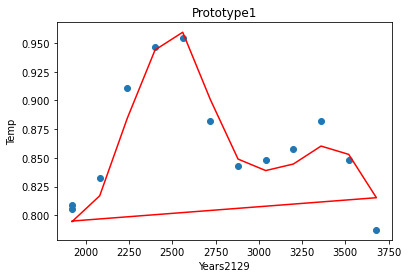

None


 [-1.10376782e-78  1.99839652e-74 -1.12258277e-70  3.16635017e-68
  1.26769041e-63  8.21313464e-61 -1.46105924e-56 -4.09325504e-53
  9.65126004e-50  7.91189325e-46  7.38956435e-43 -8.91505919e-39
 -3.25317432e-35  4.66791420e-32  5.53039051e-28  3.66894451e-25
 -7.21713982e-21 -1.17690835e-17  9.85918278e-14  9.76884450e-11
 -1.56692935e-06  4.39760922e-03 -6.05190683e+00  4.30345502e+03
 -1.27130869e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.466 		 22.864436555357653
1901 2 		 23.881 		 23.785014174409213
1901 3 		 26.127 		 25.737138690065592
1901 4 		 28.329 		 27.50148973940313
1901 5 		 27.899 		 28.283552564263346
1901 6 		 25.609 		 26.81640081297979
1901 7 		 24.724 		 25.106817188836636
1901 8 		 24.65 		 24.655392233435066
1901 9 		 25.478 		 24.75098161686212
1901 10 		 25.439 		 25.19814559569955
1901 11 		 24.998 		 25.192780750539153
1901 12 		 23.415 		 24.27880163326487
1902 1 		 23.614 		 22.90148461836018
1902 2 		 24.164 		 23.79552741454169


1923 1 		 22.867 		 23.38543601695821
1923 2 		 23.486 		 24.042218676846474
1923 3 		 25.936 		 26.03328233510256
1923 4 		 27.56 		 27.76760974574089
1923 5 		 27.528 		 28.164708002462984
1923 6 		 26.455 		 26.407015738058835
1923 7 		 24.165 		 24.92123006096855
1923 8 		 24.649 		 24.649484429407867
1923 9 		 24.614 		 24.829419443584978
1923 10 		 25.503 		 25.284958047129216
1923 11 		 24.403 		 25.038987884111705
1923 12 		 23.837 		 23.906333930309863
1924 1 		 23.227 		 23.397501678340138
1924 2 		 24.4 		 24.05499711882323
1924 3 		 26.824 		 26.046576754923912
1924 4 		 28.688 		 27.77890357475728
1924 5 		 28.416 		 28.157182376939804
1924 6 		 26.065 		 26.3886839668639
1924 7 		 24.841 		 24.91426797213033
1924 8 		 25.112 		 24.649573089156302
1924 9 		 24.819 		 24.83358223768696
1924 10 		 25.126 		 25.28781584635377
1924 11 		 23.846 		 25.030813564762475
1924 12 		 23.068 		 23.89033648272604
1925 1 		 22.669 		 23.40881118699722
1925 2 		 23.192 		 24.067851249955

1949 2 		 23.411 		 24.393403716646137
1949 3 		 26.141 		 26.376366665035487
1949 4 		 27.19 		 28.031392035316678
1949 5 		 27.097 		 27.913626112394038
1949 6 		 25.41 		 25.94907965451479
1949 7 		 24.788 		 24.777095689024776
1949 8 		 24.965 		 24.66080792113021
1949 9 		 24.213 		 24.952045343656096
1949 10 		 25.198 		 25.32060731105134
1949 11 		 23.663 		 24.79330258158222
1949 12 		 23.293 		 23.640257378194484
1950 1 		 23.164 		 23.516575934562834
1950 2 		 23.474 		 24.407460938673466
1950 3 		 25.664 		 26.389492631334814
1950 4 		 27.648 		 28.040137060750276
1950 5 		 27.711 		 27.901810230698437
1950 6 		 25.731 		 25.932455568585546
1950 7 		 24.294 		 24.772954950403424
1950 8 		 24.941 		 24.661623809728773
1950 9 		 24.113 		 24.957251039095222
1950 10 		 24.527 		 25.320261592760684
1950 11 		 23.963 		 24.78238139715046
1950 12 		 23.393 		 23.639796183317902
1951 1 		 23.422 		 23.516288556575777
1951 2 		 24.098 		 24.421541858028622
1951 3 		 26.004 		 26.402

1972 9 		 25.794 		 25.075622694175692
1972 10 		 26.667 		 25.279385836668315
1972 11 		 25.664 		 24.509268216334284
1972 12 		 24.898 		 23.8999851808548
1973 1 		 24.684 		 23.481486376348883
1973 2 		 25.353 		 24.734233899839225
1973 3 		 27.38 		 26.69080727410689
1973 4 		 29.35 		 28.206695398561656
1973 5 		 29.048 		 27.592766537535937
1973 6 		 25.873 		 25.577157154284418
1973 7 		 24.91 		 24.700990927163513
1973 8 		 24.772 		 24.689294079389423
1973 9 		 24.845 		 25.081026615299287
1973 10 		 24.927 		 25.276045334368945
1973 11 		 24.072 		 24.495271359555424
1973 12 		 23.413 		 23.92277724886313
1974 1 		 23.927 		 23.47957614186779
1974 2 		 24.734 		 24.74845935647562
1974 3 		 26.709 		 26.703883109338584
1974 4 		 28.523 		 28.212317192807795
1974 5 		 28.17 		 27.577885929141196
1974 6 		 25.513 		 25.56299912283942
1974 7 		 24.364 		 24.698755169112236
1974 8 		 24.629 		 24.6909226276204
1974 9 		 25.065 		 25.08641658072174
1974 10 		 24.781 		 25.272582240

1993 5 		 28.834 		 27.277504895411433
1993 6 		 26.636 		 25.316551893755793
1993 7 		 24.706 		 24.667346468120815
1993 8 		 24.721 		 24.729693645067513
1993 9 		 24.66 		 25.18388620755449
1993 10 		 25.808 		 25.184498890198768
1993 11 		 25.447 		 24.188727652385833
1993 12 		 23.344 		 24.247218622829767
1994 1 		 23.791 		 23.457473430767656
1994 2 		 24.269 		 25.03024865987152
1994 3 		 27.705 		 26.96445580656454
1994 4 		 27.559 		 28.293302947461605
1994 5 		 28.699 		 27.26090899452567
1994 6 		 25.45 		 25.304801302850247
1994 7 		 24.395 		 24.666206150516867
1994 8 		 24.65 		 24.732172998514027
1994 9 		 24.8 		 25.188616916600616
1994 10 		 25.394 		 25.17876085317135
1994 11 		 24.406 		 24.1723871681951
1994 12 		 23.221 		 24.235405751187354
1995 1 		 22.387 		 23.457536641884598
1995 2 		 25.056 		 25.04415056315437
1995 3 		 26.982 		 26.97741036401689
1995 4 		 28.909 		 28.295717666856945
1995 5 		 27.973 		 27.244249444697054
1995 6 		 27.416 		 25.2931754923

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


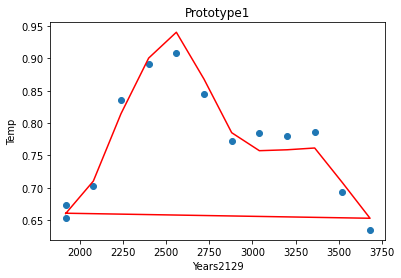

None


 [-1.57227327e-78  2.85472993e-74 -1.60979981e-70  4.78298904e-68
  1.82025467e-63  1.14336434e-60 -2.10754344e-56 -5.85227914e-53
  1.40816543e-49  1.13957691e-45  1.03931535e-42 -1.29231678e-38
 -4.67696430e-35  6.86597059e-32  7.99359911e-28  5.15375545e-25
 -1.04624893e-20 -1.68767620e-17  1.43024519e-13  1.39760100e-10
 -2.27004484e-06  6.38297409e-03 -8.79337402e+00  6.25710897e+03
 -1.84921209e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.559 		 22.288352266024333
1901 2 		 24.303 		 24.193960148311685
1901 3 		 28.448 		 27.884752815573943
1901 4 		 31.495 		 30.84738733995473
1901 5 		 30.856 		 32.72646400702512
1901 6 		 28.545 		 30.739261942745653
1901 7 		 26.129 		 27.64648479516944
1901 8 		 25.588 		 26.39385974121606
1901 9 		 27.137 		 26.296531027001794
1901 10 		 26.538 		 26.557998343782035
1901 11 		 23.535 		 25.12392419063067
1901 12 		 22.134 		 23.080964958579745
1902 1 		 23.406 		 22.33968650747789
1902 2 		 25.037 		 24.21830287644220

1923 3 		 27.996 		 28.366654060558883
1923 4 		 31.733 		 31.353587043679784
1923 5 		 32.263 		 32.6534135584957
1923 6 		 31.228 		 30.062341153485235
1923 7 		 26.181 		 27.229231551916804
1923 8 		 26.11 		 26.30448566690972
1923 9 		 25.845 		 26.374872314897832
1923 10 		 25.207 		 26.432552741741297
1923 11 		 23.264 		 24.521028812029865
1923 12 		 22.276 		 22.623919487716165
1924 1 		 23.351 		 23.007342761812264
1924 2 		 25.992 		 24.790050855613778
1924 3 		 29.446 		 28.38813824166311
1924 4 		 32.882 		 31.375778628931847
1924 5 		 33.128 		 32.64631505235424
1924 6 		 29.851 		 30.031302356449423
1924 7 		 27.376 		 27.212575387941207
1924 8 		 26.835 		 26.30141955857491
1924 9 		 25.996 		 26.378983672728296
1924 10 		 25.0 		 26.42334302578261
1924 11 		 22.028999999999996 		 24.494213340727146
1924 12 		 21.204 		 22.603184456018266
1925 1 		 21.722 		 23.021894446989055
1925 2 		 24.18 		 24.817245917522815
1925 3 		 28.616 		 28.40959925253084
1925 4 		 32.439 		

1948 6 		 29.243 		 29.296771945481655
1948 7 		 26.907 		 26.86907507854467
1948 8 		 26.115 		 26.251591641379054
1948 9 		 25.799 		 26.48114137489116
1948 10 		 26.578 		 26.10445300249895
1948 11 		 25.099 		 23.893313061875755
1948 12 		 20.267 		 22.1944358545444
1949 1 		 22.417 		 23.162024477656466
1949 2 		 24.128 		 25.481214091531466
1949 3 		 28.932999999999996 		 28.92097530358797
1949 4 		 31.51 		 31.894223737924825
1949 5 		 31.608 		 32.36639639604045
1949 6 		 28.09 		 29.266963371505494
1949 7 		 26.489 		 26.85697736735409
1949 8 		 26.473 		 26.250480764453766
1949 9 		 25.766 		 26.485213252709713
1949 10 		 26.298 		 26.087150531311984
1949 11 		 22.41 		 23.87034281429043
1949 12 		 21.81 		 22.184976702576037
1950 1 		 22.35 		 23.162604380782227
1950 2 		 24.33 		 25.50895365399821
1950 3 		 27.596 		 28.942265320699196
1950 4 		 31.518 		 31.913200808830094
1950 5 		 32.299 		 32.35127270374028
1950 6 		 28.818000000000005 		 29.237245277950073
1950 7 		 26

1973 9 		 26.315 		 26.56090459042927
1973 10 		 25.742 		 25.5882735931403
1973 11 		 23.063 		 23.363248467606958
1973 12 		 22.608 		 22.349773391635622
1974 1 		 22.859 		 23.161418750719633
1974 2 		 26.306 		 26.162349598587955
1974 3 		 30.2 		 29.457400645546148
1974 4 		 32.723 		 32.31514085572539
1974 5 		 30.848 		 31.90777476660302
1974 6 		 28.574 		 28.558058465448674
1974 7 		 27.766 		 26.604618154042868
1974 8 		 26.452 		 26.24741957494011
1974 9 		 26.839 		 26.56269801851129
1974 10 		 25.852 		 25.56452073522052
1974 11 		 23.109 		 23.343458237899
1974 12 		 21.227 		 22.375610276413617
1975 1 		 21.983 		 23.16236976595735
1975 2 		 25.711999999999996 		 26.18883408500394
1975 3 		 29.003 		 29.47910099589592
1975 4 		 32.925 		 32.329395275828894
1975 5 		 33.37 		 31.886215961804147
1975 6 		 28.675 		 28.531426802725996
1975 7 		 26.693 		 26.59635505227139
1975 8 		 26.316 		 26.248284381364936
1975 9 		 25.956 		 26.56434439972928
1975 10 		 26.538 		 25.54

1995 8 		 27.887 		 26.281070913223083
1995 9 		 27.339 		 26.56046500314912
1995 10 		 26.578 		 25.03296030154964
1995 11 		 25.212 		 22.93162695942959
1995 12 		 23.864 		 23.009466009797062
1996 1 		 24.969 		 23.234910469283815
1996 2 		 26.72 		 26.726507318945135
1996 3 		 30.726 		 29.93982095560571
1996 4 		 31.591 		 32.57490606622165
1996 5 		 33.884 		 31.38678384405514
1996 6 		 30.314 		 28.009303256885612
1996 7 		 27.685 		 26.450171700236854
1996 8 		 26.36 		 26.283457318139728
1996 9 		 26.892999999999997 		 26.55812247929489
1996 10 		 26.093 		 25.006696255987045
1996 11 		 24.329 		 22.911804110170806
1996 12 		 22.811 		 23.02081929623848
1997 1 		 22.441000000000003 		 23.24130771980388
1997 2 		 24.978 		 26.7511724887467
1997 3 		 29.515 		 29.961980374356266
1997 4 		 30.158999999999995 		 32.583875083550346
1997 5 		 32.526 		 31.36104650068423
1997 6 		 29.945 		 27.986312169031706
1997 7 		 27.547 		 26.444404382431415
1997 8 		 26.67 		 26.28591245710989

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


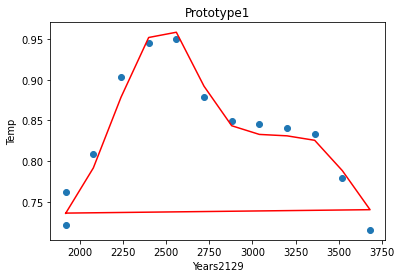

None


 [-9.07758879e-79  1.62973670e-74 -9.03535290e-71  2.00788052e-68
  1.01682851e-63  7.46346843e-61 -1.14969863e-56 -3.35760469e-53
  7.16170899e-50  6.27589424e-46  6.59915240e-43 -6.82623921e-39
 -2.61196244e-35  3.23742957e-32  4.30184695e-28  3.39345931e-25
 -5.49348189e-21 -9.68083517e-18  7.44101328e-14  8.22464040e-11
 -1.19181583e-06  3.27803417e-03 -4.44529206e+00  3.12010472e+03
 -9.10463758e+05] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 22.946 		 21.45475757047534
1901 2 		 24.01 		 22.97857044026256
1901 3 		 25.443 		 25.52200296923518
1901 4 		 28.096 		 27.77622030183673
1901 5 		 27.044 		 28.378959120959045
1901 6 		 25.463 		 26.624763713330033
1901 7 		 24.507 		 24.978310971707106
1901 8 		 24.438 		 24.543362429589035
1901 9 		 25.181 		 24.463545382469892
1901 10 		 24.353 		 24.400887756794692
1901 11 		 22.871 		 23.49740427777171
1901 12 		 20.745 		 22.156008301228287
1902 1 		 21.392 		 21.469505155533554
1902 2 		 22.703 		 22.99526896283030

1922 3 		 26.585 		 25.89798642322421
1922 4 		 28.398 		 28.05052532359958
1922 5 		 27.483 		 28.19595997616649
1922 6 		 25.562 		 26.22621422812343
1922 7 		 24.487 		 24.818804371804
1922 8 		 24.746 		 24.515309124439955
1922 9 		 24.496 		 24.466484606713056
1922 10 		 23.703 		 24.29124125763774
1922 11 		 22.505 		 23.173885784596205
1922 12 		 20.334 		 21.753324215859177
1923 1 		 20.543 		 21.683503821343184
1923 2 		 22.715 		 23.35671674653888
1923 3 		 25.001 		 25.915785290449858
1923 4 		 27.626 		 28.062227850407364
1923 5 		 27.517 		 28.18526402398944
1923 6 		 26.544 		 26.20784127995372
1923 7 		 24.164 		 24.812472975701095
1923 8 		 24.701 		 24.514131131619216
1923 9 		 23.987 		 24.466733398884536
1923 10 		 23.891 		 24.284408438652754
1923 11 		 22.91 		 23.158518960922958
1923 12 		 21.593 		 21.73390054985881
1924 1 		 21.671 		 21.690484095066786
1924 2 		 23.93 		 23.374315351694822
1924 3 		 25.971 		 25.93357428714633
1924 4 		 28.912 		 28.07379671379

1942 11 		 22.283 		 22.870241930931808
1942 12 		 21.927 		 21.406578338593246
1943 1 		 22.134 		 21.799537978619338
1943 2 		 22.715 		 23.712009734362365
1943 3 		 26.412 		 26.269582536667585
1943 4 		 27.529 		 28.2666148416698
1943 5 		 26.58 		 27.937753321379425
1943 6 		 24.65 		 25.857180641144517
1943 7 		 23.886 		 24.706663809269667
1943 8 		 24.492 		 24.492995148152115
1943 9 		 23.431 		 24.470989296883346
1943 10 		 22.94 		 24.115658088177444
1943 11 		 22.538 		 22.855242181271315
1943 12 		 20.741 		 21.393488481491804
1944 1 		 22.003 		 21.804674026221036
1944 2 		 23.338 		 23.729882740229367
1944 3 		 25.003 		 26.287149446457626
1944 4 		 27.367 		 28.275262001007796
1944 5 		 28.083 		 27.923827293366195
1944 6 		 25.607 		 25.84060221001506
1944 7 		 23.986 		 24.702320118397477
1944 8 		 24.834 		 24.49205887362361
1944 9 		 24.285 		 24.47106699988246
1944 10 		 24.135 		 24.105641036480666
1944 11 		 22.713 		 22.840254440754652
1944 12 		 21.164 		 21.38

1960 8 		 25.209 		 24.478820519894363
1960 9 		 24.092 		 24.467974453419448
1960 10 		 24.237 		 23.926687136143446
1960 11 		 22.076 		 22.5997077254951
1960 12 		 21.539 		 21.29806426331401
1961 1 		 22.019 		 21.895585411041974
1961 2 		 24.469 		 24.033620391339063
1961 3 		 27.619 		 26.58339654490352
1961 4 		 28.872 		 28.397376130074264
1961 5 		 27.501 		 27.66806353971362
1961 6 		 25.149 		 25.57505859896541
1961 7 		 23.804 		 24.639826124161484
1961 8 		 24.354 		 24.478110664337873
1961 9 		 24.159 		 24.46742192313075
1961 10 		 23.973 		 23.91442464873195
1961 11 		 22.339 		 22.584474537819624
1961 12 		 21.413 		 21.301829486340285
1962 1 		 21.514 		 21.90141941472888
1962 2 		 23.579 		 24.05144327685237
1962 3 		 26.257 		 26.600657687634232
1962 4 		 27.544 		 28.403045487850907
1962 5 		 27.132 		 27.652012578696013
1962 6 		 25.965 		 25.560448790043594
1962 7 		 24.819 		 24.63674695774913
1962 8 		 24.298 		 24.477416546791794
1962 9 		 24.131 		 24.4668154

1983 12 		 21.648 		 21.67807119175792
1984 1 		 22.685 		 22.05412439748645
1984 2 		 23.272 		 24.440749367922546
1984 3 		 25.782 		 26.973811151236298
1984 4 		 27.956 		 28.482902099341157
1984 5 		 29.083 		 27.27764709636569
1984 6 		 25.578 		 25.26952914521098
1984 7 		 24.167 		 24.581834900826216
1984 8 		 24.838 		 24.466280780285597
1984 9 		 24.72 		 24.43617215678096
1984 10 		 24.171 		 23.605950761288405
1984 11 		 22.923 		 22.21501898571849
1984 12 		 22.288 		 21.704191956967115
1985 1 		 22.693 		 22.06233810350299
1985 2 		 24.861 		 24.458291875571014
1985 3 		 27.376 		 26.99040893957019
1985 4 		 29.084 		 28.48444894835353
1985 5 		 28.677 		 27.259860868901015
1985 6 		 25.077 		 25.25772146984935
1985 7 		 24.405 		 24.579824383705855
1985 8 		 24.694 		 24.46597583577037
1985 9 		 25.2 		 24.433818145245315
1985 10 		 24.035 		 23.59166410252452
1985 11 		 22.433 		 22.197840700596572
1985 12 		 22.342 		 21.730226848572492
1986 1 		 21.576 		 22.0706716541

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


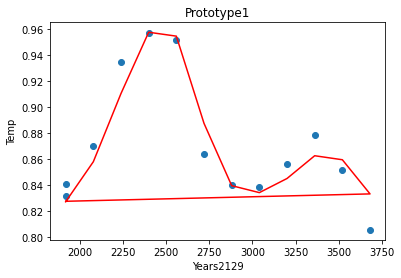

None


 [-9.65441576e-79  1.73496823e-74 -9.63709026e-71  2.24226002e-68
  1.08483061e-63  7.78409898e-61 -1.23088332e-56 -3.56449197e-53
  7.76559484e-50  6.70703353e-46  6.87630427e-43 -7.35426234e-39
 -2.78302897e-35  3.57803431e-32  4.61825625e-28  3.49661565e-25
 -5.93139898e-21 -1.02459211e-17  8.05503991e-14  8.64905985e-11
 -1.28778779e-06  3.56297415e-03 -4.85363562e+00  3.42098683e+03
 -1.00235501e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 24.813 		 24.04245340548351
1901 2 		 25.554 		 25.091989176609438
1901 3 		 26.842 		 26.619907848706355
1901 4 		 28.687 		 28.04521313082136
1901 5 		 27.842 		 28.30130114362843
1901 6 		 25.461 		 26.510435395543347
1901 7 		 24.839 		 24.877206106954137
1901 8 		 24.815 		 24.563456832629512
1901 9 		 25.565 		 24.80734674098238
1901 10 		 25.583 		 25.33928343563236
1901 11 		 25.173 		 25.397102122501355
1901 12 		 23.935 		 24.827117894063587
1902 1 		 24.426 		 24.067000370573137
1902 2 		 25.232 		 25.1015025969845

1925 8 		 24.807 		 24.58992860807001
1925 9 		 25.516 		 24.92982064543746
1925 10 		 25.922 		 25.43212091987289
1925 11 		 25.16 		 25.304855642012207
1925 12 		 24.0 		 24.480363472652506
1926 1 		 24.612 		 24.435912794431555
1926 2 		 25.613 		 25.344260996901316
1926 3 		 27.389 		 26.890036687889953
1926 4 		 27.983 		 28.256395205343026
1926 5 		 28.126 		 28.053951500302997
1926 6 		 26.349 		 26.03953384897008
1926 7 		 25.517 		 24.70649379237823
1926 8 		 25.228 		 24.591465920419317
1926 9 		 25.229 		 24.93541643604159
1926 10 		 25.493 		 25.43478502009332
1926 11 		 24.855 		 25.30040722313791
1926 12 		 24.088 		 24.46611395339377
1927 1 		 24.487 		 24.444452762960342
1927 2 		 25.616 		 25.354827460043015
1927 3 		 27.364 		 26.900852627399264
1927 4 		 28.575 		 28.26364165674511
1927 5 		 27.605 		 28.041993376196245
1927 6 		 25.255 		 26.02148504340544
1927 7 		 24.241 		 24.70128163001023
1927 8 		 24.888 		 24.59303770387068
1927 9 		 25.239 		 24.941045105929

1951 2 		 25.273 		 25.613368327789825
1951 3 		 27.009 		 27.16115421097528
1951 4 		 27.69 		 28.403620678443346
1951 5 		 27.872 		 27.713772661170808
1951 6 		 24.785 		 25.614982815886734
1951 7 		 24.322 		 24.60828386612318
1951 8 		 24.926 		 24.640550903481316
1951 9 		 25.774 		 25.083613686834347
1951 10 		 25.953 		 25.467174847029966
1951 11 		 26.093 		 25.166816443159128
1951 12 		 23.669 		 24.256089487641002
1952 1 		 24.815 		 24.568214201500524
1952 2 		 25.925 		 25.624241462981214
1952 3 		 26.796 		 27.172024327200724
1952 4 		 28.608 		 28.407915541731636
1952 5 		 28.263 		 27.69854702788673
1952 6 		 25.335 		 25.599305764858496
1952 7 		 24.87 		 24.60562234574638
1952 8 		 24.569 		 24.642948346673396
1952 9 		 24.932 		 25.089735655757483
1952 10 		 25.007 		 25.467117980689626
1952 11 		 23.803 		 25.16027461840853
1952 12 		 24.782 		 24.257522618220072
1953 1 		 24.361 		 24.57094120599318
1953 2 		 25.261 		 25.63511487262405
1953 3 		 28.153 		 27.18289

1976 7 		 24.513 		 24.565248781033677
1976 8 		 24.89 		 24.711399557147992
1976 9 		 25.094 		 25.233896713753115
1976 10 		 26.646 		 25.438385987781803
1976 11 		 26.178 		 24.95875101185299
1976 12 		 25.612 		 24.624572559651803
1977 1 		 24.625 		 24.62608937047783
1977 2 		 26.383 		 25.89477616096835
1977 3 		 28.088 		 27.44321265876002
1977 4 		 28.578 		 28.46998948854476
1977 5 		 27.69 		 27.28711038286693
1977 6 		 25.654 		 25.24571179376438
1977 7 		 24.384 		 24.564426744052092
1977 8 		 24.899 		 24.714732660221753
1977 9 		 25.218 		 25.23960947556503
1977 10 		 25.712 		 25.436181099726703
1977 11 		 26.166 		 24.94818781468354
1977 12 		 24.407 		 24.650978686305578
1978 1 		 25.007 		 24.628538383097272
1978 2 		 25.735 		 25.90549170613743
1978 3 		 27.396 		 27.45399116309162
1978 4 		 28.129 		 28.470568526212944
1978 5 		 27.274 		 27.269645006193663
1978 6 		 24.531 		 25.233180340579594
1978 7 		 24.019 		 24.563665305950565
1978 8 		 24.383 		 24.718104845

2000 11 		 26.121 		 24.657485326380353
2000 12 		 24.454 		 24.782146608888056
2001 1 		 25.419 		 24.703005816351506
2001 2 		 26.839 		 26.14858145128924
2001 3 		 27.532 		 27.697890375348624
2001 4 		 28.727 		 28.44095768487349
2001 5 		 28.017 		 26.855536301861402
2001 6 		 25.92 		 24.98061370454065
2001 7 		 25.085 		 24.56061077109806
2001 8 		 24.728 		 24.807117354460875
2001 9 		 25.781 		 25.361554292515738
2001 10 		 25.651 		 25.365597017257357
2001 11 		 26.227 		 24.64329130120471
2001 12 		 24.998 		 24.725803702353385
2002 1 		 25.218 		 24.70720786015957
2002 2 		 26.218 		 26.158998832403565
2002 3 		 28.504 		 27.70824877684645
2002 4 		 29.122 		 28.43777377360768
2002 5 		 28.465 		 26.83719526039332
2002 6 		 25.844 		 24.97118267449073
2002 7 		 25.225 		 24.56102771774016
2002 8 		 25.04 		 24.811488981819597
2002 9 		 26.086 		 25.365835296005827
2002 10 		 26.413 		 25.362033539636876
2002 11 		 26.149 		 24.62905402248062
2002 12 		 25.23 		 24.659033781

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


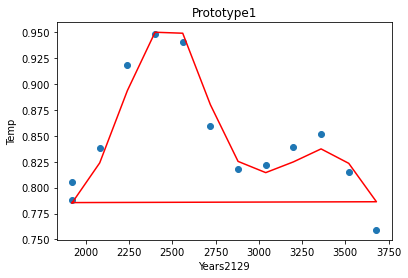

None


 [-9.39795685e-79  1.68683200e-74 -9.35469905e-71  2.12154216e-68
  1.05236873e-63  7.62798886e-61 -1.19188306e-56 -3.46213801e-53
  7.48805420e-50  6.49743663e-46  6.70529762e-43 -7.11018576e-39
 -2.69711129e-35  3.44500876e-32  4.46933530e-28  3.40248614e-25
 -5.73707571e-21 -9.92978494e-18  7.79196002e-14  8.38187824e-11
 -1.24624154e-06  3.44789654e-03 -4.69744905e+00  3.31160451e+03
 -9.70575075e+05] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.394 		 22.57241573322215
1901 2 		 24.052 		 23.75475552509376
1901 3 		 25.913 		 25.76798810216249
1901 4 		 28.018 		 27.485640560964356
1901 5 		 26.891 		 27.818421912726247
1901 6 		 24.746 		 26.013095022753113
1901 7 		 23.783 		 24.219667050943013
1901 8 		 23.78 		 23.72532039659866
1901 9 		 24.806 		 23.938242867812747
1901 10 		 24.556 		 24.369069782525536
1901 11 		 23.792 		 24.128674235295737
1901 12 		 22.122 		 23.25319134381437
1902 1 		 22.908 		 22.594936981884995
1902 2 		 23.894 		 23.76717556257196

1917 10 		 23.408 		 24.393459013030167
1917 11 		 23.124 		 24.012217879127945
1917 12 		 21.889 		 22.96571630501398
1918 1 		 22.186 		 22.85476567236171
1918 2 		 23.156 		 23.974989919478308
1918 3 		 25.4 		 26.004937603436645
1918 4 		 27.124 		 27.653445023291045
1918 5 		 25.776 		 27.66514917968982
1918 6 		 24.53 		 25.674835840355836
1918 7 		 24.695 		 24.060030128598445
1918 8 		 24.227 		 23.72707536886283
1918 9 		 24.398 		 24.01971373793506
1918 10 		 25.371 		 24.393985884573542
1918 11 		 24.788 		 24.00458792828419
1918 12 		 22.716 		 22.94717980390438
1919 1 		 23.668 		 22.865888853712242
1919 2 		 24.729 		 23.98846283178241
1919 3 		 26.211 		 26.018736819025364
1919 4 		 28.209 		 27.662434127979214
1919 5 		 26.976 		 27.654610120833155
1919 6 		 24.661 		 25.655266054556005
1919 7 		 23.956 		 24.051806775722884
1919 8 		 23.867 		 23.727678701628232
1919 9 		 24.429 		 24.024755620219047
1919 10 		 24.672 		 24.394390982531245
1919 11 		 23.942 		 23.99691

1938 1 		 23.119 		 23.00540486167581
1938 2 		 24.418 		 24.251773139776894
1938 3 		 26.821 		 26.27817823802517
1938 4 		 28.045 		 27.811907677088165
1938 5 		 27.353 		 27.424718305096263
1938 6 		 23.882 		 25.29471709641465
1938 7 		 23.301 		 23.91860573752993
1938 8 		 23.421 		 23.748864700753476
1938 9 		 23.674 		 24.123277722716566
1938 10 		 23.237 		 24.378601333186264
1938 11 		 22.955 		 23.84207087613293
1938 12 		 22.558 		 22.617556561090286
1939 1 		 22.678 		 23.010013264725217
1939 2 		 23.778 		 24.265919334111967
1939 3 		 25.619 		 26.291689136741915
1939 4 		 27.288 		 27.81857507936866
1939 5 		 27.191 		 27.411147930510577
1939 6 		 24.877 		 25.2764513298946
1939 7 		 23.001 		 23.912751868542518
1939 8 		 23.551 		 23.7504725028018
1939 9 		 23.813 		 24.12851653741696
1939 10 		 24.417 		 24.376537531387292
1939 11 		 23.151 		 23.83331804693141
1939 12 		 21.983 		 22.605461958635832
1940 1 		 21.832 		 23.014439170195022
1940 2 		 23.887 		 24.28008522

1957 8 		 23.352 		 23.787472950972848
1957 9 		 24.068 		 24.22051930324384
1957 10 		 25.11 		 24.319699547473576
1957 11 		 23.942 		 23.659299360227074
1957 12 		 23.522 		 22.538014641002054
1958 1 		 23.14 		 23.074292189946632
1958 2 		 24.446 		 24.537177050827303
1958 3 		 26.421 		 26.54544719148078
1958 4 		 28.149 		 27.919916587678948
1958 5 		 27.444 		 27.12898995842063
1958 6 		 26.163 		 24.946479100480907
1958 7 		 23.676 		 23.821338706106182
1958 8 		 23.93 		 23.789967627223813
1958 9 		 23.516 		 24.22540077433386
1958 10 		 24.257 		 24.31551870863163
1958 11 		 24.43 		 23.64848251216137
1958 12 		 22.823 		 22.544684566665673
1959 1 		 23.622 		 23.077061345162104
1959 2 		 25.116 		 24.551513719888636
1959 3 		 26.751 		 26.558634445961797
1959 4 		 27.915 		 27.923852088561514
1959 5 		 27.953 		 27.112974886849756
1959 6 		 24.676 		 24.93009447538131
1959 7 		 23.053 		 23.817505334407326
1959 8 		 23.728 		 23.79250815850147
1959 9 		 24.206 		 24.23024436

1977 4 		 27.668 		 27.96907453295053
1977 5 		 27.02 		 26.80858287050971
1977 6 		 25.212 		 24.654044392846757
1977 7 		 23.398 		 23.76325525625446
1977 8 		 24.078 		 23.84586664128327
1977 9 		 24.107 		 24.309391446005787
1977 10 		 24.521 		 24.219196779154473
1977 11 		 24.932 		 23.411394713212037
1977 12 		 22.292 		 22.89312687523314
1978 1 		 23.552 		 23.133873471182074
1978 2 		 24.271 		 24.823065478570992
1978 3 		 26.566 		 26.805218549607556
1978 4 		 27.798 		 27.970122415276478
1978 5 		 26.824 		 26.79089552852162
1978 6 		 23.939 		 24.63980106182792
1978 7 		 23.297 		 23.761004669837888
1978 8 		 23.443 		 23.84924401323148
1978 9 		 23.845 		 24.31323198085674
1978 10 		 24.457 		 24.21335908152559
1978 11 		 24.605 		 23.397079153742876
1978 12 		 22.931 		 22.91959428810724
1979 1 		 23.931 		 23.137396982286358
1979 2 		 24.414 		 24.83727079604403
1979 3 		 26.381 		 26.81795816134871
1979 4 		 27.905 		 27.97101306098723
1979 5 		 27.46 		 26.773138454333

1995 9 		 24.576 		 24.366598440785193
1995 10 		 24.879 		 24.10543756681704
1995 11 		 25.097 		 23.126290949087824
1995 12 		 23.513 		 23.17136171915778
1996 1 		 24.29 		 23.211123833794378
1996 2 		 25.212 		 25.076609344208848
1996 3 		 27.74 		 27.02987198477448
1996 4 		 28.098 		 27.961630986860254
1996 5 		 28.446 		 26.46257635925361
1996 6 		 25.598 		 24.40407995973923
1996 7 		 24.24 		 23.73251117024594
1996 8 		 23.795 		 23.91701600616076
1996 9 		 24.314 		 24.36895424956479
1996 10 		 23.953 		 24.098656503763284
1996 11 		 24.298 		 23.109010061715033
1996 12 		 22.581 		 23.153934258498484
1997 1 		 22.928 		 23.21637534680986
1997 2 		 24.162 		 25.090545609347757
1997 3 		 26.954 		 27.042027365489165
1997 4 		 27.058 		 27.959620311772685
1997 5 		 28.04 		 26.443907502629095
1997 6 		 26.215 		 24.392146908071126
1997 7 		 24.376 		 23.731549517076697
1997 8 		 24.013 		 23.921146268807586
1997 9 		 24.973 		 24.37121422405192
1997 10 		 25.488 		 24.091837020

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


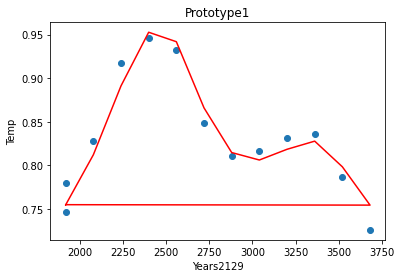

None


 [-8.95941729e-79  1.59562430e-74 -8.74118873e-71  1.49750150e-68
  9.80004191e-64  7.88343454e-61 -1.08996216e-56 -3.28879081e-53
  6.46029231e-50  5.98593532e-46  6.82609076e-43 -6.33474651e-39
 -2.51176252e-35  2.76945626e-32  4.04288510e-28  3.54856853e-25
 -5.08544688e-21 -9.43749154e-18  6.85335147e-14  8.11836178e-11
 -1.10452373e-06  2.99872209e-03 -4.02922023e+00  2.80567936e+03
 -8.12731087e+05] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 22.729 		 21.60628888401063
1901 2 		 23.788 		 23.110866570292504
1901 3 		 25.391 		 25.392576354466843
1901 4 		 27.646 		 27.29015334927337
1901 5 		 25.986 		 27.385675888894593
1901 6 		 24.102 		 25.344791386217345
1901 7 		 23.22 		 23.63893591674464
1901 8 		 23.297 		 23.231038118027616
1901 9 		 24.478 		 23.490846856091636
1901 10 		 23.985 		 23.89380769934552
1901 11 		 22.746 		 23.251419044010806
1901 12 		 20.736 		 22.11212887995364
1902 1 		 21.589 		 21.616231809087562
1902 2 		 22.981 		 23.12649669104302

1921 9 		 23.17 		 23.60038606229471
1921 10 		 23.604 		 23.86118103136914
1921 11 		 21.726 		 23.00314716251241
1921 12 		 20.804 		 21.727594814923126
1922 1 		 22.025 		 21.76803200499015
1922 2 		 23.199 		 23.444257175336126
1922 3 		 26.423 		 25.724516803026663
1922 4 		 27.794 		 27.483657802824396
1922 5 		 26.307 		 27.126988509936723
1922 6 		 24.163 		 24.926522076491732
1922 7 		 23.018 		 23.473726244517135
1922 8 		 23.339 		 23.24242523805471
1922 9 		 23.741 		 23.60603979818942
1922 10 		 23.45 		 23.857668936152475
1922 11 		 22.395 		 22.99081999993371
1922 12 		 20.243 		 21.7077936615129
1923 1 		 20.764 		 21.7740963885081
1923 2 		 22.715 		 23.46031776178116
1923 3 		 24.924 		 25.740176543469076
1923 4 		 26.877 		 27.49138446063781
1923 5 		 26.281 		 27.11293653066689
1923 6 		 25.002 		 24.907383593196514
1923 7 		 22.61 		 23.46717403568374
1923 8 		 23.267 		 23.24356389097916
1923 9 		 23.308 		 23.611697723269927
1923 10 		 23.626 		 23.85397616887139

1946 5 		 26.363 		 26.75286185938539
1946 6 		 23.977 		 24.492944756808225
1946 7 		 22.957 		 23.34570821751328
1946 8 		 22.938 		 23.28430963069247
1946 9 		 23.576 		 23.73869600577699
1946 10 		 24.047 		 23.720328950305003
1946 11 		 22.562 		 22.697959498949814
1946 12 		 21.412 		 21.32094147292571
1947 1 		 22.245 		 21.911265020544175
1947 2 		 23.016 		 23.846660078119953
1947 3 		 25.979 		 26.110882428424897
1947 4 		 26.527 		 27.631479534345214
1947 5 		 27.324 		 26.735782065518666
1947 6 		 24.487 		 24.476165939828846
1947 7 		 22.91 		 23.34160303026112
1947 8 		 23.464 		 23.286713202897925
1947 9 		 23.156 		 23.743871368878054
1947 10 		 23.069 		 23.712518965289462
1947 11 		 22.027 		 22.685672294758724
1947 12 		 21.413 		 21.312266045090276
1948 1 		 22.313 		 21.917214577405247
1948 2 		 24.036 		 23.86272120164009
1948 3 		 25.774 		 26.12607426903816
1948 4 		 27.425 		 27.635332054615485
1948 5 		 26.402 		 26.7185994486236
1948 6 		 24.418 		 24.4594981

1967 5 		 27.329 		 26.375178187285083
1967 6 		 24.79 		 24.16505476754764
1967 7 		 22.568 		 23.277235975642224
1967 8 		 22.728 		 23.345762462098616
1967 9 		 23.277 		 23.834253482133615
1967 10 		 22.973 		 23.52769595481502
1967 11 		 22.619 		 22.42692272250401
1967 12 		 22.251 		 21.378448735800106
1968 1 		 21.81 		 22.05121121703321
1968 2 		 24.268 		 24.181813900724517
1968 3 		 25.915 		 26.424021274047437
1968 4 		 27.228 		 27.676845999701413
1968 5 		 27.355 		 26.356352684505747
1968 6 		 24.716 		 24.150769697683398
1968 7 		 23.131 		 23.27483718340518
1968 8 		 23.597 		 23.34925672642188
1968 9 		 23.905 		 23.837933842979837
1968 10 		 23.5 		 23.51723969335528
1968 11 		 22.816 		 22.412973593116273
1968 12 		 21.862 		 21.395309080780017
1969 1 		 21.951 		 22.058814857794438
1969 2 		 24.682 		 24.197639355689752
1969 3 		 27.363 		 26.43857421011897
1969 4 		 28.413 		 27.67710699134739
1969 5 		 27.125 		 26.337466465386097
1969 6 		 24.996 		 24.136608584

1985 7 		 23.195 		 23.24449356798129
1985 8 		 23.43 		 23.41612644360261
1985 9 		 24.562 		 23.88385870531993
1985 10 		 23.607 		 23.327884789459873
1985 11 		 22.63 		 22.152840515397955
1985 12 		 22.707 		 21.813872009464074
1986 1 		 21.75 		 22.20327825870039
1986 2 		 23.903 		 24.46446242885897
1986 3 		 26.993 		 26.679506074170117
1986 4 		 28.784 		 27.65452966987947
1986 5 		 27.44 		 26.00909337707097
1986 6 		 24.344 		 23.915086695461067
1986 7 		 23.837 		 23.2432841017046
1986 8 		 23.25 		 23.420478524279314
1986 9 		 24.338 		 23.885460800350177
1986 10 		 24.623 		 23.316247607265133
1986 11 		 23.23 		 22.136058637090493
1986 12 		 22.578 		 21.838699541341978
1987 1 		 22.291 		 22.212686122706625
1987 2 		 23.51 		 24.48002444848651
1987 3 		 25.9 		 26.693249852892478
1987 4 		 28.14 		 27.6516066654888
1987 5 		 27.285 		 25.989464705329855
1987 6 		 24.737 		 23.90319150238717
1987 7 		 24.46 		 23.242134760985618
1987 8 		 23.847 		 23.424873356134164
1987

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


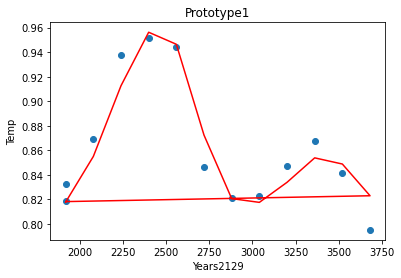

None


 [-9.72655527e-79  1.74997468e-74 -9.73730655e-71  2.33834656e-68
  1.09667499e-63  7.75470396e-61 -1.24728336e-56 -3.59431067e-53
  7.92440383e-50  6.79014705e-46  6.87029061e-43 -7.47563600e-39
 -2.81383413e-35  3.67819322e-32  4.68586510e-28  3.48379312e-25
 -6.03223310e-21 -1.03346208e-17  8.19880106e-14  8.70435079e-11
 -1.30960104e-06  3.63071945e-03 -4.95305349e+00  3.49538205e+03
 -1.02531352e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.91 		 22.95593528730038
1901 2 		 24.798 		 24.137516038372997
1901 3 		 25.968 		 25.79369727179117
1901 4 		 27.543 		 27.10233095082629
1901 5 		 26.507 		 27.164539534143987
1901 6 		 24.127 		 25.228849626818555
1901 7 		 23.488 		 23.514204047594102
1901 8 		 23.565 		 23.243885003106552
1901 9 		 24.5 		 23.63134088357154
1901 10 		 24.533 		 24.24359867359686
1901 11 		 24.026 		 24.259889379089582
1901 12 		 22.707 		 23.694441999263944
1902 1 		 23.228 		 22.98064570559829
1902 2 		 24.194 		 24.148442078863155
1

1933 3 		 25.773 		 26.13185012972157
1933 4 		 27.134 		 27.311698236802474
1933 5 		 25.536 		 26.785967274272696
1933 6 		 23.221 		 24.601687840737284
1933 7 		 22.909 		 23.306748686723296
1933 8 		 22.987 		 23.32538134792994
1933 9 		 23.425 		 23.841064344189945
1933 10 		 23.761 		 24.349932960292207
1933 11 		 24.154 		 24.11336269674066
1933 12 		 22.78 		 23.269279040081308
1934 1 		 23.089 		 23.41690767254855
1934 2 		 23.82 		 24.52037560525525
1934 3 		 25.477 		 26.142195111580076
1934 4 		 27.019 		 27.316593476042033
1934 5 		 26.672 		 26.771679752694325
1934 6 		 24.058 		 24.58330884718511
1934 7 		 23.277 		 23.30245798403572
1934 8 		 23.204 		 23.32862310488883
1934 9 		 24.499 		 23.848001180935533
1934 10 		 24.734 		 24.351360099503655
1934 11 		 22.97 		 24.108185404112447
1934 12 		 22.474 		 23.25777899759996
1935 1 		 23.337 		 23.42320646696433
1935 2 		 24.46 		 24.532414684870165
1935 3 		 26.244 		 26.15252828815661
1935 4 		 26.886 		 27.32137607432

1955 11 		 23.128 		 23.98535157781269
1955 12 		 22.382 		 23.155658639466274
1956 1 		 22.917 		 23.512997786534832
1956 2 		 24.139 		 24.785802302134105
1956 3 		 26.796 		 26.366890985832434
1956 4 		 27.938 		 27.393883320346358
1956 5 		 25.43 		 26.42604279698047
1956 6 		 23.343 		 24.205215643003466
1956 7 		 22.041 		 23.236793769189973
1956 8 		 22.857 		 23.409475067017482
1956 9 		 23.28 		 24.00133566431876
1956 10 		 23.665 		 24.35334137069236
1956 11 		 23.87 		 23.978587549172225
1956 12 		 22.861 		 23.160203275095554
1957 1 		 23.147 		 23.516086313586566
1957 2 		 24.621 		 24.797812094038235
1957 3 		 25.429 		 26.37696924790449
1957 4 		 27.199 		 27.395922795554505
1957 5 		 26.925 		 26.4090599040332
1957 6 		 23.965 		 24.18934021814901
1957 7 		 23.206 		 23.235009712532047
1957 8 		 23.157 		 23.413578795261564
1957 9 		 23.927 		 24.008207240404445
1957 10 		 24.834 		 24.352161213897052
1957 11 		 24.17 		 23.97171448747802
1957 12 		 24.087 		 23.1658268

1977 4 		 27.64 		 27.407240108188123
1977 5 		 26.324 		 26.05158959895547
1977 6 		 24.287 		 23.898703673222915
1977 7 		 23.131 		 23.21777707818139
1977 8 		 23.625 		 23.503498222038033
1977 9 		 24.296 		 24.139026212489117
1977 10 		 24.545 		 24.309216834578546
1977 11 		 24.766 		 23.80600536265585
1977 12 		 23.399 		 23.50316910669382
1978 1 		 23.847 		 23.579690281233635
1978 2 		 24.851 		 25.046354743993724
1978 3 		 26.511 		 26.585260794141213
1978 4 		 27.16 		 27.406279025591793
1978 5 		 26.076 		 26.03297423447657
1978 6 		 23.207 		 23.885566649326936
1978 7 		 22.673 		 23.2177524064685
1978 8 		 23.101 		 23.50838735967118
1978 9 		 23.73 		 24.14510765707295
1978 10 		 24.653 		 24.30622853304434
1978 11 		 24.717 		 23.79608250584628
1978 12 		 23.76 		 23.528618376470984
1979 1 		 24.546 		 23.583067387740012
1979 2 		 25.292 		 25.057972069961835
1979 3 		 26.431 		 26.59499211356684
1979 4 		 27.262 		 27.40516879851173
1979 5 		 26.806 		 26.0143024168739

2002 10 		 25.356 		 24.218063238525648
2002 11 		 24.97 		 23.511067344380425
2002 12 		 24.169 		 23.606709706570836
rmse:  0.01955686310033042
Accuracy : 0.147747371193905
2019:august :  0.8541776969796047


District: hassan


/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


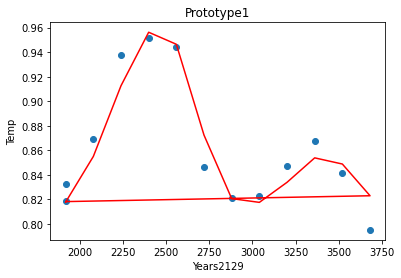

None


 [-9.72655527e-79  1.74997468e-74 -9.73730655e-71  2.33834656e-68
  1.09667499e-63  7.75470396e-61 -1.24728336e-56 -3.59431067e-53
  7.92440383e-50  6.79014705e-46  6.87029061e-43 -7.47563600e-39
 -2.81383413e-35  3.67819322e-32  4.68586510e-28  3.48379312e-25
 -6.03223310e-21 -1.03346208e-17  8.19880106e-14  8.70435079e-11
 -1.30960104e-06  3.63071945e-03 -4.95305349e+00  3.49538205e+03
 -1.02531352e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.91 		 22.95593528730038
1901 2 		 24.798 		 24.137516038372997
1901 3 		 25.968 		 25.79369727179117
1901 4 		 27.543 		 27.10233095082629
1901 5 		 26.507 		 27.164539534143987
1901 6 		 24.127 		 25.228849626818555
1901 7 		 23.488 		 23.514204047594102
1901 8 		 23.565 		 23.243885003106552
1901 9 		 24.5 		 23.63134088357154
1901 10 		 24.533 		 24.24359867359686
1901 11 		 24.026 		 24.259889379089582
1901 12 		 22.707 		 23.694441999263944
1902 1 		 23.228 		 22.98064570559829
1902 2 		 24.194 		 24.148442078863155
1

1920 12 		 22.647 		 23.440617931440357
1921 1 		 23.722 		 23.30481264700822
1921 2 		 24.255 		 24.36533805740706
1921 3 		 26.579 		 26.006762661828542
1921 4 		 26.794 		 27.244560722766327
1921 5 		 27.039 		 26.9464157532173
1921 6 		 24.252 		 24.828960264205815
1921 7 		 23.245 		 23.368107820313305
1921 8 		 23.29 		 23.289585186226176
1921 9 		 23.504 		 23.759168795134755
1921 10 		 24.398 		 24.323553009835887
1921 11 		 23.421 		 24.17250445350248
1921 12 		 22.659 		 23.42665798654023
1922 1 		 23.32 		 23.31583469494886
1922 2 		 24.248 		 24.377131852444144
1922 3 		 26.385 		 26.01725673511333
1922 4 		 27.385 		 27.2507222310378
1922 5 		 26.185 		 26.93384930910717
1922 6 		 23.872 		 24.80958527625713
1922 7 		 22.848 		 23.362276329362647
1922 8 		 23.221 		 23.292343855129438
1922 9 		 23.8 		 23.765875574789824
1922 10 		 24.291 		 24.32639821543533
1922 11 		 23.694 		 24.167767537684995
1922 12 		 22.18 		 23.41274658920418
1923 1 		 22.674 		 23.32639501045632

1945 6 		 24.256 		 24.387655372612063
1945 7 		 23.177 		 23.26302988090727
1945 8 		 23.272 		 23.36678446146834
1945 9 		 23.681 		 23.92482666646305
1945 10 		 24.435 		 24.359243958622102
1945 11 		 23.721 		 24.047780455650646
1945 12 		 23.043 		 23.163671428181114
1946 1 		 22.536 		 23.478003986074473
1946 2 		 24.27 		 24.66523747755855
1946 3 		 26.398 		 26.265444802150014
1946 4 		 27.019 		 27.36622935447085
1946 5 		 26.405 		 26.590162055401013
1946 6 		 23.762 		 24.370498610410724
1946 7 		 22.941 		 23.260122916439432
1946 8 		 22.825 		 23.370479700427385
1946 9 		 23.633 		 23.93182361729618
1946 10 		 24.666 		 24.359261414522187
1946 11 		 23.938 		 24.041912142831716
1946 12 		 23.308 		 23.158945336082834
1947 1 		 23.785 		 23.481963318476335
1947 2 		 24.086 		 24.6773194275907
1947 3 		 26.226 		 26.27564191290352
1947 4 		 26.265 		 27.369574944853667
1947 5 		 27.273 		 26.57424360095698
1947 6 		 24.254 		 24.353452791331218
1947 7 		 22.826 		 23.2573236

1971 4 		 27.235 		 27.40989000932488
1971 5 		 25.964 		 26.161990632854284
1971 6 		 22.858 		 23.98037086302589
1971 7 		 23.05 		 23.219491099009172
1971 8 		 23.143 		 23.474948805628227
1971 9 		 23.981 		 24.101454695548746
1971 10 		 23.644 		 24.325637159414473
1971 11 		 23.482 		 23.862023892795552
1971 12 		 22.808 		 23.36150933090772
1972 1 		 22.632 		 23.560525480361537
1972 2 		 24.122 		 24.976188392533803
1972 3 		 25.799 		 26.526475742596084
1972 4 		 27.359 		 27.40981636558834
1972 5 		 25.891 		 26.14375367408793
1972 6 		 25.114 		 23.96642248464923
1972 7 		 23.524 		 23.21901374115783
1972 8 		 23.737 		 23.47961260828364
1972 9 		 24.353 		 24.107839628729852
1972 10 		 24.765 		 24.323088385771843
1972 11 		 24.52 		 23.85309299801651
1972 12 		 23.827 		 23.38332140657294
1973 1 		 23.689 		 23.56360620796855
1973 2 		 25.242 		 24.987936054120656
1973 3 		 26.684 		 26.536318376545676
1973 4 		 28.485 		 27.409596124125528
1973 5 		 27.354 		 26.125449438

1990 2 		 24.997 		 25.184198071082935
1990 3 		 26.478 		 26.70058919356379
1990 4 		 27.712 		 27.3829468010104
1990 5 		 25.86 		 25.805778107616934
1990 6 		 24.173 		 23.738650790603714
1990 7 		 23.358 		 23.22278978660877
1990 8 		 23.165 		 23.569975011685745
1990 9 		 24.465 		 24.213211294162903
1990 10 		 24.827 		 24.265594646373646
1990 11 		 24.31 		 23.663898737050477
1990 12 		 23.875 		 23.795298741238074
1991 1 		 24.558 		 23.629060845898348
1991 2 		 25.359 		 25.1955259156198
1991 3 		 27.265 		 26.710043128656107
1991 4 		 27.27 		 27.380007365384955
1991 5 		 27.37 		 25.786589722709614
1991 6 		 24.506 		 23.727308275682734
1991 7 		 22.861 		 23.22362448636617
1991 8 		 22.934 		 23.57534771489154
1991 9 		 24.66 		 24.218433101989213
1991 10 		 24.52 		 24.26186369975272
1991 11 		 24.197 		 23.651839893536525
1991 12 		 22.942 		 23.806701264131696
1992 1 		 22.992 		 23.633414633890496
1992 2 		 24.816 		 25.206828266053343
1992 3 		 26.862 		 26.71946997792

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


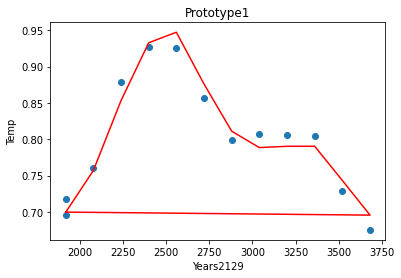

None


 [-1.11768407e-78  2.00867133e-74 -1.11552867e-70  2.57330831e-68
  1.25582205e-63  9.05750172e-61 -1.42383020e-56 -4.13171158e-53
  8.95421613e-50  7.76177229e-46  8.01124922e-43 -8.49256895e-39
 -3.22332152e-35  4.10335234e-32  5.33791479e-28  4.08848053e-25
 -6.84465306e-21 -1.18905107e-17  9.28809824e-14  1.00571936e-10
 -1.48563921e-06  4.10310334e-03 -5.58151578e+00  3.92865741e+03
 -1.14949680e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.948 		 22.836640302271118
1901 2 		 24.898 		 24.574162401908545
1901 3 		 28.245 		 27.76342101981165
1901 4 		 31.112 		 30.474911176620516
1901 5 		 29.626 		 31.434743110130075
1901 6 		 27.697 		 29.394639544535895
1901 7 		 25.957 		 27.045603070438375
1901 8 		 25.66 		 26.103914996946695
1901 9 		 26.816 		 26.03399990200298
1901 10 		 26.125 		 26.208084041692782
1901 11 		 23.787 		 24.946628399679902
1901 12 		 22.267 		 23.33762988477247
1902 1 		 23.365 		 22.856435924156102
1902 2 		 25.051 		 24.595456908519

1923 2 		 24.435 		 25.058716523365582
1923 3 		 27.809 		 28.231860070370605
1923 4 		 30.839 		 30.845121867593843
1923 5 		 30.581 		 31.244554169245532
1923 6 		 29.67 		 28.8507918456872
1923 7 		 25.76 		 26.74275037977146
1923 8 		 26.053 		 26.028018875971902
1923 9 		 25.595 		 26.104411447935274
1923 10 		 25.251 		 26.069141473949422
1923 11 		 23.662 		 24.479656809784938
1923 12 		 22.776 		 22.90544510084437
1924 1 		 23.474 		 23.126911868399475
1924 2 		 26.07 		 25.081334776289296
1924 3 		 29.078 		 28.252932456212584
1924 4 		 32.12 		 30.860464066446294
1924 5 		 31.558 		 31.233206823498477
1924 6 		 28.582 		 28.826407142293174
1924 7 		 26.753 		 26.730595294183587
1924 8 		 26.552 		 26.025398687229025
1924 9 		 25.828 		 26.10793930626707
1924 10 		 25.018 		 26.059920264270623
1924 11 		 22.555 		 24.45926997276256
1924 12 		 21.701 		 22.88527964664856
1925 1 		 22.449 		 23.133959467692765
1925 2 		 24.679 		 25.10398654411314
1925 3 		 28.498 		 28.27398879

1947 7 		 25.925 		 26.486289075363892
1947 8 		 26.143 		 25.98469462578418
1947 9 		 25.399 		 26.186866096642333
1947 10 		 24.582 		 25.77787897369126
1947 11 		 22.994 		 24.02218180520693
1947 12 		 22.225 		 22.497213938750793
1948 1 		 23.635 		 23.247781172648537
1948 2 		 25.471 		 25.629697178166825
1948 3 		 28.08 		 28.754128970161545
1948 4 		 30.513 		 31.182180849260185
1948 5 		 31.109 		 30.897140743809288
1948 6 		 28.285 		 28.260726484602785
1948 7 		 26.42 		 26.477105254784693
1948 8 		 25.934 		 25.983777116958517
1948 9 		 25.391 		 26.18991724395426
1948 10 		 25.938 		 25.762720092118254
1948 11 		 24.894 		 24.00455333670834
1948 12 		 20.858 		 22.48721192414174
1949 1 		 22.499 		 23.251944584178272
1949 2 		 24.419 		 25.652588162433823
1949 3 		 28.456 		 28.774831585187933
1949 4 		 30.599 		 31.19348022872815
1949 5 		 29.89 		 30.880673981693107
1949 6 		 27.39 		 28.23818257941166
1949 7 		 26.125 		 26.468033601504285
1949 8 		 26.127 		 25.98293131

1986 1 		 22.825 		 23.47557853586739
1986 2 		 26.113 		 26.48461228493834
1986 3 		 30.137 		 29.527881320009474
1986 4 		 32.315 		 31.473899029169697
1986 5 		 31.691 		 30.1637475901586
1986 6 		 28.211 		 27.48302835484268
1986 7 		 27.243 		 26.202308532719034
1986 8 		 26.18 		 26.001102967432235
1986 9 		 27.446 		 26.233111923693215
1986 10 		 27.622 		 25.060318689330014
1986 11 		 25.497 		 23.362519709982443
1986 12 		 24.093 		 23.017249823764434
1987 1 		 24.318 		 23.484535285311285
1987 2 		 25.612 		 26.50652358870255
1987 3 		 29.327 		 29.54776488007279
1987 4 		 32.317 		 31.4775054169097
1987 5 		 30.993 		 30.14204543167027
1987 6 		 29.047 		 27.464987991296223
1987 7 		 27.151 		 26.196802557336632
1987 8 		 26.883 		 26.00287673583487
1987 9 		 28.053 		 26.231481316185093
1987 10 		 26.314 		 25.03979564037407
1987 11 		 24.404 		 23.344880479818677
1987 12 		 22.967 		 23.047677724866663
1988 1 		 23.592 		 23.493675075306093
1988 2 		 27.150000000000002 		 

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


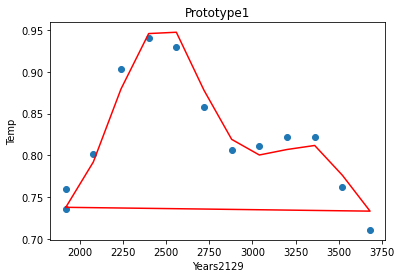

None


 [-9.76284325e-79  1.74740562e-74 -9.64783539e-71  1.99471182e-68
  1.08399337e-63  8.16820570e-61 -1.21969929e-56 -3.59173987e-53
  7.50857382e-50  6.66626353e-46  7.13597785e-43 -7.20954769e-39
 -2.77761949e-35  3.37582175e-32  4.55586122e-28  3.65140914e-25
 -5.80784243e-21 -1.02978724e-17  7.86800100e-14  8.74998597e-11
 -1.26171678e-06  3.46906013e-03 -4.70508445e+00  3.30390656e+03
 -9.64728720e+05] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.595 		 22.61495753504336
1901 2 		 24.496 		 24.19311804009974
1901 3 		 27.2 		 26.913651209145787
1901 4 		 29.549 		 29.08763832420111
1901 5 		 27.967 		 29.547730832353235
1901 6 		 26.172 		 27.61625543113053
1901 7 		 24.786 		 25.607952650919557
1901 8 		 24.644 		 24.84463831152022
1901 9 		 25.749 		 24.923576539590954
1901 10 		 25.273 		 25.224914014026524
1901 11 		 23.477 		 24.343480563923716
1901 12 		 21.889 		 23.07717581473291
1902 1 		 22.925 		 22.632420848235487
1902 2 		 24.438 		 24.211112962141634


1920 5 		 28.808 		 29.36420841999352
1920 6 		 26.586 		 27.20722343634069
1920 7 		 24.975 		 25.385056374236942
1920 8 		 25.153 		 24.80490307556093
1920 9 		 25.469 		 25.00891283516586
1920 10 		 25.483 		 25.158649135425687
1920 11 		 23.609 		 24.053185244336724
1920 12 		 22.022 		 22.71958640010655
1921 1 		 23.537 		 22.861526280492544
1921 2 		 24.557 		 24.564433486700057
1921 3 		 28.414 		 27.275423904553058
1921 4 		 29.404 		 29.325971577465534
1921 5 		 29.699 		 29.352703697904946
1921 6 		 26.542 		 27.18603597484529
1921 7 		 25.217 		 25.37454842595756
1921 8 		 24.827 		 24.80355976597965
1921 9 		 24.608 		 25.013652114495635
1921 10 		 24.712 		 25.15311714757979
1921 11 		 22.356 		 24.038288651123644
1921 12 		 21.763 		 22.700167465999723
1922 1 		 23.109 		 22.869565385088325
1922 2 		 24.618 		 24.583496619835497
1922 3 		 28.049 		 27.29322099582851
1922 4 		 29.877 		 29.336597952887416
1922 5 		 28.66 		 29.341022504076363
1922 6 		 26.354 		 27.1648968

1938 6 		 24.965 		 26.834550623610617
1938 7 		 24.374 		 25.213518338426947
1938 8 		 24.458 		 24.79194917239249
1938 9 		 24.482 		 25.09409193985164
1938 10 		 23.786 		 25.027782726839185
1938 11 		 22.616 		 23.793524772271514
1938 12 		 21.969 		 22.398556653752923
1939 1 		 22.544 		 22.974487301766874
1939 2 		 24.535 		 24.91147924883664
1939 3 		 26.829 		 27.591630090013147
1939 4 		 28.984 		 29.49615715394914
1939 5 		 29.031 		 29.116785400077703
1939 6 		 26.531 		 26.814480239197614
1939 7 		 24.275 		 25.20504324992001
1939 8 		 24.659 		 24.791922271564605
1939 9 		 24.762 		 25.09868072463572
1939 10 		 25.106 		 25.01862172494829
1939 11 		 22.466 		 23.7795959161371
1939 12 		 21.346 		 22.384252167388798
1940 1 		 21.553 		 22.979488748714328
1940 2 		 24.531 		 24.930915876299142
1940 3 		 27.195 		 27.60893788640201
1940 4 		 28.842 		 29.50423914977908
1940 5 		 28.588 		 29.102169533744455
1940 6 		 26.33 		 26.794485246375203
1940 7 		 24.334 		 25.19667536

1958 4 		 29.743 		 29.622864353954792
1958 5 		 29.131 		 28.81539920397103
1958 6 		 28.029 		 26.449186335101725
1958 7 		 24.672 		 25.0634329624027
1958 8 		 24.892 		 24.805089418634772
1958 9 		 24.563 		 25.176804942891003
1958 10 		 24.887 		 24.811300738975408
1958 11 		 24.267 		 23.51914492918551
1958 12 		 22.5 		 22.275416324570777
1959 1 		 23.598 		 23.071681378364563
1959 2 		 25.916 		 25.300250475242734
1959 3 		 28.012 		 27.932267105132343
1959 4 		 29.613 		 29.62790597896278
1959 5 		 29.689 		 28.798265108421447
1959 6 		 26.209 		 26.430886613979936
1959 7 		 24.3 		 25.056951767876743
1959 8 		 24.689 		 24.80649414984882
1959 9 		 25.153 		 25.18024790249765
1959 10 		 25.106 		 24.79883359070122
1959 11 		 23.866 		 23.50536477805674
1959 12 		 22.937 		 22.28097665642202
1960 1 		 23.729 		 23.076863337948918
1960 2 		 25.097 		 25.31961765700579
1960 3 		 27.768 		 27.948976213783027
1960 4 		 29.472 		 29.63277904084325
1960 5 		 28.727 		 28.781015962764

1977 10 		 24.875 		 24.555438132718205
1977 11 		 24.58 		 23.244985488161447
1977 12 		 21.823 		 22.6072729614228
1978 1 		 23.316 		 23.18615839983523
1978 2 		 24.763 		 25.665237761855128
1978 3 		 27.743 		 28.24366127511859
1978 4 		 29.287 		 29.6909298273474
1978 5 		 28.047 		 28.453226257726552
1978 6 		 25.566 		 26.10305384452641
1978 7 		 24.583 		 24.950613661155106
1978 8 		 23.874 		 24.8460981143862
1978 9 		 24.701 		 25.226193535164
1978 10 		 25.024 		 24.54111378823221
1978 11 		 24.534 		 23.229520918026566
1978 12 		 22.98 		 22.63553874655068
1979 1 		 23.706 		 23.193314250960945
1979 2 		 25.232 		 25.684234624281526
1979 3 		 27.896 		 28.259663717493417
1979 4 		 29.923 		 29.69248208016157
1979 5 		 28.71 		 28.434180067494513
1979 6 		 26.745 		 26.086890083774925
1979 7 		 25.367 		 24.94585856460035
1979 8 		 24.409 		 24.848836457028987
1979 9 		 24.83 		 25.227401474699377
1979 10 		 25.609 		 24.52673448754847
1979 11 		 23.877 		 23.2139205737561
1

2000 5 		 28.77 		 28.02014059327543
2000 6 		 25.99 		 25.77393474213779
2000 7 		 24.812 		 24.863794875964523
2000 8 		 24.965 		 24.919454997941852
2000 9 		 25.725 		 25.217521308615805
2000 10 		 25.644 		 24.21863434125483
2000 11 		 24.542 		 22.85443089850247
2000 12 		 22.527 		 22.892553008422258
2001 1 		 23.943 		 23.385339836061
2001 2 		 26.733 		 26.095362776607274
2001 3 		 28.288 		 28.59974112612009
2001 4 		 30.052 		 29.680648775428534
2001 5 		 29.838 		 27.99992600657046
2001 6 		 26.688 		 25.760306759640574
2001 7 		 25.557 		 24.860698798492553
2001 8 		 24.864 		 24.923369241580367
2001 9 		 26.044 		 25.215213263764976
2001 10 		 25.15 		 24.2039802595824
2001 11 		 24.97 		 22.836020341351627
2001 12 		 22.979 		 22.848215133175255
2002 1 		 23.571 		 23.39568877504766
2002 2 		 26.032 		 26.113720975279808
2002 3 		 29.359 		 28.614587612211704
2002 4 		 30.627 		 29.67800738544762
2002 5 		 29.808 		 27.97968209449947
2002 6 		 26.874 		 25.74679538588226

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


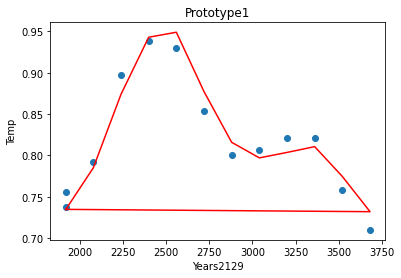

None


 [-1.14581286e-78  2.05680518e-74 -1.14054058e-70  2.57070339e-68
  1.28316369e-63  9.33594652e-61 -1.45247251e-56 -4.22559766e-53
  9.10284924e-50  7.92049138e-46  8.21557873e-43 -8.65312025e-39
 -3.28978978e-35  4.17047782e-32  5.44285555e-28  4.17949304e-25
 -6.97830026e-21 -1.21284855e-17  9.47257438e-14  1.02516293e-10
 -1.51560855e-06  4.18799305e-03 -5.70036486e+00  4.01509349e+03
 -1.17572358e+06] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.518 		 22.570703672568314
1901 2 		 24.231 		 24.09032298733294
1901 3 		 27.304 		 26.870545700322836
1901 4 		 29.626 		 29.11396285885386
1901 5 		 28.153 		 29.72848406414315
1901 6 		 26.261 		 27.751186881523576
1901 7 		 24.822 		 25.636920981774104
1901 8 		 24.632 		 24.863542895236982
1901 9 		 25.707 		 24.936952514162286
1901 10 		 25.407 		 25.297854785947127
1901 11 		 23.44 		 24.423925204774363
1901 12 		 22.014 		 23.146687209011986
1902 1 		 23.077 		 22.59376234116964
1902 2 		 24.451 		 24.1084891971936

1923 4 		 29.035 		 29.40215968795307
1923 5 		 28.667 		 29.51991924292594
1923 6 		 27.685 		 27.252132134066894
1923 7 		 24.521 		 25.3756653903611
1923 8 		 24.861 		 24.818675267843528
1923 9 		 24.68 		 25.04292007535696
1923 10 		 24.684 		 25.229650502750648
1923 11 		 23.448 		 24.075629311809315
1923 12 		 22.827 		 22.73793627775088
1924 1 		 23.333 		 22.90919121418055
1924 2 		 25.397 		 24.5269657942038
1924 3 		 28.181 		 27.288821224274113
1924 4 		 30.471 		 29.4139020877704
1924 5 		 29.766 		 29.508115648221224
1924 6 		 26.845 		 27.229882543083278
1924 7 		 25.386 		 25.365298396391793
1924 8 		 25.348 		 24.81746001278609
1924 9 		 24.948 		 25.04811392616853
1924 10 		 24.345 		 25.224021095152942
1924 11 		 22.34 		 24.06036904703453
1924 12 		 21.766 		 22.718824853399767
1925 1 		 22.308 		 22.917181990371084
1925 2 		 24.141 		 24.546627856532112
1925 3 		 27.532 		 27.306687463177365
1925 4 		 30.276 		 29.425514905238522
1925 5 		 28.354 		 29.496119826164

1946 11 		 23.663 		 23.74225151429139
1946 12 		 22.975 		 22.377132729850707
1947 1 		 23.324 		 23.02807513095159
1947 2 		 24.357 		 24.985417762883007
1947 3 		 27.626 		 27.693874186193568
1947 4 		 28.725 		 29.64553697549924
1947 5 		 29.397 		 29.186534600861368
1947 6 		 26.923 		 26.737108421234414
1947 7 		 24.722 		 25.159828528355806
1947 8 		 25.175 		 24.80917579115927
1947 9 		 24.492 		 25.167288446148856
1947 10 		 24.01 		 25.034185331748798
1947 11 		 22.748 		 23.728477096185088
1947 12 		 22.192 		 22.368601350484415
1948 1 		 23.463 		 23.031496824228203
1948 2 		 24.74 		 25.005485277593134
1948 3 		 27.244 		 27.7112151931487
1948 4 		 29.001 		 29.653806637963278
1948 5 		 29.165 		 29.170537967275827
1948 6 		 26.723 		 26.71667901562154
1948 7 		 25.017 		 25.152241116380317
1948 8 		 24.845 		 24.809675385059787
1948 9 		 24.387 		 25.172195986093953
1948 10 		 25.138 		 25.023445774024353
1948 11 		 24.509 		 23.714740265080703
1948 12 		 20.931 		 22.361

1968 9 		 25.334 		 25.256545916777103
1968 10 		 24.651 		 24.773345285523682
1968 11 		 23.711 		 23.440483747337012
1968 12 		 23.219 		 22.463849075529723
1969 1 		 22.978 		 23.10623709842749
1969 2 		 26.156 		 25.424567123942076
1969 3 		 29.275 		 28.06996903134696
1969 4 		 30.654 		 29.788722803164273
1969 5 		 29.822 		 28.802268179077654
1969 6 		 27.425 		 26.311643919128922
1969 7 		 24.93 		 25.01573255000077
1969 8 		 25.43 		 24.83686453454569
1969 9 		 24.593 		 25.259841623991726
1969 10 		 25.408 		 24.759361354684454
1969 11 		 24.515 		 23.426364549694583
1969 12 		 22.667 		 22.483293968513607
1970 1 		 23.594 		 23.110530891355126
1970 2 		 25.658 		 25.444322921756655
1970 3 		 28.469 		 28.086775525612754
1970 4 		 30.279 		 29.79321845221333
1970 5 		 29.363 		 28.78336475933902
1970 6 		 25.93 		 26.293586496956646
1970 7 		 25.225 		 25.010248618021606
1970 8 		 24.388 		 24.83895009111054
1970 9 		 24.799 		 25.263025382265447
1970 10 		 25.125 		 24.74526

1995 5 		 29.192 		 28.28148002386279
1995 6 		 28.281 		 25.88205493961833
1995 7 		 25.447 		 24.8993892941419
1995 8 		 25.995 		 24.913164582317695
1995 9 		 25.942 		 25.29853958863951
1995 10 		 25.568 		 24.370531244417652
1995 11 		 24.996 		 23.017739662500098
1995 12 		 23.503 		 23.05554006346315
1996 1 		 24.294 		 23.26996329456754
1996 2 		 25.853 		 25.94749100972898
1996 3 		 29.441 		 28.512510619329287
1996 4 		 30.089 		 29.844202436095102
1996 5 		 30.306 		 28.260496093962338
1996 6 		 27.278 		 25.867231565736233
1996 7 		 25.859 		 24.89593343613669
1996 8 		 24.685 		 24.91695396696031
1996 9 		 25.253 		 25.29789260496758
1996 10 		 24.649 		 24.355177070142698
1996 11 		 24.571 		 23.000164780866353
1996 12 		 22.514 		 23.04655851014331
1997 1 		 22.712 		 23.278203461675904
1997 2 		 24.634 		 25.966388977032153
1997 3 		 28.372 		 28.528376046435906
1997 4 		 28.692 		 29.843564733164385
1997 5 		 29.908 		 28.239462512096388
1997 6 		 27.867 		 25.85253632

/home/sudarshan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


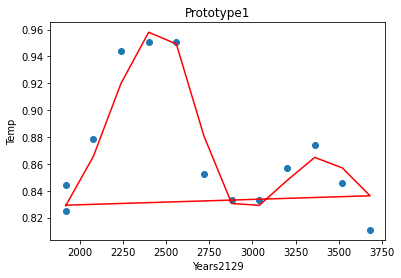

None


 [-8.79248676e-79  1.58627545e-74 -8.86317998e-71  2.29046866e-68
  9.99396131e-64  6.80877349e-61 -1.14327385e-56 -3.25438554e-53
  7.39009424e-50  6.20951094e-46  6.07175642e-43 -6.90645704e-39
 -2.56450321e-35  3.49446024e-32  4.30931661e-28  3.05254528e-25
 -5.58086647e-21 -9.35811149e-18  7.60223798e-14  7.83324551e-11
 -1.21160721e-06  3.37717226e-03 -4.62494193e+00  3.27479984e+03
 -9.63611068e+05] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 24.518 		 23.361905540978537
1901 2 		 25.388 		 24.587044275199993
1901 3 		 26.279 		 26.168547846546396
1901 4 		 27.664 		 27.324707060953603
1901 5 		 26.755 		 27.37926756905578
1901 6 		 24.599 		 25.587856455666945
1901 7 		 23.991 		 23.930130401266737
1901 8 		 24.099 		 23.694317159352824
1901 9 		 24.971 		 24.156905293775722
1901 10 		 24.942 		 24.722029369650407
1901 11 		 24.31 		 24.63923771343939
1901 12 		 23.209 		 24.151978093741462
1902 1 		 23.537 		 23.38946626075171
1902 2 		 24.578 		 24.597513901589

1923 9 		 24.157 		 24.301630515588446
1923 10 		 24.809 		 24.779584873868153
1923 11 		 24.421 		 24.53541107471101
1923 12 		 23.978 		 23.923211179567502
1924 1 		 23.65 		 23.791739430552347
1924 2 		 25.178 		 24.840401939367876
1924 3 		 26.622 		 26.390510345337912
1924 4 		 27.925 		 27.465491301810367
1924 5 		 27.339 		 27.147541490716858
1924 6 		 24.385 		 25.152295590518044
1924 7 		 23.393 		 23.769443019298837
1924 8 		 24.069 		 23.767183818815276
1924 9 		 24.426 		 24.308321458680556
1924 10 		 24.734 		 24.780905186532063
1924 11 		 23.849 		 24.530618451265617
1924 12 		 23.157 		 23.9124121820461
1925 1 		 23.537 		 23.802886155409738
1925 2 		 24.39 		 24.85186589571647
1925 3 		 26.143 		 26.399903038850052
1925 4 		 27.616 		 27.47065862660669
1925 5 		 26.276 		 27.13571294493787
1925 6 		 24.279 		 25.133974177895112
1925 7 		 23.766 		 23.76413647550158
1925 8 		 23.969 		 23.77093872976117
1925 9 		 24.943 		 24.315017204267903
1925 10 		 24.945 		 24.78210

1949 8 		 23.767 		 23.873050931049512
1949 9 		 23.882 		 24.47381773921661
1949 10 		 24.879 		 24.77662242799811
1949 11 		 23.921 		 24.408484167067332
1949 12 		 23.059 		 23.726153594000266
1950 1 		 23.508 		 23.972282195484265
1950 2 		 24.716 		 25.14288326013647
1950 3 		 26.374 		 26.629065465187654
1950 4 		 27.508 		 27.568502049958333
1950 5 		 27.347 		 26.797936219004914
1950 6 		 24.263 		 24.701974149523302
1950 7 		 22.861 		 23.672718310533092
1950 8 		 23.794 		 23.87776137846522
1950 9 		 23.56 		 24.48022778969817
1950 10 		 24.06 		 24.775023730693384
1950 11 		 23.601 		 24.40331913679652
1950 12 		 23.242 		 23.725219562036916
1951 1 		 23.864 		 23.976224990716204
1951 2 		 24.78 		 25.154555404653774
1951 3 		 26.694 		 26.638023746324702
1951 4 		 27.016 		 27.57104625185393
1951 5 		 26.991 		 26.782893523244187
1951 6 		 23.859 		 24.685912204189226
1951 7 		 23.301 		 23.670599076105283
1951 8 		 24.286 		 23.882504055960105
1951 9 		 24.985 		 24.486609

1975 12 		 23.137 		 23.996601737899706
1976 1 		 22.628 		 24.055513093246148
1976 2 		 24.585 		 25.441754385149107
1976 3 		 27.07 		 26.85686801163666
1976 4 		 26.972 		 27.595537323391063
1976 5 		 27.2 		 26.37682696917467
1976 6 		 25.173 		 24.32144022148661
1976 7 		 23.781 		 23.650287776259706
1976 8 		 23.694 		 24.011196040688084
1976 9 		 24.639 		 24.632942869482562
1976 10 		 25.582 		 24.702511335296556
1976 11 		 24.746 		 24.244621268523858
1976 12 		 24.358 		 24.018981312362477
1977 1 		 23.909 		 24.058637436566872
1977 2 		 25.551 		 25.452975842168556
1977 3 		 27.148 		 26.86540175219439
1977 4 		 27.884 		 27.59486598791741
1977 5 		 26.391 		 26.35958168901317
1977 6 		 24.667 		 24.30844803111069
1977 7 		 23.606 		 23.650657515032215
1977 8 		 24.194 		 24.016719710631296
1977 9 		 24.909 		 24.638097654430194
1977 10 		 24.999 		 24.698754236547277
1977 11 		 24.845 		 24.237169983712956
1977 12 		 24.027 		 24.041910345641895
1978 1 		 24.247 		 24.06180

2000 5 		 26.664 		 25.949717108262703
2000 6 		 24.101 		 24.04585901059024
2000 7 		 23.795 		 23.679645056141542
2000 8 		 23.787 		 24.150508156670256
2000 9 		 24.944 		 24.735586226744577
2000 10 		 25.101 		 24.601682627541944
2000 11 		 25.349 		 24.03127148465626
2000 12 		 24.034 		 24.327371676636858
2001 1 		 24.966 		 24.15210362563096
2001 2 		 26.75 		 25.71390557390265
2001 3 		 27.349 		 27.063694005927072
2001 4 		 27.721 		 27.537866425884886
2001 5 		 27.112 		 25.931507967306302
2001 6 		 24.865 		 24.036043083844707
2001 7 		 24.204 		 23.681702711908148
2001 8 		 23.983 		 24.156585020704195
2001 9 		 25.337 		 24.738784368408844
2001 10 		 24.959 		 24.597178260533138
2001 11 		 25.291 		 24.021043503819033
2001 12 		 24.406 		 24.299739666489884
2002 1 		 25.011 		 24.15699544728361
2002 2 		 25.347 		 25.724404655596242
2002 3 		 27.725 		 27.071637386417017
2002 4 		 28.088 		 27.533750127172098
2002 5 		 27.324 		 25.913282231060787
2002 6 		 24.902 		 24.02

In [ ]:
for filename in files_temp:
    print("\n\nDistrict: "+filename[:-9])
    func_temp(filename)


In [ ]:
temp_models=[l[:-4] for l in os.listdir(".") if l.endswith("temp_model.csv")]
temp_models

['dharwad_temp_model',
 'bellary_temp_model',
 'chitradurga_temp_model',
 'koppal_temp_model',
 'gadag_temp_model',
 'bidar_temp_model',
 'kodagu_temp_model',
 'bagalkot_temp_model',
 'chamarajnagar_temp_model',
 'shimoga_temp_model',
 'bijapur_temp_model',
 'gulbarga_temp_model',
 'tumkur_temp_model',
 'belgaum_temp_model',
 'kolar_temp_model',
 'raichur_temp_model',
 'mysore_temp_model',
 'haveri_temp_model',
 'davanagere_temp_model',
 'mandya_temp_model',
 'hassan_temp_model',
 'chikmaglor_temp_model']

In [ ]:
y=2020
for tm in temp_models:
    loaded_model = load_model(tm)
    print("District: %25s"%tm[:-11].upper(),end=" | ")
    print("Temperature predicted: ",predict_temp(loaded_model,y)*maxtemp)

District:                   DHARWAD | Temperature predicted:  22.395627523489296
District:                   BELLARY | Temperature predicted:  21.421842645647004
District:               CHITRADURGA | Temperature predicted:  21.551171104402282
District:                    KOPPAL | Temperature predicted:  21.336228502951563
District:                     GADAG | Temperature predicted:  21.75307700679606
District:                     BIDAR | Temperature predicted:  20.197175682099846
District:                    KODAGU | Temperature predicted:  22.376778345821194
District:                  BAGALKOT | Temperature predicted:  21.351400352483616
District:             CHAMARAJNAGAR | Temperature predicted:  22.434332067446086
District:                   SHIMOGA | Temperature predicted:  22.903175680650552
District:                   BIJAPUR | Temperature predicted:  21.010187709122583
District:                  GULBARGA | Temperature predicted:  20.55467934759458
District:                    T

## Crop Yield prediction using perceptron

In [ ]:
import numpy as np
import pandas as pd
import csv

In [ ]:
with open('data/bagalkot.csv', 'r') as data_file:
    data = pd.read_csv(data_file, delimiter=',')
data.head()

,Crop,Year,Rainfall,Temp,N,P,K,Yield(Tons/Hectre)
0,Bajra,1998,815.087,26.0,39.11,41.25,7.13,1.07
1,Bajra,1999,768.995,27.0,39.11,41.25,7.13,0.73
2,Bajra,2000,857.558,28.0,39.11,41.25,7.13,1.00
3,Bajra,2001,607.528,25.0,39.11,41.25,7.13,0.76
4,Bajra,2002,632.970,27.0,39.11,41.25,7.13,0.30


## Training data
- X_train :- N,P,K,Rainfall and temprature data 
- Y-train :- Yield data

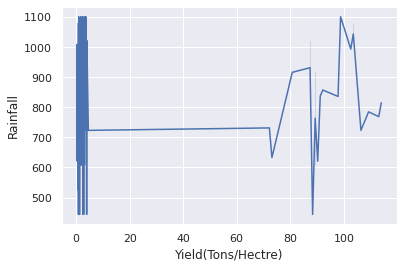

In [ ]:
import seaborn as sns

sns.set(style="darkgrid")
sns.lineplot(x="Yield(Tons/Hectre)", y="Rainfall",     
             data=data)

In [ ]:
X_train = []
Y_train = []


In [ ]:
for _, row in data.iterrows():
    X_train.append([row["Rainfall"], row["Temp"], row["N"],row["P"], row["K"]])
    Y_train.append(row["Yield(Tons/Hectre)"])
X_train = np.array(X_train)
Y_train = np.array(Y_train)*1000
print(X_train.shape)
print(Y_train.shape)

(180, 5)
(180,)


In [ ]:


weights = None
bias = None
#step value


#functon for getting weight
def Stepfunction(X, y, W, b, learn_rate = 0.01):

    for i in range(0, len(X)):

        y_hat = yield_prediction(X[i], W, b)

        if y[i] > y_hat:
           
            W[0] += (X[i][0]*learn_rate)
            W[1] += (X[i][1]*learn_rate)
            W[2] += (X[i][2]*learn_rate)
            W[3] += (X[i][3]*learn_rate)
            W[4] += (X[i][4]*learn_rate)
            #W[5] += (X[i][5]*learn_rate)
            #W[6] += (X[i][6]*learn_rate)
            
            b += learn_rate

        elif y[i] < y_hat:

            

            W[0] -= (X[i][0]*learn_rate)
            W[1] -= (X[i][1]*learn_rate)
            W[2] -= (X[i][2]*learn_rate)
            W[3] -= (X[i][3]*learn_rate)
            W[4] -= (X[i][4]*learn_rate)
            #W[5] -= (X[i][5]*learn_rate)
            #W[6] -= (X[i][6]*learn_rate)
            
            b -= learn_rate

    return W, b

#function to find the equation of boundary lines
def trainmodel(X, y, learn_rate=0.00005, num_epoches=550):

    #global weights, bias
    #finding max and min values
    x1_min, x1_max = min(X.T[0]), max(X.T[0])
    x2_min, x2_max = min(X.T[1]), max(X.T[1])
    x3_min, x3_max = min(X.T[2]), max(X.T[2])
    x4_min, x4_max = min(X.T[3]), max(X.T[3])
    x5_min, x5_max = min(X.T[4]), max(X.T[4])
    #x6_min, x6_max = min(X.T[5]), max(X.T[5])
    #x7_min, x7_max = min(X.T[6]), max(X.T[6])
    
    W = np.array(np.random.rand(5,1)) 

    b = np.random.rand(1)[0] + (x1_max+x2_max+x3_max+x4_max+x5_max)/5#+x6_max+x7_max)/7

    #training the model
    for i in range(0,num_epoches):
        W, b = Stepfunction(X, y, W, b, learn_rate)
    weights = W
    bias = b
    return weights,bias

In [ ]:
def func_yield(name,idx):
    path="./data/cropwise/"+name
    with open(path, 'r') as data_file:
        data = pd.read_csv(data_file, delimiter=',')
    
    X_train = []
    Y_train = []

    for _, row in data.iterrows():
        #modelname=name.split('_')[0]
        #row['Rainfall']=predict_rain(load_model(modelname),row['Year'])
        #row['Temp']=predict_rain(load_model(modelname),row['Year'])
        X_train.append([row["Rainfall"], row[1], row[2],row["P"], row["K"]])
        Y_train.append(row["Yield(Tons/Hectre)"])
        
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)*1000
    print(X_train.shape)
    print(Y_train.shape)
    
    weights,bias=trainmodel(X_train[:], Y_train[:])
   # idx =13
    pred=np.matmul(X_train[idx],weights)+bias
    act=Y_train[idx]
    print("Predicted :",pred," kg/hectares")
    print("Actual :",act, "kg/hectares")
    
    wb = np.append(weights, bias)

    save_model(wb,name)
    return pred,act

In [ ]:
#first parameter is data file name and second parameter is index 
print("District: Bidar\n")
print("wheat:\t")
func_yield('bidar_wheat.csv',20)
print("\nJowar:\t")
func_yield('bidar_jowar.csv',20)
print("\nRice:")
func_yield('bidar_rice.csv',20)
print("\nGroundnut:")
func_yield('bidar_groundnut.csv',20)
print('\nMaize:')
func_yield('bidar_maize.csv',20)

District: Bidar

wheat:	
(21, 5)
(21,)
Predicted : [1635.11299014]  kg/hectares
Actual : 1340.0 kg/hectares

Jowar:	
(21, 5)
(21,)
Predicted : [1135.3499642]  kg/hectares
Actual : 1980.0 kg/hectares

Rice:
(21, 5)
(21,)
Predicted : [1406.54049391]  kg/hectares
Actual : 1860.0 kg/hectares

Groundnut:
(21, 5)
(21,)
Predicted : [515.75737256]  kg/hectares
Actual : 600.0 kg/hectares

Maize:
(21, 5)
(21,)
Predicted : [2412.74286989]  kg/hectares
Actual : 3450.0 kg/hectares


In [ ]:
print("District: Raichur\n")
print("wheat:\t")
func_yield('raichur_wheat.csv',20)
print("\nRice: ")
func_yield('raichur_rice.csv',20)

District: Raichur

wheat:	
(21, 5)
(21,)
Predicted : [925.46017197]  kg/hectares
Actual : 810.0 kg/hectares

Rice: 
(21, 5)
(21,)
Predicted : [2808.65658782]  kg/hectares
Actual : 2780.0 kg/hectares


In [ ]:
print("District: Gadag\n")
print("wheat:\t")
func_yield('gadag_wheat.csv',20)
print("\nRice:")
func_yield('gadag_rice.csv',20)

District: Gadag

wheat:	
(21, 5)
(21,)
Predicted : [599.77146083]  kg/hectares
Actual : 540.0 kg/hectares

Rice:
(21, 5)
(21,)
Predicted : [2553.59299906]  kg/hectares
Actual : 2580.0 kg/hectares


In [ ]:
print("District: Belgaum\n")
print("wheat:\t")
func_yield('belgaum_wheat.csv',20)
print("\nRice:")
func_yield('belgaum_rice.csv',20)

District: Belgaum

wheat:	
(21, 5)
(21,)
Predicted : [1367.43653259]  kg/hectares
Actual : 1510.0 kg/hectares

Rice:
(21, 5)
(21,)
Predicted : [2082.10707256]  kg/hectares
Actual : 2300.0 kg/hectares


In [ ]:
print("District: Bagalkot\n")
print("wheat:\t")
func_yield('bagalkot_wheat.csv',19)
print("\nRice:")
func_yield('bagalkot_rice.csv',19)

District: Bagalkot

wheat:	
(20, 5)
(20,)
Predicted : [947.80968325]  kg/hectares
Actual : 1200.0 kg/hectares

Rice:
(20, 5)
(20,)
Predicted : [2941.2626634]  kg/hectares
Actual : 2760.0 kg/hectares


Yield prediction without rainfall and temperatures given

In [ ]:
#yield prediction without rainfall and temperatures given
import csv
def getYears(name):
    # open the file in universal line ending mode 
    path="./data/cropwise/"+name
    print(pd.read_csv(path).head())
    with open(path, 'r') as infile:
      # read the file as a dictionary for each row ({header : value})
      reader = csv.DictReader(infile)
      data = {}
      for row in reader:
        for header, value in row.items():
          try:
            data[header].append(value)
          except KeyError:
            data[header] = [value]

    # extract the variables you want
    crops = data['Crop']
    years = data['Year']
    
    return years,data['N'],data['P'],data['K'],data['Yield(Tons/Hectre)']


In [ ]:
years,npk1,npk2,npk3,yields=getYears('koppal_rice.csv')
years
#can see the temp and rainfall column empty

   Crop  Year  Rainfall  Temp     N      P     K  Yield(Tons/Hectre)
0  Rice  1999       NaN   NaN  93.5  35.74  0.89                3.54
1  Rice  2000       NaN   NaN  93.5  35.74  0.89                3.45
2  Rice  2001       NaN   NaN  93.5  35.74  0.89                3.38
3  Rice  2002       NaN   NaN  93.5  35.74  0.89                3.97
4  Rice  2003       NaN   NaN  93.5  35.74  0.89                4.17


['1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [ ]:
count=0
temps=[]
rains=[]
model_rain,model_temp='koppal_rain_model','koppal_temp_model'

for count in range(len(years)):
    loaded_model_temp,loaded_model_rain=load_model(model_temp),load_model(model_rain)
    temps.append(predict_temp(loaded_model_temp,int(years[count]))*maxtemp)
    rains.append(predict_rain(loaded_model_rain,int(years[count]))*maxrain)
    count+=1

In [ ]:
wheats,rices=[],[]
for i in range(len(temps)):
    wheats.append('Wheat')
    rices.append('Rice')

In [ ]:
temps

[21.754284544198462,
 21.74843290829783,
 21.741791733286032,
 21.734291814317306,
 21.725852811871714,
 21.71639453317225,
 21.705828474457064,
 21.69406336163605,
 21.680998275607823,
 21.666529762620726,
 21.650547676557053,
 21.632936659702413,
 21.613571945009134,
 21.59232185072576,
 21.569049452376863,
 21.543609265483916,
 21.515847347840666,
 21.485602308926484,
 21.45270198818048]

In [ ]:
rains

[1696.6471241830377,
 1692.3830793626967,
 1688.0214403570503,
 1683.5622071662158,
 1679.005379790115,
 1674.350958228748,
 1669.5989424822315,
 1664.7493325503708,
 1659.8021284332829,
 1654.7573301309287,
 1649.6149376433473,
 1644.3749509704996,
 1639.0373701124247,
 1633.6021950691613,
 1628.0694258405927,
 1622.439062426758,
 1616.711104827657,
 1610.8855530433286,
 1604.962407073773]

In [ ]:
df1 = pd.DataFrame(data={"Crop":rices,"Temp": temps, "Rainfall":rains,"N":npk1,"P":npk2,"K":npk3,"Yield(Tons/Hectre)":yields})
df2 = pd.DataFrame(data={"Crop":wheats,"Temp": temps, "Rainfall":rains,"N":npk1,"P":npk2,"K":npk3,"Yield(Tons/Hectre)":yields})

df1.to_csv('./data/cropwise/koppal_rice2.csv', sep=',',index=False)
df2.to_csv('./data/cropwise/koppal_wheat2.csv', sep=',',index=False)

In [ ]:
df=pd.read_csv('./data/cropwise/koppal_rice2.csv')
df

,Crop,Temp,Rainfall,N,P,K,Yield(Tons/Hectre)
0,Rice,21.754285,1696.647124,93.5,35.74,0.89,3.54
1,Rice,21.748433,1692.383079,93.5,35.74,0.89,3.45
2,Rice,21.741792,1688.021440,93.5,35.74,0.89,3.38
3,Rice,21.734292,1683.562207,93.5,35.74,0.89,3.97
4,Rice,21.725853,1679.005380,93.5,35.74,0.89,4.17
5,Rice,21.716395,1674.350958,93.5,35.74,0.89,3.84
6,Rice,21.705828,1669.598942,93.5,35.74,0.89,3.42
7,Rice,21.694063,1664.749333,93.5,35.74,0.89,3.15
8,Rice,21.680998,1659.802128,93.5,35.74,0.89,3.74
9,Rice,21.666530,1654.757330,93.5,35.74,0.89,3.51


In [ ]:
df=pd.read_csv('./data/cropwise/koppal_wheat2.csv')
df

,Crop,Temp,Rainfall,N,P,K,Yield(Tons/Hectre)
0,Wheat,21.754285,1696.647124,93.5,35.74,0.89,3.54
1,Wheat,21.748433,1692.383079,93.5,35.74,0.89,3.45
2,Wheat,21.741792,1688.021440,93.5,35.74,0.89,3.38
3,Wheat,21.734292,1683.562207,93.5,35.74,0.89,3.97
4,Wheat,21.725853,1679.005380,93.5,35.74,0.89,4.17
5,Wheat,21.716395,1674.350958,93.5,35.74,0.89,3.84
6,Wheat,21.705828,1669.598942,93.5,35.74,0.89,3.42
7,Wheat,21.694063,1664.749333,93.5,35.74,0.89,3.15
8,Wheat,21.680998,1659.802128,93.5,35.74,0.89,3.74
9,Wheat,21.666530,1654.757330,93.5,35.74,0.89,3.51


In [ ]:
func_yield('koppal_rice2.csv',18)

(19, 5)
(19,)
Predicted : [3326.34211089]  kg/hectares
Actual : 4280.0 kg/hectares


In [ ]:
func_yield('koppal_wheat2.csv',18)

(19, 5)
(19,)
Predicted : [3668.98049482]  kg/hectares
Actual : 4280.0 kg/hectares


Graphs 

In [ ]:
def add_predicted_column(file):
    for i in range(0,20):
        pred.append(func_yield())

(21, 5)
(21,)
Predicted : [2886.45125555]  kg/hectares
Actual : 2770.0 kg/hectares
(21, 5)
(21,)
Predicted : [2857.88214571]  kg/hectares
Actual : 3370.0 kg/hectares
(21, 5)
(21,)
Predicted : [2965.18721101]  kg/hectares
Actual : 3110.0 kg/hectares
(21, 5)
(21,)
Predicted : [3093.13427773]  kg/hectares
Actual : 3150.0 kg/hectares
(21, 5)
(21,)
Predicted : [2997.86803465]  kg/hectares
Actual : 2900.0 kg/hectares
(21, 5)
(21,)
Predicted : [3227.50952157]  kg/hectares
Actual : 3250.0 kg/hectares
(21, 5)
(21,)
Predicted : [2890.84706545]  kg/hectares
Actual : 2690.0 kg/hectares
(21, 5)
(21,)
Predicted : [2925.61850024]  kg/hectares
Actual : 2740.0 kg/hectares
(21, 5)
(21,)
Predicted : [2679.17105752]  kg/hectares
Actual : 2410.0 kg/hectares
(21, 5)
(21,)
Predicted : [3215.36990072]  kg/hectares
Actual : 3020.0 kg/hectares
(21, 5)
(21,)
Predicted : [3202.24267084]  kg/hectares
Actual : 2880.0 kg/hectares
(21, 5)
(21,)
Predicted : [2893.83687003]  kg/hectares
Actual : 3170.0 kg/hectares
(21,

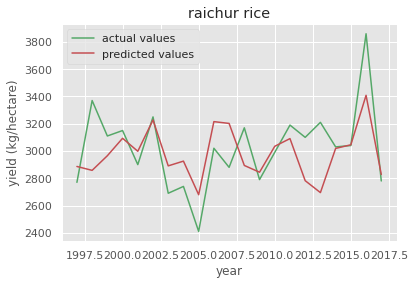

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
file='raichur_rice.csv'
df=pd.read_csv('./data/cropwise/'+file)
x=df['Year']
y2,y=[],[]
for i in range(21):
    pred,act=func_yield(file,i)
    y2.append(pred)
    y.append(act)
#y2=add_predicted_column('./data/cropwise/bidar_rice.csv')

plt.plot(x,y,'g',label="actual values")
plt.plot(x,y2,'r',label="predicted values")
plt.xlabel('year')
plt.ylabel('yield (kg/hectare)')
plt.title('raichur rice')
plt.legend()
#plt.plot(x,y2,'r',label='predicted values')
plt.show()
    


(20, 5)
(20,)
Predicted : [1142.78893284]  kg/hectares
Actual : 740.0 kg/hectares
(20, 5)
(20,)
Predicted : [995.8531977]  kg/hectares
Actual : 1120.0 kg/hectares
(20, 5)
(20,)
Predicted : [1080.60451376]  kg/hectares
Actual : 1180.0 kg/hectares
(20, 5)
(20,)
Predicted : [1325.48006241]  kg/hectares
Actual : 1080.0 kg/hectares
(20, 5)
(20,)
Predicted : [868.14999411]  kg/hectares
Actual : 1200.0 kg/hectares
(20, 5)
(20,)
Predicted : [1060.52059951]  kg/hectares
Actual : 1120.0 kg/hectares
(20, 5)
(20,)
Predicted : [1099.72008442]  kg/hectares
Actual : 790.0 kg/hectares
(20, 5)
(20,)
Predicted : [680.54274797]  kg/hectares
Actual : 1420.0 kg/hectares
(20, 5)
(20,)
Predicted : [1230.81988813]  kg/hectares
Actual : 1400.0 kg/hectares
(20, 5)
(20,)
Predicted : [1205.13027143]  kg/hectares
Actual : 1050.0 kg/hectares
(20, 5)
(20,)
Predicted : [1316.20155616]  kg/hectares
Actual : 1260.0 kg/hectares
(20, 5)
(20,)
Predicted : [863.07243973]  kg/hectares
Actual : 2270.0 kg/hectares
(20, 5)
(20

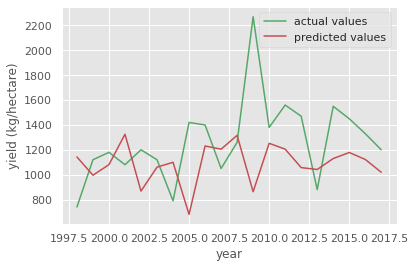

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
file='bagalkot_wheat.csv'
df=pd.read_csv('./data/cropwise/'+file)
x=df['Year']
y2,y=[],[]
for i in range(20):
    pred,act=func_yield(file,i)
    y2.append(pred)
    y.append(act)
#y2=add_predicted_column('./data/cropwise/bidar_rice.csv')

plt.plot(x,y,'g',label="actual values")
plt.plot(x,y2,'r',label="predicted values")
plt.xlabel('year')
plt.ylabel('yield (kg/hectare)')
plt.legend()
#plt.plot(x,y2,'r',label='predicted values')
plt.show()
    


(20, 5)
(20,)
Predicted : [2550.96130035]  kg/hectares
Actual : 1600.0 kg/hectares
(20, 5)
(20,)
Predicted : [2955.22467148]  kg/hectares
Actual : 1580.0 kg/hectares
(20, 5)
(20,)
Predicted : [2543.11924937]  kg/hectares
Actual : 1820.0 kg/hectares
(20, 5)
(20,)
Predicted : [2909.7786232]  kg/hectares
Actual : 2400.0 kg/hectares
(20, 5)
(20,)
Predicted : [2597.47373684]  kg/hectares
Actual : 2050.0 kg/hectares
(20, 5)
(20,)
Predicted : [2490.77804132]  kg/hectares
Actual : 2260.0 kg/hectares
(20, 5)
(20,)
Predicted : [2957.65742967]  kg/hectares
Actual : 2790.0 kg/hectares
(20, 5)
(20,)
Predicted : [2930.05556287]  kg/hectares
Actual : 2820.0 kg/hectares
(20, 5)
(20,)
Predicted : [2934.33736464]  kg/hectares
Actual : 2900.0 kg/hectares
(20, 5)
(20,)
Predicted : [2450.49902867]  kg/hectares
Actual : 3030.0 kg/hectares
(20, 5)
(20,)
Predicted : [2924.15031873]  kg/hectares
Actual : 3060.0 kg/hectares
(20, 5)
(20,)
Predicted : [2913.91456182]  kg/hectares
Actual : 2870.0 kg/hectares
(20, 

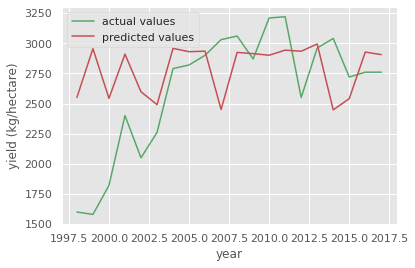

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
file='bagalkot_rice.csv'
df=pd.read_csv('./data/cropwise/'+file)
x=df['Year']
y2,y=[],[]
for i in range(20):
    pred,act=func_yield(file,i)
    y2.append(pred)
    y.append(act)
#y2=add_predicted_column('./data/cropwise/bidar_rice.csv')

plt.plot(x,y,'g',label="actual values")
plt.plot(x,y2,'r',label="predicted values")
plt.xlabel('year')
plt.ylabel('yield (kg/hectare)')
plt.legend()
#plt.plot(x,y2,'r',label='predicted values')
plt.show()
    


(21, 5)
(21,)
Predicted : [2417.1409512]  kg/hectares
Actual : 1440.0 kg/hectares
(21, 5)
(21,)
Predicted : [2182.17265048]  kg/hectares
Actual : 1820.0 kg/hectares
(21, 5)
(21,)
Predicted : [2511.40448692]  kg/hectares
Actual : 1890.0 kg/hectares
(21, 5)
(21,)
Predicted : [2083.42863967]  kg/hectares
Actual : 1650.0 kg/hectares
(21, 5)
(21,)
Predicted : [1440.2514659]  kg/hectares
Actual : 890.0 kg/hectares
(21, 5)
(21,)
Predicted : [2279.77682929]  kg/hectares
Actual : 580.0 kg/hectares
(21, 5)
(21,)
Predicted : [2992.29883285]  kg/hectares
Actual : 720.0 kg/hectares
(21, 5)
(21,)
Predicted : [2787.67223432]  kg/hectares
Actual : 1620.0 kg/hectares
(21, 5)
(21,)
Predicted : [1750.8961295]  kg/hectares
Actual : 2180.0 kg/hectares
(21, 5)
(21,)
Predicted : [2148.9876342]  kg/hectares
Actual : 1480.0 kg/hectares
(21, 5)
(21,)
Predicted : [2674.24964234]  kg/hectares
Actual : 1440.0 kg/hectares
(21, 5)
(21,)
Predicted : [2456.24846198]  kg/hectares
Actual : 1310.0 kg/hectares
(21, 5)
(21

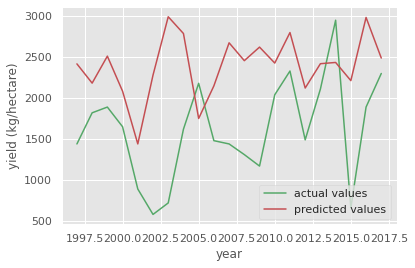

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
file='belgaum_rice.csv'
df=pd.read_csv('./data/cropwise/'+file)
x=df['Year']
y2,y=[],[]
for i in range(21):
    pred,act=func_yield(file,i)
    y2.append(pred)
    y.append(act)
#y2=add_predicted_column('./data/cropwise/bidar_rice.csv')

plt.plot(x,y,'g',label="actual values")
plt.plot(x,y2,'r',label="predicted values")
plt.xlabel('year')
plt.ylabel('yield (kg/hectare)')
plt.legend()
#plt.plot(x,y2,'r',label='predicted values')
plt.show()
    


(21, 5)
(21,)
Predicted : [1416.48422057]  kg/hectares
Actual : 750.0 kg/hectares
(21, 5)
(21,)
Predicted : [1419.00206545]  kg/hectares
Actual : 1130.0 kg/hectares
(21, 5)
(21,)
Predicted : [1368.99218061]  kg/hectares
Actual : 1200.0 kg/hectares
(21, 5)
(21,)
Predicted : [1312.79590255]  kg/hectares
Actual : 1280.0 kg/hectares
(21, 5)
(21,)
Predicted : [1235.41308271]  kg/hectares
Actual : 1090.0 kg/hectares
(21, 5)
(21,)
Predicted : [1263.50964428]  kg/hectares
Actual : 730.0 kg/hectares
(21, 5)
(21,)
Predicted : [1467.09630886]  kg/hectares
Actual : 620.0 kg/hectares
(21, 5)
(21,)
Predicted : [1286.84401894]  kg/hectares
Actual : 1040.0 kg/hectares
(21, 5)
(21,)
Predicted : [1036.12400035]  kg/hectares
Actual : 1040.0 kg/hectares
(21, 5)
(21,)
Predicted : [1428.05304569]  kg/hectares
Actual : 1240.0 kg/hectares
(21, 5)
(21,)
Predicted : [1327.11387252]  kg/hectares
Actual : 1240.0 kg/hectares
(21, 5)
(21,)
Predicted : [1308.83754768]  kg/hectares
Actual : 1080.0 kg/hectares
(21, 5)

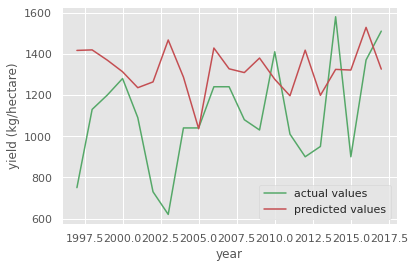

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
file='belgaum_wheat.csv'
df=pd.read_csv('./data/cropwise/'+file)
x=df['Year']
y2,y=[],[]
for i in range(21):
    pred,act=func_yield(file,i)
    y2.append(pred)
    y.append(act)
#y2=add_predicted_column('./data/cropwise/bidar_rice.csv')

plt.plot(x,y,'g',label="actual values")
plt.plot(x,y2,'r',label="predicted values")
plt.xlabel('year')
plt.ylabel('yield (kg/hectare)')
plt.legend()
#plt.plot(x,y2,'r',label='predicted values')
plt.show()
    


(21, 5)
(21,)
Predicted : [2771.12176906]  kg/hectares
Actual : 2460.0 kg/hectares
(21, 5)
(21,)
Predicted : [2522.68752505]  kg/hectares
Actual : 2490.0 kg/hectares
(21, 5)
(21,)
Predicted : [2461.09222947]  kg/hectares
Actual : 2420.0 kg/hectares
(21, 5)
(21,)
Predicted : [2510.58775701]  kg/hectares
Actual : 2130.0 kg/hectares
(21, 5)
(21,)
Predicted : [2338.52486435]  kg/hectares
Actual : 2170.0 kg/hectares
(21, 5)
(21,)
Predicted : [2569.52760612]  kg/hectares
Actual : 2560.0 kg/hectares
(21, 5)
(21,)
Predicted : [2823.97105017]  kg/hectares
Actual : 3040.0 kg/hectares
(21, 5)
(21,)
Predicted : [2693.56783509]  kg/hectares
Actual : 4300.0 kg/hectares
(21, 5)
(21,)
Predicted : [2488.91851985]  kg/hectares
Actual : 2300.0 kg/hectares
(21, 5)
(21,)
Predicted : [2672.00211011]  kg/hectares
Actual : 2480.0 kg/hectares
(21, 5)
(21,)
Predicted : [2580.69503284]  kg/hectares
Actual : 1400.0 kg/hectares
(21, 5)
(21,)
Predicted : [2672.76395299]  kg/hectares
Actual : 1850.0 kg/hectares
(21,

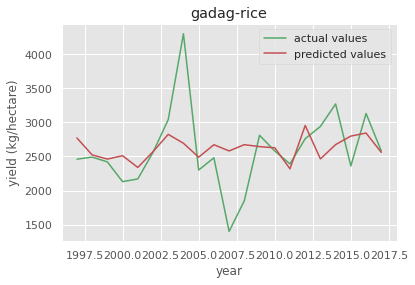

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
file='gadag_rice.csv'
df=pd.read_csv('./data/cropwise/'+file)
x=df['Year']
y2,y=[],[]
for i in range(21):
    pred,act=func_yield(file,i)
    y2.append(pred)
    y.append(act)
#y2=add_predicted_column('./data/cropwise/bidar_rice.csv')

plt.plot(x,y,'g',label="actual values")
plt.plot(x,y2,'r',label="predicted values")
plt.xlabel('year')
plt.ylabel('yield (kg/hectare)')
plt.title('gadag-rice')
plt.legend()
#plt.plot(x,y2,'r',label='predicted values')
plt.show()
    


(21, 5)
(21,)
Predicted : [559.79893682]  kg/hectares
Actual : 710.0 kg/hectares
(21, 5)
(21,)
Predicted : [182.24640371]  kg/hectares
Actual : 620.0 kg/hectares
(21, 5)
(21,)
Predicted : [510.94308256]  kg/hectares
Actual : 510.0 kg/hectares
(21, 5)
(21,)
Predicted : [555.64936264]  kg/hectares
Actual : 320.0 kg/hectares
(21, 5)
(21,)
Predicted : [73.63958656]  kg/hectares
Actual : 210.0 kg/hectares
(21, 5)
(21,)
Predicted : [75.33293102]  kg/hectares
Actual : 220.0 kg/hectares
(21, 5)
(21,)
Predicted : [593.62836216]  kg/hectares
Actual : 670.0 kg/hectares
(21, 5)
(21,)
Predicted : [516.44226011]  kg/hectares
Actual : 870.0 kg/hectares
(21, 5)
(21,)
Predicted : [379.73845842]  kg/hectares
Actual : 560.0 kg/hectares
(21, 5)
(21,)
Predicted : [620.91916023]  kg/hectares
Actual : 820.0 kg/hectares
(21, 5)
(21,)
Predicted : [275.02009619]  kg/hectares
Actual : 660.0 kg/hectares
(21, 5)
(21,)
Predicted : [503.27046892]  kg/hectares
Actual : 490.0 kg/hectares
(21, 5)
(21,)
Predicted : [252

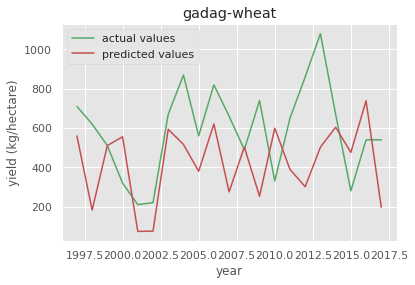

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
file='gadag_wheat.csv'
df=pd.read_csv('./data/cropwise/'+file)
x=df['Year']
y2,y=[],[]
for i in range(21):
    pred,act=func_yield(file,i)
    y2.append(pred)
    y.append(act)
#y2=add_predicted_column('./data/cropwise/bidar_rice.csv')

plt.plot(x,y,'g',label="actual values")
plt.plot(x,y2,'r',label="predicted values")
plt.xlabel('year')
plt.ylabel('yield (kg/hectare)')
plt.title('gadag-wheat')
plt.legend()
#plt.plot(x,y2,'r',label='predicted values')
plt.show()
    


(21, 5)
(21,)
Predicted : [1578.53686705]  kg/hectares
Actual : 220.0 kg/hectares
(21, 5)
(21,)
Predicted : [1518.32160707]  kg/hectares
Actual : 870.0 kg/hectares
(21, 5)
(21,)
Predicted : [1680.67183355]  kg/hectares
Actual : 1010.0 kg/hectares
(21, 5)
(21,)
Predicted : [1406.7223666]  kg/hectares
Actual : 990.0 kg/hectares
(21, 5)
(21,)
Predicted : [1454.92754749]  kg/hectares
Actual : 810.0 kg/hectares
(21, 5)
(21,)
Predicted : [1435.34572133]  kg/hectares
Actual : 680.0 kg/hectares
(21, 5)
(21,)
Predicted : [1452.65292212]  kg/hectares
Actual : 590.0 kg/hectares
(21, 5)
(21,)
Predicted : [1180.34447456]  kg/hectares
Actual : 620.0 kg/hectares
(21, 5)
(21,)
Predicted : [1416.46084042]  kg/hectares
Actual : 610.0 kg/hectares
(21, 5)
(21,)
Predicted : [1487.45427713]  kg/hectares
Actual : 740.0 kg/hectares
(21, 5)
(21,)
Predicted : [1492.79307596]  kg/hectares
Actual : 1210.0 kg/hectares
(21, 5)
(21,)
Predicted : [1672.98693422]  kg/hectares
Actual : 1200.0 kg/hectares
(21, 5)
(21,)


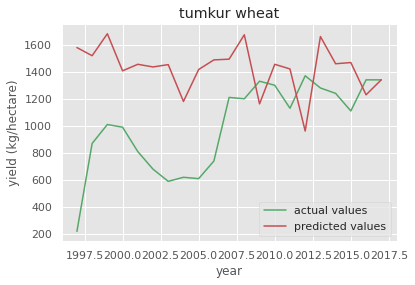

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
file='bidar_wheat.csv'
df=pd.read_csv('./data/cropwise/'+file)
x=df['Year']
y2,y=[],[]
for i in range(21):
    pred,act=func_yield(file,i)
    y2.append(pred)
    y.append(act)
#y2=add_predicted_column('./data/cropwise/bidar_rice.csv')

plt.plot(x,y,'g',label="actual values")
plt.plot(x,y2,'r',label="predicted values")
plt.xlabel('year')
plt.ylabel('yield (kg/hectare)')
plt.title('tumkur wheat')
plt.legend()
#plt.plot(x,y2,'r',label='predicted values')
plt.show()
    


(21, 5)
(21,)
Predicted : [1497.35229113]  kg/hectares
Actual : 750.0 kg/hectares
(21, 5)
(21,)
Predicted : [1245.44292917]  kg/hectares
Actual : 1130.0 kg/hectares
(21, 5)
(21,)
Predicted : [1168.20441765]  kg/hectares
Actual : 1200.0 kg/hectares
(21, 5)
(21,)
Predicted : [1142.03759511]  kg/hectares
Actual : 1280.0 kg/hectares
(21, 5)
(21,)
Predicted : [1090.53607714]  kg/hectares
Actual : 1090.0 kg/hectares
(21, 5)
(21,)
Predicted : [1111.29628939]  kg/hectares
Actual : 730.0 kg/hectares
(21, 5)
(21,)
Predicted : [1329.26118294]  kg/hectares
Actual : 620.0 kg/hectares
(21, 5)
(21,)
Predicted : [1468.33128964]  kg/hectares
Actual : 1040.0 kg/hectares
(21, 5)
(21,)
Predicted : [1016.36115815]  kg/hectares
Actual : 1040.0 kg/hectares
(21, 5)
(21,)
Predicted : [1421.50892928]  kg/hectares
Actual : 1240.0 kg/hectares
(21, 5)
(21,)
Predicted : [1214.58124436]  kg/hectares
Actual : 1240.0 kg/hectares
(21, 5)
(21,)
Predicted : [1492.61267608]  kg/hectares
Actual : 1080.0 kg/hectares
(21, 5)

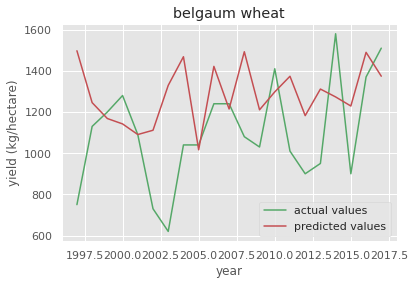

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
file='belgaum_wheat.csv'
df=pd.read_csv('./data/cropwise/'+file)
x=df['Year']
y2,y=[],[]
for i in range(21):
    pred,act=func_yield(file,i)
    y2.append(pred)
    y.append(act)
#y2=add_predicted_column('./data/cropwise/bidar_rice.csv')

plt.plot(x,y,'g',label="actual values")
plt.plot(x,y2,'r',label="predicted values")
plt.xlabel('year')
plt.ylabel('yield (kg/hectare)')
plt.title('belgaum wheat')
plt.legend()
#plt.plot(x,y2,'r',label='predicted values')
plt.show()
    


(20, 5)
(20,)
Predicted : [1108.08004859]  kg/hectares
Actual : 740.0 kg/hectares
(20, 5)
(20,)
Predicted : [1011.55197713]  kg/hectares
Actual : 1120.0 kg/hectares
(20, 5)
(20,)
Predicted : [1605.44383839]  kg/hectares
Actual : 1180.0 kg/hectares
(20, 5)
(20,)
Predicted : [963.02618382]  kg/hectares
Actual : 1080.0 kg/hectares
(20, 5)
(20,)
Predicted : [865.76392581]  kg/hectares
Actual : 1200.0 kg/hectares
(20, 5)
(20,)
Predicted : [1057.74336542]  kg/hectares
Actual : 1120.0 kg/hectares
(20, 5)
(20,)
Predicted : [1080.45893672]  kg/hectares
Actual : 790.0 kg/hectares
(20, 5)
(20,)
Predicted : [734.32348625]  kg/hectares
Actual : 1420.0 kg/hectares
(20, 5)
(20,)
Predicted : [1221.10294404]  kg/hectares
Actual : 1400.0 kg/hectares
(20, 5)
(20,)
Predicted : [1224.50771974]  kg/hectares
Actual : 1050.0 kg/hectares
(20, 5)
(20,)
Predicted : [1312.95572612]  kg/hectares
Actual : 1260.0 kg/hectares
(20, 5)
(20,)
Predicted : [1022.91246396]  kg/hectares
Actual : 2270.0 kg/hectares
(20, 5)
(

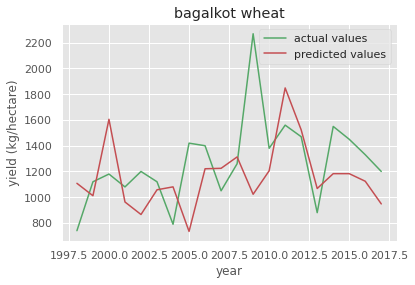

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
file='bagalkot_wheat.csv'
df=pd.read_csv('./data/cropwise/'+file)
x=df['Year']
y2,y=[],[]
for i in range(20):
    pred,act=func_yield(file,i)
    y2.append(pred)
    y.append(act)
#y2=add_predicted_column('./data/cropwise/bidar_rice.csv')

plt.plot(x,y,'g',label="actual values")
plt.plot(x,y2,'r',label="predicted values")
plt.xlabel('year')
plt.ylabel('yield (kg/hectare)')
plt.title('bagalkot wheat')
plt.legend()
#plt.plot(x,y2,'r',label='predicted values')
plt.show()
    


(21, 5)
(21,)
Predicted : [1439.44525685]  kg/hectares
Actual : 220.0 kg/hectares
(21, 5)
(21,)
Predicted : [1191.14335561]  kg/hectares
Actual : 870.0 kg/hectares
(21, 5)
(21,)
Predicted : [1432.19582202]  kg/hectares
Actual : 1010.0 kg/hectares
(21, 5)
(21,)
Predicted : [1369.07471227]  kg/hectares
Actual : 990.0 kg/hectares
(21, 5)
(21,)
Predicted : [1440.43496395]  kg/hectares
Actual : 810.0 kg/hectares
(21, 5)
(21,)
Predicted : [1098.74259146]  kg/hectares
Actual : 680.0 kg/hectares
(21, 5)
(21,)
Predicted : [1490.33093403]  kg/hectares
Actual : 590.0 kg/hectares
(21, 5)
(21,)
Predicted : [1756.34022705]  kg/hectares
Actual : 620.0 kg/hectares
(21, 5)
(21,)
Predicted : [1596.3299352]  kg/hectares
Actual : 610.0 kg/hectares
(21, 5)
(21,)
Predicted : [1444.81390857]  kg/hectares
Actual : 740.0 kg/hectares
(21, 5)
(21,)
Predicted : [1774.29947477]  kg/hectares
Actual : 1210.0 kg/hectares
(21, 5)
(21,)
Predicted : [1492.43823149]  kg/hectares
Actual : 1200.0 kg/hectares
(21, 5)
(21,)


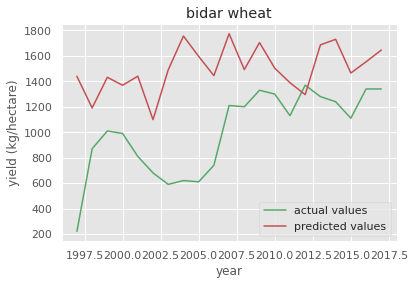

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
file='bidar_wheat.csv'
df=pd.read_csv('./data/cropwise/'+file)
x=df['Year']
y2,y=[],[]
for i in range(21):
    pred,act=func_yield(file,i)
    y2.append(pred)
    y.append(act)
#y2=add_predicted_column('./data/cropwise/bidar_rice.csv')

plt.plot(x,y,'g',label="actual values")
plt.plot(x,y2,'r',label="predicted values")
plt.xlabel('year')
plt.ylabel('yield (kg/hectare)')
plt.title('bidar wheat')
plt.legend()
#plt.plot(x,y2,'r',label='predicted values')
plt.show()
    


(21, 5)
(21,)
Predicted : [853.17422583]  kg/hectares
Actual : 200.0 kg/hectares
(21, 5)
(21,)
Predicted : [923.57152704]  kg/hectares
Actual : 430.0 kg/hectares
(21, 5)
(21,)
Predicted : [941.83029359]  kg/hectares
Actual : 460.0 kg/hectares
(21, 5)
(21,)
Predicted : [929.30963347]  kg/hectares
Actual : 570.0 kg/hectares
(21, 5)
(21,)
Predicted : [695.66856876]  kg/hectares
Actual : 400.0 kg/hectares
(21, 5)
(21,)
Predicted : [978.34613933]  kg/hectares
Actual : 310.0 kg/hectares
(21, 5)
(21,)
Predicted : [650.47540269]  kg/hectares
Actual : 230.0 kg/hectares
(21, 5)
(21,)
Predicted : [955.94309416]  kg/hectares
Actual : 280.0 kg/hectares
(21, 5)
(21,)
Predicted : [889.6541421]  kg/hectares
Actual : 370.0 kg/hectares
(21, 5)
(21,)
Predicted : [616.93319114]  kg/hectares
Actual : 550.0 kg/hectares
(21, 5)
(21,)
Predicted : [864.11317074]  kg/hectares
Actual : 600.0 kg/hectares
(21, 5)
(21,)
Predicted : [593.47810182]  kg/hectares
Actual : 450.0 kg/hectares
(21, 5)
(21,)
Predicted : [96

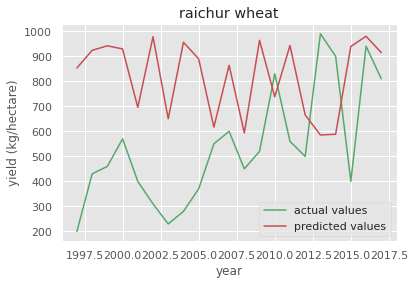

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
file='raichur_wheat.csv'
df=pd.read_csv('./data/cropwise/'+file)
x=df['Year']
y2,y=[],[]
for i in range(21):
    pred,act=func_yield(file,i)
    y2.append(pred)
    y.append(act)
#y2=add_predicted_column('./data/cropwise/bidar_rice.csv')

plt.plot(x,y,'g',label="actual values")
plt.plot(x,y2,'r',label="predicted values")
plt.xlabel('year')
plt.ylabel('yield (kg/hectare)')
plt.title('raichur wheat')
plt.legend()
#plt.plot(x,y2,'r',label='predicted values')
plt.show()
    
